In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
import requests
from urllib.parse import urlparse
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_path = './NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=font_path, size=18)
import seaborn as sns
import shap

In [2]:
%%time
# Read Data
basedir = './Training/training_data_ver_17/'
training_data_df = pd.read_csv(basedir + 'training_data_ver_17_nocut_subway.csv')
training_data_df = training_data_df[(training_data_df['가격_면적'] <= 3500)&(training_data_df['가격_면적'] >= 20)]
cols_to_drop = ['전용면적', '금액(만원)', '지번주소']
training_data_df = training_data_df.drop(columns=cols_to_drop)
training_data_df = training_data_df.reset_index(drop=True)
print(training_data_df.shape)
training_data_df.head()

(4356439, 25)
Wall time: 13.8 s


,구,동,건물연식_engi,distance_nearest_station,nearest_station_name,가격_면적,year_linear,month_sin,month_cos,xnorm,ynorm,x_2nd,y_2nd,x_sin,y_sin,x_cos,y_cos,xy,trade_type,지목명,용도지역명1,토지이동상황,지형높이,지형형상,도로접면
0,0,0,0,834.751415,0,733.118971,7.666667,-0.866025,-0.500000,5579.095707,-9048.956121,1.556315e+07,4.094180e+07,-0.364267,-0.920469,0.931294,0.390815,-5.048499e+07,0,0,0,0,0,0,0
1,0,0,0,834.751415,0,733.118971,7.916667,-0.500000,0.866025,5579.095707,-9048.956121,1.556315e+07,4.094180e+07,-0.364267,-0.920469,0.931294,0.390815,-5.048499e+07,0,0,0,0,0,0,0
2,0,0,0,834.751415,0,450.160772,7.000000,0.000000,1.000000,5579.095707,-9048.956121,1.556315e+07,4.094180e+07,-0.364267,-0.920469,0.931294,0.390815,-5.048499e+07,1,0,0,0,0,0,0
3,0,0,0,834.751415,0,411.575563,7.166667,0.866025,0.500000,5579.095707,-9048.956121,1.556315e+07,4.094180e+07,-0.364267,-0.920469,0.931294,0.390815,-5.048499e+07,1,0,0,0,0,0,0
4,0,0,0,834.751415,0,475.884244,7.666667,-0.866025,-0.500000,5579.095707,-9048.956121,1.556315e+07,4.094180e+07,-0.364267,-0.920469,0.931294,0.390815,-5.048499e+07,1,0,0,0,0,0,0


# Training

In [3]:
from sklearn.model_selection import KFold, GroupKFold

In [4]:
import lightgbm as lgb

In [5]:
from sklearn.metrics import r2_score

In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
training_data_df['log_transformed'] = training_data_df['가격_면적'].apply(lambda x: np.log(x) * 1000)

In [9]:
target_cols = ['가격_면적', 'log_transformed']

In [10]:
cat_cols_df = pd.read_csv(basedir + 'cat_cols.csv')
cat_cols_df

,colname
0,trade_type
1,건물연식_engi
2,nearest_station_name
3,구
4,동
5,지목명
6,용도지역명1
7,토지이동상황
8,지형높이
9,지형형상


In [11]:
cat_cols = cat_cols_df['colname'].tolist()
cat_cols

['trade_type',
 '건물연식_engi',
 'nearest_station_name',
 '구',
 '동',
 '지목명',
 '용도지역명1',
 '토지이동상황',
 '지형높이',
 '지형형상',
 '도로접면']

Fold 0 start
(3485151, 24)
y dist plot


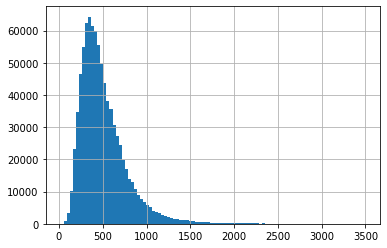

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.305160
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 104.603
[100]	valid_0's rmse: 99.9386
[150]	valid_0's rmse: 96.822
[200]	valid_0's rmse: 94.7898
[250]	valid_0's rmse: 93.0709
[300]	valid_0's rmse: 91.9014
[350]	valid_0's rmse: 90.8983
[400]	valid_0's rmse: 89.9753
[450]	valid_0's rmse: 89.2262
[500]	valid_0's rmse: 88.668
[550]	valid_0's rmse: 88.0303
[600]	valid_0's rmse: 87.4604
[650]	valid_0's rmse: 86.9932
[700]	valid_0's rmse: 86.5827
[750]	valid_0's rmse: 86.2
[800]	valid_0's rmse: 85.844
[850]	valid_0's rmse: 85.4648
[900]	valid_0's rmse: 85.1718
[950]	valid_0's rmse: 84.9015
[1000]	valid_0's rmse: 84.6148
[1050]	valid_0's rmse: 84.3567
[1100]	valid_0's rmse: 84.1088
[1150]	valid_0's rmse: 83.9093
[1200]	valid_0's rmse: 83.6728
[1250]	valid_0's rmse: 83.4702
[1300]	valid_0's rmse: 83.2532
[1350]	valid_0's rmse: 83.0608
[1400]	valid_0's rmse: 82.8958
[1450]	valid_0's rmse: 82.7202
[1500]	val

<Figure size 432x288 with 0 Axes>

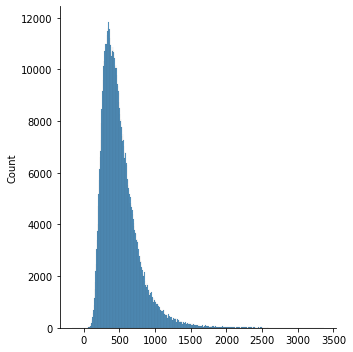

77.78844983599727
Fold 0 end
Fold 1 start
(3485151, 24)
y dist plot


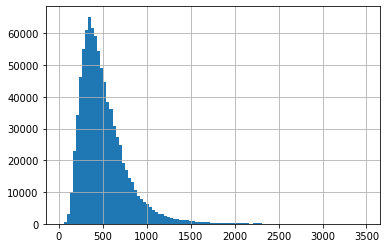

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.281248
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 104.491
[100]	valid_0's rmse: 99.1117
[150]	valid_0's rmse: 96.415
[200]	valid_0's rmse: 94.541
[250]	valid_0's rmse: 93.1365
[300]	valid_0's rmse: 92.0282
[350]	valid_0's rmse: 91.005
[400]	valid_0's rmse: 90.0931
[450]	valid_0's rmse: 89.3465
[500]	valid_0's rmse: 88.7223
[550]	valid_0's rmse: 88.089
[600]	valid_0's rmse: 87.5765
[650]	valid_0's rmse: 87.0886
[700]	valid_0's rmse: 86.6131
[750]	valid_0's rmse: 86.1962
[800]	valid_0's rmse: 85.8407
[850]	valid_0's rmse: 85.4773
[900]	valid_0's rmse: 85.157
[950]	valid_0's rmse: 84.8442
[1000]	valid_0's rmse: 84.5737
[1050]	valid_0's rmse: 84.2983
[1100]	valid_0's rmse: 84.0615
[1150]	valid_0's rmse: 83.8708
[1200]	valid_0's rmse: 83.6779
[1250]	valid_0's rmse: 83.4614
[1300]	valid_0's rmse: 83.2829
[1350]	valid_0's rmse: 83.1112
[1400]	valid_0's rmse: 82.9232
[1450]	valid_0's rmse: 82.73
[1500]	vali

<Figure size 432x288 with 0 Axes>

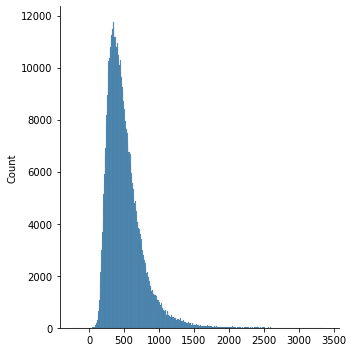

77.93554903210654
Fold 1 end
Fold 2 start
(3485151, 24)
y dist plot


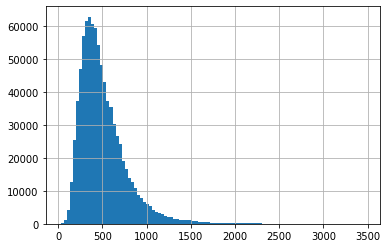

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.147478
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 103.884
[100]	valid_0's rmse: 99.3859
[150]	valid_0's rmse: 96.5302
[200]	valid_0's rmse: 94.5215
[250]	valid_0's rmse: 92.9219
[300]	valid_0's rmse: 91.753
[350]	valid_0's rmse: 90.7084
[400]	valid_0's rmse: 89.9663
[450]	valid_0's rmse: 89.2354
[500]	valid_0's rmse: 88.5378
[550]	valid_0's rmse: 87.9275
[600]	valid_0's rmse: 87.4307
[650]	valid_0's rmse: 86.9344
[700]	valid_0's rmse: 86.458
[750]	valid_0's rmse: 86.059
[800]	valid_0's rmse: 85.7153
[850]	valid_0's rmse: 85.376
[900]	valid_0's rmse: 85.0941
[950]	valid_0's rmse: 84.7994
[1000]	valid_0's rmse: 84.5335
[1050]	valid_0's rmse: 84.2459
[1100]	valid_0's rmse: 84.0211
[1150]	valid_0's rmse: 83.8018
[1200]	valid_0's rmse: 83.6066
[1250]	valid_0's rmse: 83.4182
[1300]	valid_0's rmse: 83.2307
[1350]	valid_0's rmse: 83.0477
[1400]	valid_0's rmse: 82.8918
[1450]	valid_0's rmse: 82.7565
[1500]	v

<Figure size 432x288 with 0 Axes>

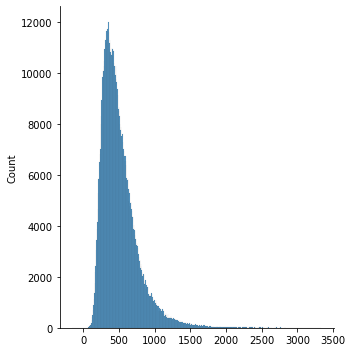

78.0734755395025
Fold 2 end
Fold 3 start
(3485151, 24)
y dist plot


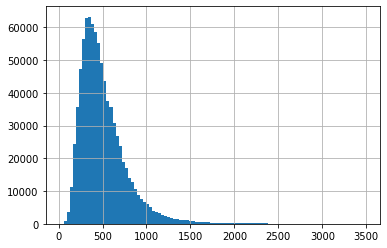

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.285224
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 103.842
[100]	valid_0's rmse: 98.6343
[150]	valid_0's rmse: 96.061
[200]	valid_0's rmse: 94.2467
[250]	valid_0's rmse: 92.6789
[300]	valid_0's rmse: 91.4153
[350]	valid_0's rmse: 90.5146
[400]	valid_0's rmse: 89.7182
[450]	valid_0's rmse: 88.9723
[500]	valid_0's rmse: 88.4077
[550]	valid_0's rmse: 87.9008
[600]	valid_0's rmse: 87.2958
[650]	valid_0's rmse: 86.767
[700]	valid_0's rmse: 86.3364
[750]	valid_0's rmse: 85.8952
[800]	valid_0's rmse: 85.5673
[850]	valid_0's rmse: 85.2396
[900]	valid_0's rmse: 84.9184
[950]	valid_0's rmse: 84.6524
[1000]	valid_0's rmse: 84.4078
[1050]	valid_0's rmse: 84.1309
[1100]	valid_0's rmse: 83.8674
[1150]	valid_0's rmse: 83.639
[1200]	valid_0's rmse: 83.4258
[1250]	valid_0's rmse: 83.2288
[1300]	valid_0's rmse: 83.0426
[1350]	valid_0's rmse: 82.8599
[1400]	valid_0's rmse: 82.6881
[1450]	valid_0's rmse: 82.5247
[1500]	

<Figure size 432x288 with 0 Axes>

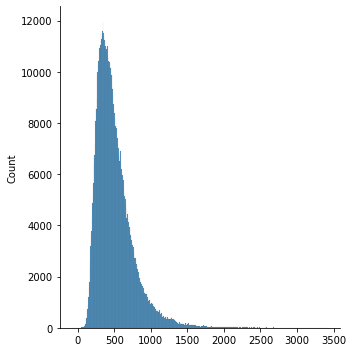

77.65559369121247
Fold 3 end
Fold 4 start
(3485152, 24)
y dist plot


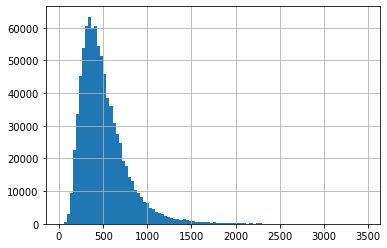

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485152, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.152112
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 104.416
[100]	valid_0's rmse: 99.4512
[150]	valid_0's rmse: 96.4915
[200]	valid_0's rmse: 94.4819
[250]	valid_0's rmse: 93.1137
[300]	valid_0's rmse: 91.7503
[350]	valid_0's rmse: 90.7926
[400]	valid_0's rmse: 89.926
[450]	valid_0's rmse: 89.0019
[500]	valid_0's rmse: 88.3899
[550]	valid_0's rmse: 87.8791
[600]	valid_0's rmse: 87.267
[650]	valid_0's rmse: 86.812
[700]	valid_0's rmse: 86.3766
[750]	valid_0's rmse: 86.0269
[800]	valid_0's rmse: 85.6979
[850]	valid_0's rmse: 85.3273
[900]	valid_0's rmse: 85.0207
[950]	valid_0's rmse: 84.7449
[1000]	valid_0's rmse: 84.4818
[1050]	valid_0's rmse: 84.2277
[1100]	valid_0's rmse: 84.0107
[1150]	valid_0's rmse: 83.7741
[1200]	valid_0's rmse: 83.54
[1250]	valid_0's rmse: 83.3117
[1300]	valid_0's rmse: 83.1281
[1350]	valid_0's rmse: 82.9563
[1400]	valid_0's rmse: 82.7797
[1450]	valid_0's rmse: 82.6234
[1500]	va

<Figure size 432x288 with 0 Axes>

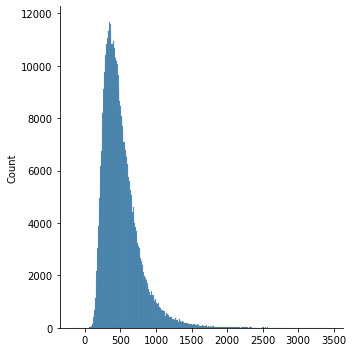

77.90001497105052
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [12]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['가격_면적']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['가격_면적']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'regression',
        #'alpha': 1.35,
        'learning_rate': 0.3,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'rmse',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 50000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_subway_mse_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

In [13]:
np.sqrt(mean_squared_error(training_data_df['가격_면적'], oof))

77.87074402165692

Fold 0 start
(3485151, 24)
y dist plot


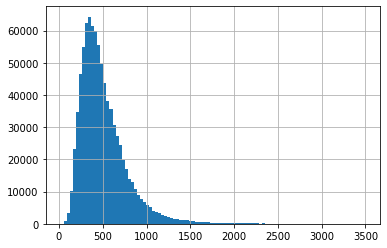

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.305160
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 206.891
[100]	valid_0's rmse: 174.91
[150]	valid_0's rmse: 156.301
[200]	valid_0's rmse: 144.159
[250]	valid_0's rmse: 135.491
[300]	valid_0's rmse: 129.132
[350]	valid_0's rmse: 124.681
[400]	valid_0's rmse: 121.209
[450]	valid_0's rmse: 118.721
[500]	valid_0's rmse: 116.58
[550]	valid_0's rmse: 114.595
[600]	valid_0's rmse: 113.274
[650]	valid_0's rmse: 112.168
[700]	valid_0's rmse: 110.911
[750]	valid_0's rmse: 110.027
[800]	valid_0's rmse: 108.871
[850]	valid_0's rmse: 107.923
[900]	valid_0's rmse: 107.183
[950]	valid_0's rmse: 105.928
[1000]	valid_0's rmse: 104.845
[1050]	valid_0's rmse: 104.298
[1100]	valid_0's rmse: 103.822
[1150]	valid_0's rmse: 103.444
[1200]	valid_0's rmse: 102.811
[1250]	valid_0's rmse: 102.388
[1300]	valid_0's rmse: 101.894
[1350]	valid_0's rmse: 101.461
[1400]	valid_0's rmse: 101.099
[1450]	valid_0's rmse: 100.734
[1500]

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


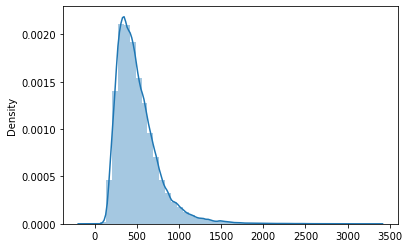

87.5294334303542
Fold 0 end
Fold 1 start
(3485151, 24)
y dist plot


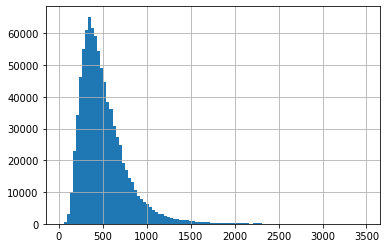

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.281248
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 206.962
[100]	valid_0's rmse: 174.978
[150]	valid_0's rmse: 156.487
[200]	valid_0's rmse: 144.297
[250]	valid_0's rmse: 135.661
[300]	valid_0's rmse: 129.563
[350]	valid_0's rmse: 125.354
[400]	valid_0's rmse: 121.642
[450]	valid_0's rmse: 118.491
[500]	valid_0's rmse: 116.412
[550]	valid_0's rmse: 114.889
[600]	valid_0's rmse: 113.486
[650]	valid_0's rmse: 112.435
[700]	valid_0's rmse: 111.106
[750]	valid_0's rmse: 110.046
[800]	valid_0's rmse: 109.11
[850]	valid_0's rmse: 107.415
[900]	valid_0's rmse: 106.608
[950]	valid_0's rmse: 106.091
[1000]	valid_0's rmse: 105.212
[1050]	valid_0's rmse: 104.733
[1100]	valid_0's rmse: 104.24
[1150]	valid_0's rmse: 103.73
[1200]	valid_0's rmse: 103.216
[1250]	valid_0's rmse: 102.766
[1300]	valid_0's rmse: 102.345
[1350]	valid_0's rmse: 101.971
[1400]	valid_0's rmse: 101.572
[1450]	valid_0's rmse: 100.878
[1500]	

[13100]	valid_0's rmse: 87.2173
[13150]	valid_0's rmse: 87.2004
[13200]	valid_0's rmse: 87.1937
[13250]	valid_0's rmse: 87.1914
[13300]	valid_0's rmse: 87.1901
[13350]	valid_0's rmse: 87.1896
[13400]	valid_0's rmse: 87.1854
[13450]	valid_0's rmse: 87.1716
[13500]	valid_0's rmse: 87.1589
[13550]	valid_0's rmse: 87.1463
[13600]	valid_0's rmse: 87.1327
[13650]	valid_0's rmse: 87.1247
[13700]	valid_0's rmse: 87.1235
[13750]	valid_0's rmse: 87.121
[13800]	valid_0's rmse: 87.1096
[13850]	valid_0's rmse: 87.0961
[13900]	valid_0's rmse: 87.0849
[13950]	valid_0's rmse: 87.072
[14000]	valid_0's rmse: 87.0547
[14050]	valid_0's rmse: 87.0401
[14100]	valid_0's rmse: 87.0265
[14150]	valid_0's rmse: 87.01
[14200]	valid_0's rmse: 86.9977
[14250]	valid_0's rmse: 86.9847
[14300]	valid_0's rmse: 86.9749
[14350]	valid_0's rmse: 86.9748
[14400]	valid_0's rmse: 86.9744
[14450]	valid_0's rmse: 86.9743
[14500]	valid_0's rmse: 86.974
[14550]	valid_0's rmse: 86.9722
[14600]	valid_0's rmse: 86.9721
[14650]	valid

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


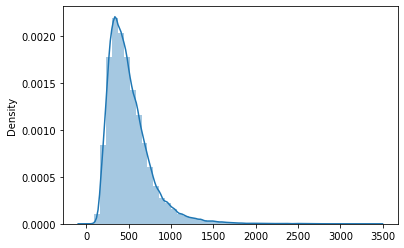

86.95132260762031
Fold 1 end
Fold 2 start
(3485151, 24)
y dist plot


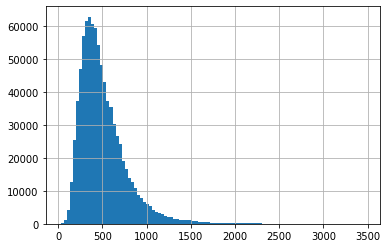

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.147478
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 207.405
[100]	valid_0's rmse: 175.401
[150]	valid_0's rmse: 156.621
[200]	valid_0's rmse: 144.271
[250]	valid_0's rmse: 135.771
[300]	valid_0's rmse: 129.5
[350]	valid_0's rmse: 125.205
[400]	valid_0's rmse: 121.055
[450]	valid_0's rmse: 118.194
[500]	valid_0's rmse: 115.493
[550]	valid_0's rmse: 113.665
[600]	valid_0's rmse: 112.564
[650]	valid_0's rmse: 111.604
[700]	valid_0's rmse: 110.118
[750]	valid_0's rmse: 109.196
[800]	valid_0's rmse: 108.363
[850]	valid_0's rmse: 107.524
[900]	valid_0's rmse: 106.737
[950]	valid_0's rmse: 106.222
[1000]	valid_0's rmse: 105.678
[1050]	valid_0's rmse: 105.052
[1100]	valid_0's rmse: 104.148
[1150]	valid_0's rmse: 103.461
[1200]	valid_0's rmse: 103.009
[1250]	valid_0's rmse: 102.652
[1300]	valid_0's rmse: 102.339
[1350]	valid_0's rmse: 101.946
[1400]	valid_0's rmse: 101.597
[1450]	valid_0's rmse: 101.209
[1500]

[13100]	valid_0's rmse: 87.5485
[13150]	valid_0's rmse: 87.5438
[13200]	valid_0's rmse: 87.5396
[13250]	valid_0's rmse: 87.5353
[13300]	valid_0's rmse: 87.5281
[13350]	valid_0's rmse: 87.5232
[13400]	valid_0's rmse: 87.5221
[13450]	valid_0's rmse: 87.5207
[13500]	valid_0's rmse: 87.5179
[13550]	valid_0's rmse: 87.5166
[13600]	valid_0's rmse: 87.5161
[13650]	valid_0's rmse: 87.5158
[13700]	valid_0's rmse: 87.5157
[13750]	valid_0's rmse: 87.5156
[13800]	valid_0's rmse: 87.5155
[13850]	valid_0's rmse: 87.5154
[13900]	valid_0's rmse: 87.5147
[13950]	valid_0's rmse: 87.5143
[14000]	valid_0's rmse: 87.5139
[14050]	valid_0's rmse: 87.5135
[14100]	valid_0's rmse: 87.513
[14150]	valid_0's rmse: 87.5122
[14200]	valid_0's rmse: 87.5116
[14250]	valid_0's rmse: 87.5112
[14300]	valid_0's rmse: 87.5102
[14350]	valid_0's rmse: 87.51
[14400]	valid_0's rmse: 87.5099
[14450]	valid_0's rmse: 87.5094
[14500]	valid_0's rmse: 87.5085
[14550]	valid_0's rmse: 87.5083
[14600]	valid_0's rmse: 87.5079
[14650]	val

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


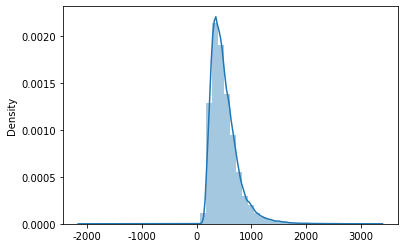

87.47674860174416
Fold 2 end
Fold 3 start
(3485151, 24)
y dist plot


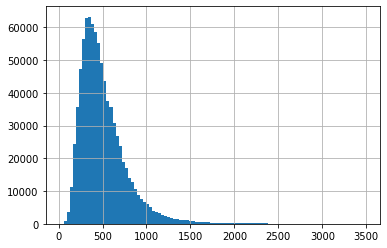

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.121935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.285224
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 206.467
[100]	valid_0's rmse: 174.646
[150]	valid_0's rmse: 155.919
[200]	valid_0's rmse: 143.779
[250]	valid_0's rmse: 135.486
[300]	valid_0's rmse: 129.686
[350]	valid_0's rmse: 124.707
[400]	valid_0's rmse: 120.785
[450]	valid_0's rmse: 117.816
[500]	valid_0's rmse: 115.888
[550]	valid_0's rmse: 114.101
[600]	valid_0's rmse: 112.331
[650]	valid_0's rmse: 111.04
[700]	valid_0's rmse: 109.316
[750]	valid_0's rmse: 108.357
[800]	valid_0's rmse: 107.441
[850]	valid_0's rmse: 106.739
[900]	valid_0's rmse: 106.139
[950]	valid_0's rmse: 105.39
[1000]	valid_0's rmse: 104.772
[1050]	valid_0's rmse: 104.248
[1100]	valid_0's rmse: 103.741
[1150]	valid_0's rmse: 102.916
[1200]	valid_0's rmse: 102.224
[1250]	valid_0's rmse: 101.863
[1300]	valid_0's rmse: 101.482
[1350]	valid_0's rmse: 101.185
[1400]	valid_0's rmse: 100.813
[1450]	valid_0's rmse: 100.288
[1500]

[13050]	valid_0's rmse: 87.0141
[13100]	valid_0's rmse: 87.0131
[13150]	valid_0's rmse: 87.0124
[13200]	valid_0's rmse: 87.0115
[13250]	valid_0's rmse: 87.0108
[13300]	valid_0's rmse: 87.0103
[13350]	valid_0's rmse: 87.0096
[13400]	valid_0's rmse: 87.0087
[13450]	valid_0's rmse: 87.0081
[13500]	valid_0's rmse: 87.0069
[13550]	valid_0's rmse: 87.0063
[13600]	valid_0's rmse: 87.0054
[13650]	valid_0's rmse: 87.0049
[13700]	valid_0's rmse: 87.0041
[13750]	valid_0's rmse: 87.0039
[13800]	valid_0's rmse: 87.0033
[13850]	valid_0's rmse: 87.0027
[13900]	valid_0's rmse: 87.002
[13950]	valid_0's rmse: 87.0012
[14000]	valid_0's rmse: 87.0005
[14050]	valid_0's rmse: 87
[14100]	valid_0's rmse: 86.9991
[14150]	valid_0's rmse: 86.9985
[14200]	valid_0's rmse: 86.9976
[14250]	valid_0's rmse: 86.9972
[14300]	valid_0's rmse: 86.9965
[14350]	valid_0's rmse: 86.9959
[14400]	valid_0's rmse: 86.9952
[14450]	valid_0's rmse: 86.9947
[14500]	valid_0's rmse: 86.994
[14550]	valid_0's rmse: 86.9935
[14600]	valid_0

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


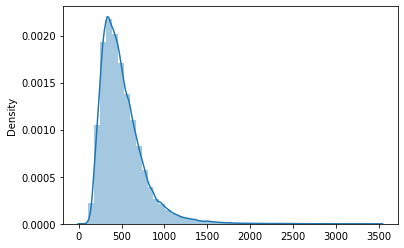

86.95229041083941
Fold 3 end
Fold 4 start
(3485152, 24)
y dist plot


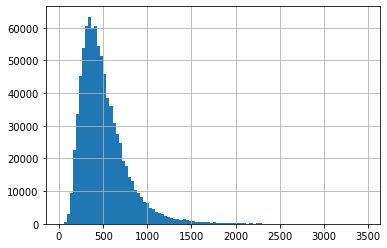

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485152, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.152112
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 206.843
[100]	valid_0's rmse: 174.928
[150]	valid_0's rmse: 156.202
[200]	valid_0's rmse: 143.827
[250]	valid_0's rmse: 135.265
[300]	valid_0's rmse: 129.287
[350]	valid_0's rmse: 124.884
[400]	valid_0's rmse: 121.544
[450]	valid_0's rmse: 119.168
[500]	valid_0's rmse: 117.017
[550]	valid_0's rmse: 114.802
[600]	valid_0's rmse: 113.541
[650]	valid_0's rmse: 112.185
[700]	valid_0's rmse: 110.567
[750]	valid_0's rmse: 109.558
[800]	valid_0's rmse: 108.683
[850]	valid_0's rmse: 107.911
[900]	valid_0's rmse: 107.302
[950]	valid_0's rmse: 106.626
[1000]	valid_0's rmse: 105.735
[1050]	valid_0's rmse: 104.574
[1100]	valid_0's rmse: 103.993
[1150]	valid_0's rmse: 103.544
[1200]	valid_0's rmse: 103.042
[1250]	valid_0's rmse: 102.568
[1300]	valid_0's rmse: 102.205
[1350]	valid_0's rmse: 101.842
[1400]	valid_0's rmse: 101.386
[1450]	valid_0's rmse: 101.034
[150

[13100]	valid_0's rmse: 87.0152
[13150]	valid_0's rmse: 87.0146
[13200]	valid_0's rmse: 87.0146
[13250]	valid_0's rmse: 87.0145
[13300]	valid_0's rmse: 87.0145
[13350]	valid_0's rmse: 87.0143
[13400]	valid_0's rmse: 87.0143
[13450]	valid_0's rmse: 87.0142
[13500]	valid_0's rmse: 87.0139
[13550]	valid_0's rmse: 87.0138
[13600]	valid_0's rmse: 87.0138
Early stopping, best iteration is:
[13512]	valid_0's rmse: 87.0138
preds dist plot


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


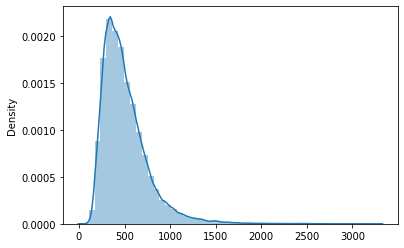

87.01378767828037
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [14]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['가격_면적']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['가격_면적']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'huber',
        'alpha':1.35,
        'learning_rate': 3,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'rmse',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 50000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_subway_huber_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.distplot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

In [15]:
np.sqrt(mean_squared_error(training_data_df['가격_면적'], oof))

87.18510865262543

Fold 0 start
(3485151, 24)
y dist plot


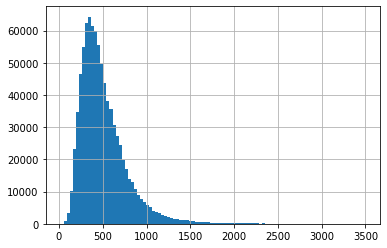

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.305160
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 246.144
[100]	valid_0's rmse: 223.837
[150]	valid_0's rmse: 206.933
[200]	valid_0's rmse: 193.943
[250]	valid_0's rmse: 183.448
[300]	valid_0's rmse: 174.979
[350]	valid_0's rmse: 167.901
[400]	valid_0's rmse: 161.669
[450]	valid_0's rmse: 156.331
[500]	valid_0's rmse: 151.556
[550]	valid_0's rmse: 147.608
[600]	valid_0's rmse: 144.072
[650]	valid_0's rmse: 140.98
[700]	valid_0's rmse: 138.224
[750]	valid_0's rmse: 135.721
[800]	valid_0's rmse: 133.198
[850]	valid_0's rmse: 131.219
[900]	valid_0's rmse: 129.389
[950]	valid_0's rmse: 127.808
[1000]	valid_0's rmse: 126.36
[1050]	valid_0's rmse: 125.15
[1100]	valid_0's rmse: 123.644
[1150]	valid_0's rmse: 122.546
[1200]	valid_0's rmse: 121.354
[1250]	valid_0's rmse: 120.47
[1300]	valid_0's rmse: 119.582
[1350]	valid_0's rmse: 118.871
[1400]	valid_0's rmse: 118.157
[1450]	valid_0's rmse: 117.496
[1500]	v

[13100]	valid_0's rmse: 91.0853
[13150]	valid_0's rmse: 91.0546
[13200]	valid_0's rmse: 91.0296
[13250]	valid_0's rmse: 91.0069
[13300]	valid_0's rmse: 90.9837
[13350]	valid_0's rmse: 90.9555
[13400]	valid_0's rmse: 90.9261
[13450]	valid_0's rmse: 90.9003
[13500]	valid_0's rmse: 90.8736
[13550]	valid_0's rmse: 90.8498
[13600]	valid_0's rmse: 90.826
[13650]	valid_0's rmse: 90.8043
[13700]	valid_0's rmse: 90.7794
[13750]	valid_0's rmse: 90.7555
[13800]	valid_0's rmse: 90.7326
[13850]	valid_0's rmse: 90.71
[13900]	valid_0's rmse: 90.6861
[13950]	valid_0's rmse: 90.6647
[14000]	valid_0's rmse: 90.6401
[14050]	valid_0's rmse: 90.617
[14100]	valid_0's rmse: 90.5918
[14150]	valid_0's rmse: 90.568
[14200]	valid_0's rmse: 90.5468
[14250]	valid_0's rmse: 90.5245
[14300]	valid_0's rmse: 90.5017
[14350]	valid_0's rmse: 90.4837
[14400]	valid_0's rmse: 90.4631
[14450]	valid_0's rmse: 90.4374
[14500]	valid_0's rmse: 90.4192
[14550]	valid_0's rmse: 90.3999
[14600]	valid_0's rmse: 90.3786
[14650]	valid

[26000]	valid_0's rmse: 86.7848
[26050]	valid_0's rmse: 86.7721
[26100]	valid_0's rmse: 86.7601
[26150]	valid_0's rmse: 86.7472
[26200]	valid_0's rmse: 86.7402
[26250]	valid_0's rmse: 86.7293
[26300]	valid_0's rmse: 86.7127
[26350]	valid_0's rmse: 86.6999
[26400]	valid_0's rmse: 86.6906
[26450]	valid_0's rmse: 86.6812
[26500]	valid_0's rmse: 86.6704
[26550]	valid_0's rmse: 86.6597
[26600]	valid_0's rmse: 86.6475
[26650]	valid_0's rmse: 86.6345
[26700]	valid_0's rmse: 86.6253
[26750]	valid_0's rmse: 86.615
[26800]	valid_0's rmse: 86.6043
[26850]	valid_0's rmse: 86.5951
[26900]	valid_0's rmse: 86.5848
[26950]	valid_0's rmse: 86.5735
[27000]	valid_0's rmse: 86.5614
[27050]	valid_0's rmse: 86.5523
[27100]	valid_0's rmse: 86.5414
[27150]	valid_0's rmse: 86.5309
[27200]	valid_0's rmse: 86.5205
[27250]	valid_0's rmse: 86.5076
[27300]	valid_0's rmse: 86.49
[27350]	valid_0's rmse: 86.4723
[27400]	valid_0's rmse: 86.4592
[27450]	valid_0's rmse: 86.4422
[27500]	valid_0's rmse: 86.4249
[27550]	val

[38850]	valid_0's rmse: 84.5373
[38900]	valid_0's rmse: 84.5294
[38950]	valid_0's rmse: 84.5206
[39000]	valid_0's rmse: 84.5128
[39050]	valid_0's rmse: 84.5078
[39100]	valid_0's rmse: 84.5002
[39150]	valid_0's rmse: 84.4935
[39200]	valid_0's rmse: 84.4855
[39250]	valid_0's rmse: 84.4771
[39300]	valid_0's rmse: 84.4696
[39350]	valid_0's rmse: 84.4627
[39400]	valid_0's rmse: 84.4566
[39450]	valid_0's rmse: 84.4486
[39500]	valid_0's rmse: 84.4429
[39550]	valid_0's rmse: 84.436
[39600]	valid_0's rmse: 84.4303
[39650]	valid_0's rmse: 84.4244
[39700]	valid_0's rmse: 84.417
[39750]	valid_0's rmse: 84.4114
[39800]	valid_0's rmse: 84.4049
[39850]	valid_0's rmse: 84.398
[39900]	valid_0's rmse: 84.3907
[39950]	valid_0's rmse: 84.3838
[40000]	valid_0's rmse: 84.3778
[40050]	valid_0's rmse: 84.3717
[40100]	valid_0's rmse: 84.3651
[40150]	valid_0's rmse: 84.3587
[40200]	valid_0's rmse: 84.3519
[40250]	valid_0's rmse: 84.3454
[40300]	valid_0's rmse: 84.3384
[40350]	valid_0's rmse: 84.3315
[40400]	val

[51700]	valid_0's rmse: 83.0709
[51750]	valid_0's rmse: 83.0653
[51800]	valid_0's rmse: 83.0615
[51850]	valid_0's rmse: 83.0567
[51900]	valid_0's rmse: 83.0522
[51950]	valid_0's rmse: 83.0468
[52000]	valid_0's rmse: 83.042
[52050]	valid_0's rmse: 83.0372
[52100]	valid_0's rmse: 83.0318
[52150]	valid_0's rmse: 83.0279
[52200]	valid_0's rmse: 83.0236
[52250]	valid_0's rmse: 83.0192
[52300]	valid_0's rmse: 83.0141
[52350]	valid_0's rmse: 83.0089
[52400]	valid_0's rmse: 83.0039
[52450]	valid_0's rmse: 82.9995
[52500]	valid_0's rmse: 82.9955
[52550]	valid_0's rmse: 82.9912
[52600]	valid_0's rmse: 82.9876
[52650]	valid_0's rmse: 82.9838
[52700]	valid_0's rmse: 82.9791
[52750]	valid_0's rmse: 82.9751
[52800]	valid_0's rmse: 82.9702
[52850]	valid_0's rmse: 82.966
[52900]	valid_0's rmse: 82.9615
[52950]	valid_0's rmse: 82.9566
[53000]	valid_0's rmse: 82.9527
[53050]	valid_0's rmse: 82.9493
[53100]	valid_0's rmse: 82.9461
[53150]	valid_0's rmse: 82.9416
[53200]	valid_0's rmse: 82.936
[53250]	val

[64550]	valid_0's rmse: 82.0781
[64600]	valid_0's rmse: 82.075
[64650]	valid_0's rmse: 82.071
[64700]	valid_0's rmse: 82.0679
[64750]	valid_0's rmse: 82.0652
[64800]	valid_0's rmse: 82.0618
[64850]	valid_0's rmse: 82.0586
[64900]	valid_0's rmse: 82.0545
[64950]	valid_0's rmse: 82.0512
[65000]	valid_0's rmse: 82.0483
[65050]	valid_0's rmse: 82.0452
[65100]	valid_0's rmse: 82.0414
[65150]	valid_0's rmse: 82.0378
[65200]	valid_0's rmse: 82.0352
[65250]	valid_0's rmse: 82.0324
[65300]	valid_0's rmse: 82.0289
[65350]	valid_0's rmse: 82.0255
[65400]	valid_0's rmse: 82.0217
[65450]	valid_0's rmse: 82.0188
[65500]	valid_0's rmse: 82.0158
[65550]	valid_0's rmse: 82.0123
[65600]	valid_0's rmse: 82.0093
[65650]	valid_0's rmse: 82.0058
[65700]	valid_0's rmse: 82.0027
[65750]	valid_0's rmse: 81.9995
[65800]	valid_0's rmse: 81.9968
[65850]	valid_0's rmse: 81.9947
[65900]	valid_0's rmse: 81.9922
[65950]	valid_0's rmse: 81.9898
[66000]	valid_0's rmse: 81.9868
[66050]	valid_0's rmse: 81.9839
[66100]	va

[77450]	valid_0's rmse: 81.3425
[77500]	valid_0's rmse: 81.3398
[77550]	valid_0's rmse: 81.3371
[77600]	valid_0's rmse: 81.3346
[77650]	valid_0's rmse: 81.3321
[77700]	valid_0's rmse: 81.3292
[77750]	valid_0's rmse: 81.3263
[77800]	valid_0's rmse: 81.3241
[77850]	valid_0's rmse: 81.3218
[77900]	valid_0's rmse: 81.3192
[77950]	valid_0's rmse: 81.3161
[78000]	valid_0's rmse: 81.3141
[78050]	valid_0's rmse: 81.3086
[78100]	valid_0's rmse: 81.2949
[78150]	valid_0's rmse: 81.2846
[78200]	valid_0's rmse: 81.2764
[78250]	valid_0's rmse: 81.27
[78300]	valid_0's rmse: 81.2676
[78350]	valid_0's rmse: 81.265
[78400]	valid_0's rmse: 81.2615
[78450]	valid_0's rmse: 81.2585
[78500]	valid_0's rmse: 81.2562
[78550]	valid_0's rmse: 81.2541
[78600]	valid_0's rmse: 81.252
[78650]	valid_0's rmse: 81.2496
[78700]	valid_0's rmse: 81.2469
[78750]	valid_0's rmse: 81.2446
[78800]	valid_0's rmse: 81.2428
[78850]	valid_0's rmse: 81.2403
[78900]	valid_0's rmse: 81.2379
[78950]	valid_0's rmse: 81.236
[79000]	valid

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


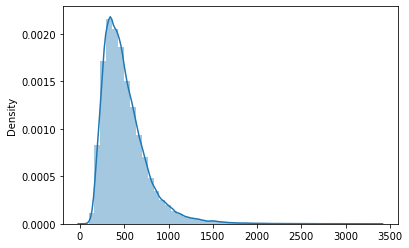

81.01253534126977
Fold 0 end
Fold 1 start
(3485151, 24)
y dist plot


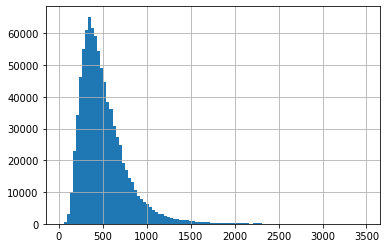

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.281248
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 246.276
[100]	valid_0's rmse: 223.995
[150]	valid_0's rmse: 207.051
[200]	valid_0's rmse: 194.102
[250]	valid_0's rmse: 183.621
[300]	valid_0's rmse: 175.131
[350]	valid_0's rmse: 167.999
[400]	valid_0's rmse: 161.802
[450]	valid_0's rmse: 156.489
[500]	valid_0's rmse: 151.842
[550]	valid_0's rmse: 147.852
[600]	valid_0's rmse: 144.295
[650]	valid_0's rmse: 141.183
[700]	valid_0's rmse: 138.367
[750]	valid_0's rmse: 135.802
[800]	valid_0's rmse: 133.386
[850]	valid_0's rmse: 131.307
[900]	valid_0's rmse: 129.535
[950]	valid_0's rmse: 128.009
[1000]	valid_0's rmse: 126.594
[1050]	valid_0's rmse: 125.242
[1100]	valid_0's rmse: 123.907
[1150]	valid_0's rmse: 122.489
[1200]	valid_0's rmse: 121.214
[1250]	valid_0's rmse: 120.058
[1300]	valid_0's rmse: 119.084
[1350]	valid_0's rmse: 118.081
[1400]	valid_0's rmse: 117.19
[1450]	valid_0's rmse: 116.213
[1500

[13100]	valid_0's rmse: 91.1475
[13150]	valid_0's rmse: 91.1247
[13200]	valid_0's rmse: 91.1017
[13250]	valid_0's rmse: 91.0716
[13300]	valid_0's rmse: 91.0492
[13350]	valid_0's rmse: 91.0145
[13400]	valid_0's rmse: 90.9863
[13450]	valid_0's rmse: 90.9573
[13500]	valid_0's rmse: 90.9307
[13550]	valid_0's rmse: 90.8973
[13600]	valid_0's rmse: 90.8737
[13650]	valid_0's rmse: 90.853
[13700]	valid_0's rmse: 90.8263
[13750]	valid_0's rmse: 90.8015
[13800]	valid_0's rmse: 90.7733
[13850]	valid_0's rmse: 90.7425
[13900]	valid_0's rmse: 90.7185
[13950]	valid_0's rmse: 90.6964
[14000]	valid_0's rmse: 90.6723
[14050]	valid_0's rmse: 90.647
[14100]	valid_0's rmse: 90.6198
[14150]	valid_0's rmse: 90.597
[14200]	valid_0's rmse: 90.5777
[14250]	valid_0's rmse: 90.5584
[14300]	valid_0's rmse: 90.5349
[14350]	valid_0's rmse: 90.5133
[14400]	valid_0's rmse: 90.4904
[14450]	valid_0's rmse: 90.4682
[14500]	valid_0's rmse: 90.4456
[14550]	valid_0's rmse: 90.4243
[14600]	valid_0's rmse: 90.4056
[14650]	val

[25950]	valid_0's rmse: 86.8306
[26000]	valid_0's rmse: 86.8203
[26050]	valid_0's rmse: 86.8079
[26100]	valid_0's rmse: 86.7971
[26150]	valid_0's rmse: 86.7868
[26200]	valid_0's rmse: 86.7738
[26250]	valid_0's rmse: 86.7619
[26300]	valid_0's rmse: 86.75
[26350]	valid_0's rmse: 86.7375
[26400]	valid_0's rmse: 86.7281
[26450]	valid_0's rmse: 86.7169
[26500]	valid_0's rmse: 86.7058
[26550]	valid_0's rmse: 86.6963
[26600]	valid_0's rmse: 86.6853
[26650]	valid_0's rmse: 86.6735
[26700]	valid_0's rmse: 86.6632
[26750]	valid_0's rmse: 86.6514
[26800]	valid_0's rmse: 86.6385
[26850]	valid_0's rmse: 86.6299
[26900]	valid_0's rmse: 86.6214
[26950]	valid_0's rmse: 86.6092
[27000]	valid_0's rmse: 86.5981
[27050]	valid_0's rmse: 86.5878
[27100]	valid_0's rmse: 86.5774
[27150]	valid_0's rmse: 86.5675
[27200]	valid_0's rmse: 86.5648
[27250]	valid_0's rmse: 86.557
[27300]	valid_0's rmse: 86.5452
[27350]	valid_0's rmse: 86.5346
[27400]	valid_0's rmse: 86.5246
[27450]	valid_0's rmse: 86.5158
[27500]	val

[38800]	valid_0's rmse: 84.5698
[38850]	valid_0's rmse: 84.5642
[38900]	valid_0's rmse: 84.556
[38950]	valid_0's rmse: 84.5493
[39000]	valid_0's rmse: 84.5422
[39050]	valid_0's rmse: 84.5345
[39100]	valid_0's rmse: 84.5267
[39150]	valid_0's rmse: 84.5188
[39200]	valid_0's rmse: 84.513
[39250]	valid_0's rmse: 84.507
[39300]	valid_0's rmse: 84.5
[39350]	valid_0's rmse: 84.4932
[39400]	valid_0's rmse: 84.4874
[39450]	valid_0's rmse: 84.481
[39500]	valid_0's rmse: 84.4741
[39550]	valid_0's rmse: 84.4671
[39600]	valid_0's rmse: 84.4604
[39650]	valid_0's rmse: 84.4556
[39700]	valid_0's rmse: 84.4497
[39750]	valid_0's rmse: 84.4417
[39800]	valid_0's rmse: 84.4365
[39850]	valid_0's rmse: 84.4293
[39900]	valid_0's rmse: 84.4223
[39950]	valid_0's rmse: 84.4156
[40000]	valid_0's rmse: 84.4099
[40050]	valid_0's rmse: 84.4044
[40100]	valid_0's rmse: 84.398
[40150]	valid_0's rmse: 84.39
[40200]	valid_0's rmse: 84.3826
[40250]	valid_0's rmse: 84.3761
[40300]	valid_0's rmse: 84.3696
[40350]	valid_0's 

[51700]	valid_0's rmse: 83.1406
[51750]	valid_0's rmse: 83.1364
[51800]	valid_0's rmse: 83.1326
[51850]	valid_0's rmse: 83.1269
[51900]	valid_0's rmse: 83.1234
[51950]	valid_0's rmse: 83.1194
[52000]	valid_0's rmse: 83.116
[52050]	valid_0's rmse: 83.1105
[52100]	valid_0's rmse: 83.1056
[52150]	valid_0's rmse: 83.1008
[52200]	valid_0's rmse: 83.0961
[52250]	valid_0's rmse: 83.0919
[52300]	valid_0's rmse: 83.0871
[52350]	valid_0's rmse: 83.083
[52400]	valid_0's rmse: 83.0792
[52450]	valid_0's rmse: 83.0754
[52500]	valid_0's rmse: 83.0713
[52550]	valid_0's rmse: 83.0682
[52600]	valid_0's rmse: 83.0632
[52650]	valid_0's rmse: 83.0588
[52700]	valid_0's rmse: 83.0535
[52750]	valid_0's rmse: 83.0496
[52800]	valid_0's rmse: 83.0455
[52850]	valid_0's rmse: 83.0408
[52900]	valid_0's rmse: 83.0354
[52950]	valid_0's rmse: 83.0314
[53000]	valid_0's rmse: 83.0271
[53050]	valid_0's rmse: 83.0233
[53100]	valid_0's rmse: 83.0218
[53150]	valid_0's rmse: 83.019
[53200]	valid_0's rmse: 83.0148
[53250]	val

[64600]	valid_0's rmse: 82.1428
[64650]	valid_0's rmse: 82.1401
[64700]	valid_0's rmse: 82.1371
[64750]	valid_0's rmse: 82.1338
[64800]	valid_0's rmse: 82.1313
[64850]	valid_0's rmse: 82.1272
[64900]	valid_0's rmse: 82.1226
[64950]	valid_0's rmse: 82.1191
[65000]	valid_0's rmse: 82.1164
[65050]	valid_0's rmse: 82.1133
[65100]	valid_0's rmse: 82.1108
[65150]	valid_0's rmse: 82.1089
[65200]	valid_0's rmse: 82.1057
[65250]	valid_0's rmse: 82.1027
[65300]	valid_0's rmse: 82.1
[65350]	valid_0's rmse: 82.0962
[65400]	valid_0's rmse: 82.0924
[65450]	valid_0's rmse: 82.0881
[65500]	valid_0's rmse: 82.0852
[65550]	valid_0's rmse: 82.0825
[65600]	valid_0's rmse: 82.0783
[65650]	valid_0's rmse: 82.0745
[65700]	valid_0's rmse: 82.0708
[65750]	valid_0's rmse: 82.0681
[65800]	valid_0's rmse: 82.0646
[65850]	valid_0's rmse: 82.0616
[65900]	valid_0's rmse: 82.0588
[65950]	valid_0's rmse: 82.0558
[66000]	valid_0's rmse: 82.0528
[66050]	valid_0's rmse: 82.0493
[66100]	valid_0's rmse: 82.0463
[66150]	val

[77450]	valid_0's rmse: 81.4136
[77500]	valid_0's rmse: 81.4118
[77550]	valid_0's rmse: 81.4094
[77600]	valid_0's rmse: 81.4069
[77650]	valid_0's rmse: 81.405
[77700]	valid_0's rmse: 81.4024
[77750]	valid_0's rmse: 81.4004
[77800]	valid_0's rmse: 81.3982
[77850]	valid_0's rmse: 81.3958
[77900]	valid_0's rmse: 81.3938
[77950]	valid_0's rmse: 81.3912
[78000]	valid_0's rmse: 81.3887
[78050]	valid_0's rmse: 81.3861
[78100]	valid_0's rmse: 81.3837
[78150]	valid_0's rmse: 81.3817
[78200]	valid_0's rmse: 81.3795
[78250]	valid_0's rmse: 81.3773
[78300]	valid_0's rmse: 81.3752
[78350]	valid_0's rmse: 81.3729
[78400]	valid_0's rmse: 81.3701
[78450]	valid_0's rmse: 81.3669
[78500]	valid_0's rmse: 81.3639
[78550]	valid_0's rmse: 81.3609
[78600]	valid_0's rmse: 81.3584
[78650]	valid_0's rmse: 81.356
[78700]	valid_0's rmse: 81.3542
[78750]	valid_0's rmse: 81.3535
[78800]	valid_0's rmse: 81.3537
[78850]	valid_0's rmse: 81.3524
[78900]	valid_0's rmse: 81.351
[78950]	valid_0's rmse: 81.3483
[79000]	val

[90300]	valid_0's rmse: 80.8068
[90350]	valid_0's rmse: 80.8059
[90400]	valid_0's rmse: 80.8042
[90450]	valid_0's rmse: 80.803
[90500]	valid_0's rmse: 80.8019
[90550]	valid_0's rmse: 80.8002
[90600]	valid_0's rmse: 80.7983
[90650]	valid_0's rmse: 80.7968
[90700]	valid_0's rmse: 80.7948
[90750]	valid_0's rmse: 80.7933
[90800]	valid_0's rmse: 80.7913
[90850]	valid_0's rmse: 80.7895
[90900]	valid_0's rmse: 80.7875
[90950]	valid_0's rmse: 80.7855
[91000]	valid_0's rmse: 80.7834
[91050]	valid_0's rmse: 80.7819
[91100]	valid_0's rmse: 80.7804
[91150]	valid_0's rmse: 80.7792
[91200]	valid_0's rmse: 80.7775
[91250]	valid_0's rmse: 80.7761
[91300]	valid_0's rmse: 80.7748
[91350]	valid_0's rmse: 80.7726
[91400]	valid_0's rmse: 80.7711
[91450]	valid_0's rmse: 80.7691
[91500]	valid_0's rmse: 80.7674
[91550]	valid_0's rmse: 80.7655
[91600]	valid_0's rmse: 80.7636
[91650]	valid_0's rmse: 80.7624
[91700]	valid_0's rmse: 80.7611
[91750]	valid_0's rmse: 80.7602
[91800]	valid_0's rmse: 80.7584
[91850]	v

[103100]	valid_0's rmse: 80.3842
[103150]	valid_0's rmse: 80.3831
[103200]	valid_0's rmse: 80.3819
[103250]	valid_0's rmse: 80.3804
[103300]	valid_0's rmse: 80.3793
[103350]	valid_0's rmse: 80.3775
[103400]	valid_0's rmse: 80.3761
[103450]	valid_0's rmse: 80.3748
[103500]	valid_0's rmse: 80.3729
[103550]	valid_0's rmse: 80.3714
[103600]	valid_0's rmse: 80.3701
[103650]	valid_0's rmse: 80.3689
[103700]	valid_0's rmse: 80.3673
[103750]	valid_0's rmse: 80.3657
[103800]	valid_0's rmse: 80.3643
[103850]	valid_0's rmse: 80.363
[103900]	valid_0's rmse: 80.3617
[103950]	valid_0's rmse: 80.3603
[104000]	valid_0's rmse: 80.3591
[104050]	valid_0's rmse: 80.3577
[104100]	valid_0's rmse: 80.3563
[104150]	valid_0's rmse: 80.3552
[104200]	valid_0's rmse: 80.3538
[104250]	valid_0's rmse: 80.3524
[104300]	valid_0's rmse: 80.3508
[104350]	valid_0's rmse: 80.3494
[104400]	valid_0's rmse: 80.3473
[104450]	valid_0's rmse: 80.3461
[104500]	valid_0's rmse: 80.345
[104550]	valid_0's rmse: 80.3435
[104600]	val

[115550]	valid_0's rmse: 80.0503
[115600]	valid_0's rmse: 80.0489
[115650]	valid_0's rmse: 80.0478
[115700]	valid_0's rmse: 80.0461
[115750]	valid_0's rmse: 80.0449
[115800]	valid_0's rmse: 80.044
[115850]	valid_0's rmse: 80.0428
[115900]	valid_0's rmse: 80.0414
[115950]	valid_0's rmse: 80.0407
[116000]	valid_0's rmse: 80.0396
[116050]	valid_0's rmse: 80.0386
[116100]	valid_0's rmse: 80.0373
[116150]	valid_0's rmse: 80.0358
[116200]	valid_0's rmse: 80.0351
[116250]	valid_0's rmse: 80.0342
[116300]	valid_0's rmse: 80.0333
[116350]	valid_0's rmse: 80.0319
[116400]	valid_0's rmse: 80.0307
[116450]	valid_0's rmse: 80.0293
[116500]	valid_0's rmse: 80.0276
[116550]	valid_0's rmse: 80.0262
[116600]	valid_0's rmse: 80.0243
[116650]	valid_0's rmse: 80.0226
[116700]	valid_0's rmse: 80.0213
[116750]	valid_0's rmse: 80.0201
[116800]	valid_0's rmse: 80.0191
[116850]	valid_0's rmse: 80.0179
[116900]	valid_0's rmse: 80.017
[116950]	valid_0's rmse: 80.0156
[117000]	valid_0's rmse: 80.0145
[117050]	val

[128000]	valid_0's rmse: 79.7714
[128050]	valid_0's rmse: 79.7702
[128100]	valid_0's rmse: 79.7686
[128150]	valid_0's rmse: 79.7676
[128200]	valid_0's rmse: 79.7665
[128250]	valid_0's rmse: 79.7655
[128300]	valid_0's rmse: 79.7645
[128350]	valid_0's rmse: 79.7636
[128400]	valid_0's rmse: 79.7626
[128450]	valid_0's rmse: 79.7615
[128500]	valid_0's rmse: 79.7606
[128550]	valid_0's rmse: 79.7597
[128600]	valid_0's rmse: 79.7592
[128650]	valid_0's rmse: 79.7582
[128700]	valid_0's rmse: 79.7572
[128750]	valid_0's rmse: 79.7563
[128800]	valid_0's rmse: 79.7555
[128850]	valid_0's rmse: 79.7548
[128900]	valid_0's rmse: 79.7539
[128950]	valid_0's rmse: 79.7528
[129000]	valid_0's rmse: 79.7517
[129050]	valid_0's rmse: 79.7506
[129100]	valid_0's rmse: 79.7494
[129150]	valid_0's rmse: 79.7481
[129200]	valid_0's rmse: 79.7467
[129250]	valid_0's rmse: 79.7456
[129300]	valid_0's rmse: 79.7444
[129350]	valid_0's rmse: 79.7435
[129400]	valid_0's rmse: 79.7425
[129450]	valid_0's rmse: 79.7415
[129500]	v

[140450]	valid_0's rmse: 79.5418
[140500]	valid_0's rmse: 79.5411
[140550]	valid_0's rmse: 79.5404
[140600]	valid_0's rmse: 79.5396
[140650]	valid_0's rmse: 79.5391
[140700]	valid_0's rmse: 79.5382
[140750]	valid_0's rmse: 79.5376
[140800]	valid_0's rmse: 79.5365
[140850]	valid_0's rmse: 79.5359
[140900]	valid_0's rmse: 79.5349
[140950]	valid_0's rmse: 79.5341
[141000]	valid_0's rmse: 79.5332
[141050]	valid_0's rmse: 79.5318
[141100]	valid_0's rmse: 79.5305
[141150]	valid_0's rmse: 79.5297
[141200]	valid_0's rmse: 79.5287
[141250]	valid_0's rmse: 79.5277
[141300]	valid_0's rmse: 79.5268
[141350]	valid_0's rmse: 79.5258
[141400]	valid_0's rmse: 79.525
[141450]	valid_0's rmse: 79.5242
[141500]	valid_0's rmse: 79.5234
[141550]	valid_0's rmse: 79.5226
[141600]	valid_0's rmse: 79.522
[141650]	valid_0's rmse: 79.521
[141700]	valid_0's rmse: 79.5204
[141750]	valid_0's rmse: 79.5195
[141800]	valid_0's rmse: 79.5187
[141850]	valid_0's rmse: 79.5179
[141900]	valid_0's rmse: 79.5171
[141950]	vali

[152950]	valid_0's rmse: 79.3465
[153000]	valid_0's rmse: 79.3458
[153050]	valid_0's rmse: 79.3449
[153100]	valid_0's rmse: 79.3444
[153150]	valid_0's rmse: 79.3438
[153200]	valid_0's rmse: 79.3433
[153250]	valid_0's rmse: 79.3428
[153300]	valid_0's rmse: 79.3421
[153350]	valid_0's rmse: 79.3413
[153400]	valid_0's rmse: 79.3408
[153450]	valid_0's rmse: 79.3403
[153500]	valid_0's rmse: 79.3395
[153550]	valid_0's rmse: 79.3387
[153600]	valid_0's rmse: 79.338
[153650]	valid_0's rmse: 79.3373
[153700]	valid_0's rmse: 79.3366
[153750]	valid_0's rmse: 79.3356
[153800]	valid_0's rmse: 79.3349
[153850]	valid_0's rmse: 79.334
[153900]	valid_0's rmse: 79.3328
[153950]	valid_0's rmse: 79.3322
[154000]	valid_0's rmse: 79.3315
[154050]	valid_0's rmse: 79.3311
[154100]	valid_0's rmse: 79.3305
[154150]	valid_0's rmse: 79.3299
[154200]	valid_0's rmse: 79.3291
[154250]	valid_0's rmse: 79.3282
[154300]	valid_0's rmse: 79.3272
[154350]	valid_0's rmse: 79.3265
[154400]	valid_0's rmse: 79.3259
[154450]	val

[165450]	valid_0's rmse: 79.1832
[165500]	valid_0's rmse: 79.1827
[165550]	valid_0's rmse: 79.1819
[165600]	valid_0's rmse: 79.1813
[165650]	valid_0's rmse: 79.1804
[165700]	valid_0's rmse: 79.1797
[165750]	valid_0's rmse: 79.1792
[165800]	valid_0's rmse: 79.1783
[165850]	valid_0's rmse: 79.1773
[165900]	valid_0's rmse: 79.1766
[165950]	valid_0's rmse: 79.1763
[166000]	valid_0's rmse: 79.1753
[166050]	valid_0's rmse: 79.1745
[166100]	valid_0's rmse: 79.174
[166150]	valid_0's rmse: 79.1732
[166200]	valid_0's rmse: 79.1726
[166250]	valid_0's rmse: 79.172
[166300]	valid_0's rmse: 79.1715
[166350]	valid_0's rmse: 79.1711
[166400]	valid_0's rmse: 79.1704
[166450]	valid_0's rmse: 79.1698
[166500]	valid_0's rmse: 79.1694
[166550]	valid_0's rmse: 79.1689
[166600]	valid_0's rmse: 79.1679
[166650]	valid_0's rmse: 79.1671
[166700]	valid_0's rmse: 79.1662
[166750]	valid_0's rmse: 79.1657
[166800]	valid_0's rmse: 79.1652
[166850]	valid_0's rmse: 79.1649
[166900]	valid_0's rmse: 79.1645
[166950]	val

[177950]	valid_0's rmse: 79.0378
[178000]	valid_0's rmse: 79.0373
[178050]	valid_0's rmse: 79.0368
[178100]	valid_0's rmse: 79.0365
[178150]	valid_0's rmse: 79.0359
[178200]	valid_0's rmse: 79.0354
[178250]	valid_0's rmse: 79.0349
[178300]	valid_0's rmse: 79.0341
[178350]	valid_0's rmse: 79.0335
[178400]	valid_0's rmse: 79.033
[178450]	valid_0's rmse: 79.0322
[178500]	valid_0's rmse: 79.0317
[178550]	valid_0's rmse: 79.0311
[178600]	valid_0's rmse: 79.0309
[178650]	valid_0's rmse: 79.0303
[178700]	valid_0's rmse: 79.0299
[178750]	valid_0's rmse: 79.0294
[178800]	valid_0's rmse: 79.029
[178850]	valid_0's rmse: 79.0282
[178900]	valid_0's rmse: 79.0276
[178950]	valid_0's rmse: 79.0272
[179000]	valid_0's rmse: 79.0267
[179050]	valid_0's rmse: 79.0259
[179100]	valid_0's rmse: 79.0255
[179150]	valid_0's rmse: 79.0253
[179200]	valid_0's rmse: 79.0248
[179250]	valid_0's rmse: 79.0242
[179300]	valid_0's rmse: 79.0236
[179350]	valid_0's rmse: 79.0231
[179400]	valid_0's rmse: 79.0227
[179450]	val

[190400]	valid_0's rmse: 78.9099
[190450]	valid_0's rmse: 78.9094
[190500]	valid_0's rmse: 78.9088
[190550]	valid_0's rmse: 78.9086
[190600]	valid_0's rmse: 78.9078
[190650]	valid_0's rmse: 78.9075
[190700]	valid_0's rmse: 78.9071
[190750]	valid_0's rmse: 78.9068
[190800]	valid_0's rmse: 78.9064
[190850]	valid_0's rmse: 78.9061
[190900]	valid_0's rmse: 78.9055
[190950]	valid_0's rmse: 78.9051
[191000]	valid_0's rmse: 78.9047
[191050]	valid_0's rmse: 78.9044
[191100]	valid_0's rmse: 78.9039
[191150]	valid_0's rmse: 78.9032
[191200]	valid_0's rmse: 78.903
[191250]	valid_0's rmse: 78.9026
[191300]	valid_0's rmse: 78.9017
[191350]	valid_0's rmse: 78.9012
[191400]	valid_0's rmse: 78.9009
[191450]	valid_0's rmse: 78.9004
[191500]	valid_0's rmse: 78.8998
[191550]	valid_0's rmse: 78.8995
[191600]	valid_0's rmse: 78.8989
[191650]	valid_0's rmse: 78.8985
[191700]	valid_0's rmse: 78.898
[191750]	valid_0's rmse: 78.8975
[191800]	valid_0's rmse: 78.8968
[191850]	valid_0's rmse: 78.8962
[191900]	val

[202900]	valid_0's rmse: 78.7927
[202950]	valid_0's rmse: 78.7923
[203000]	valid_0's rmse: 78.7918
[203050]	valid_0's rmse: 78.7916
[203100]	valid_0's rmse: 78.7909
[203150]	valid_0's rmse: 78.7906
[203200]	valid_0's rmse: 78.7901
[203250]	valid_0's rmse: 78.7896
[203300]	valid_0's rmse: 78.789
[203350]	valid_0's rmse: 78.7886
[203400]	valid_0's rmse: 78.788
[203450]	valid_0's rmse: 78.7876
[203500]	valid_0's rmse: 78.7873
[203550]	valid_0's rmse: 78.7867
[203600]	valid_0's rmse: 78.7861
[203650]	valid_0's rmse: 78.7856
[203700]	valid_0's rmse: 78.7849
[203750]	valid_0's rmse: 78.7846
[203800]	valid_0's rmse: 78.7841
[203850]	valid_0's rmse: 78.7837
[203900]	valid_0's rmse: 78.7834
[203950]	valid_0's rmse: 78.783
[204000]	valid_0's rmse: 78.7824
[204050]	valid_0's rmse: 78.782
[204100]	valid_0's rmse: 78.7816
[204150]	valid_0's rmse: 78.7813
[204200]	valid_0's rmse: 78.781
[204250]	valid_0's rmse: 78.7805
[204300]	valid_0's rmse: 78.78
[204350]	valid_0's rmse: 78.7794
[204400]	valid_0'

[215400]	valid_0's rmse: 78.6837
[215450]	valid_0's rmse: 78.6834
[215500]	valid_0's rmse: 78.683
[215550]	valid_0's rmse: 78.6824
[215600]	valid_0's rmse: 78.6818
[215650]	valid_0's rmse: 78.6815
[215700]	valid_0's rmse: 78.681
[215750]	valid_0's rmse: 78.6804
[215800]	valid_0's rmse: 78.6801
[215850]	valid_0's rmse: 78.6797
[215900]	valid_0's rmse: 78.6792
[215950]	valid_0's rmse: 78.6789
[216000]	valid_0's rmse: 78.6785
[216050]	valid_0's rmse: 78.6781
[216100]	valid_0's rmse: 78.6777
[216150]	valid_0's rmse: 78.6774
[216200]	valid_0's rmse: 78.677
[216250]	valid_0's rmse: 78.6768
[216300]	valid_0's rmse: 78.6763
[216350]	valid_0's rmse: 78.6759
[216400]	valid_0's rmse: 78.6756
[216450]	valid_0's rmse: 78.6752
[216500]	valid_0's rmse: 78.6748
[216550]	valid_0's rmse: 78.6745
[216600]	valid_0's rmse: 78.6742
[216650]	valid_0's rmse: 78.6739
[216700]	valid_0's rmse: 78.6737
[216750]	valid_0's rmse: 78.6733
[216800]	valid_0's rmse: 78.6729
[216850]	valid_0's rmse: 78.6727
[216900]	vali

[227850]	valid_0's rmse: 78.5887
[227900]	valid_0's rmse: 78.5885
[227950]	valid_0's rmse: 78.5882
[228000]	valid_0's rmse: 78.5877
[228050]	valid_0's rmse: 78.5872
[228100]	valid_0's rmse: 78.5869
[228150]	valid_0's rmse: 78.5866
[228200]	valid_0's rmse: 78.5864
[228250]	valid_0's rmse: 78.586
[228300]	valid_0's rmse: 78.5858
[228350]	valid_0's rmse: 78.5854
[228400]	valid_0's rmse: 78.5853
[228450]	valid_0's rmse: 78.5851
[228500]	valid_0's rmse: 78.5847
[228550]	valid_0's rmse: 78.5842
[228600]	valid_0's rmse: 78.5837
[228650]	valid_0's rmse: 78.5835
[228700]	valid_0's rmse: 78.5833
[228750]	valid_0's rmse: 78.583
[228800]	valid_0's rmse: 78.5826
[228850]	valid_0's rmse: 78.5823
[228900]	valid_0's rmse: 78.5818
[228950]	valid_0's rmse: 78.5816
[229000]	valid_0's rmse: 78.5813
[229050]	valid_0's rmse: 78.581
[229100]	valid_0's rmse: 78.5805
[229150]	valid_0's rmse: 78.5801
[229200]	valid_0's rmse: 78.5799
[229250]	valid_0's rmse: 78.5796
[229300]	valid_0's rmse: 78.5793
[229350]	vali

[240350]	valid_0's rmse: 78.5093
[240400]	valid_0's rmse: 78.5089
[240450]	valid_0's rmse: 78.5088
[240500]	valid_0's rmse: 78.5086
[240550]	valid_0's rmse: 78.5083
[240600]	valid_0's rmse: 78.5081
[240650]	valid_0's rmse: 78.5078
[240700]	valid_0's rmse: 78.5076
[240750]	valid_0's rmse: 78.5074
[240800]	valid_0's rmse: 78.5072
[240850]	valid_0's rmse: 78.5069
[240900]	valid_0's rmse: 78.5067
[240950]	valid_0's rmse: 78.5065
[241000]	valid_0's rmse: 78.5063
[241050]	valid_0's rmse: 78.5059
[241100]	valid_0's rmse: 78.5055
[241150]	valid_0's rmse: 78.5049
[241200]	valid_0's rmse: 78.5045
[241250]	valid_0's rmse: 78.5043
[241300]	valid_0's rmse: 78.504
[241350]	valid_0's rmse: 78.5038
[241400]	valid_0's rmse: 78.5036
[241450]	valid_0's rmse: 78.5035
[241500]	valid_0's rmse: 78.5031
[241550]	valid_0's rmse: 78.5027
[241600]	valid_0's rmse: 78.5024
[241650]	valid_0's rmse: 78.5021
[241700]	valid_0's rmse: 78.5015
[241750]	valid_0's rmse: 78.5013
[241800]	valid_0's rmse: 78.5012
[241850]	va

[252800]	valid_0's rmse: 78.4366
[252850]	valid_0's rmse: 78.4364
[252900]	valid_0's rmse: 78.4361
[252950]	valid_0's rmse: 78.436
[253000]	valid_0's rmse: 78.4356
[253050]	valid_0's rmse: 78.4352
[253100]	valid_0's rmse: 78.435
[253150]	valid_0's rmse: 78.4348
[253200]	valid_0's rmse: 78.4345
[253250]	valid_0's rmse: 78.4341
[253300]	valid_0's rmse: 78.4339
[253350]	valid_0's rmse: 78.4338
[253400]	valid_0's rmse: 78.4334
[253450]	valid_0's rmse: 78.4333
[253500]	valid_0's rmse: 78.4331
[253550]	valid_0's rmse: 78.4329
[253600]	valid_0's rmse: 78.4325
[253650]	valid_0's rmse: 78.4321
[253700]	valid_0's rmse: 78.4318
[253750]	valid_0's rmse: 78.4315
[253800]	valid_0's rmse: 78.4312
[253850]	valid_0's rmse: 78.4308
[253900]	valid_0's rmse: 78.4306
[253950]	valid_0's rmse: 78.4303
[254000]	valid_0's rmse: 78.43
[254050]	valid_0's rmse: 78.4298
[254100]	valid_0's rmse: 78.4295
[254150]	valid_0's rmse: 78.4293
[254200]	valid_0's rmse: 78.4288
[254250]	valid_0's rmse: 78.4284
[254300]	valid

[265300]	valid_0's rmse: 78.3684
[265350]	valid_0's rmse: 78.3681
[265400]	valid_0's rmse: 78.368
[265450]	valid_0's rmse: 78.3677
[265500]	valid_0's rmse: 78.3673
[265550]	valid_0's rmse: 78.367
[265600]	valid_0's rmse: 78.3668
[265650]	valid_0's rmse: 78.3663
[265700]	valid_0's rmse: 78.3661
[265750]	valid_0's rmse: 78.366
[265800]	valid_0's rmse: 78.3657
[265850]	valid_0's rmse: 78.3655
[265900]	valid_0's rmse: 78.3652
[265950]	valid_0's rmse: 78.3651
[266000]	valid_0's rmse: 78.3649
[266050]	valid_0's rmse: 78.3647
[266100]	valid_0's rmse: 78.3645
[266150]	valid_0's rmse: 78.3644
[266200]	valid_0's rmse: 78.3642
[266250]	valid_0's rmse: 78.3639
[266300]	valid_0's rmse: 78.3638
[266350]	valid_0's rmse: 78.3635
[266400]	valid_0's rmse: 78.3631
[266450]	valid_0's rmse: 78.3628
[266500]	valid_0's rmse: 78.3626
[266550]	valid_0's rmse: 78.3621
[266600]	valid_0's rmse: 78.3618
[266650]	valid_0's rmse: 78.3616
[266700]	valid_0's rmse: 78.3612
[266750]	valid_0's rmse: 78.361
[266800]	valid

[277800]	valid_0's rmse: 78.3071
[277850]	valid_0's rmse: 78.3069
[277900]	valid_0's rmse: 78.3066
[277950]	valid_0's rmse: 78.3064
[278000]	valid_0's rmse: 78.306
[278050]	valid_0's rmse: 78.3058
[278100]	valid_0's rmse: 78.3056
[278150]	valid_0's rmse: 78.3054
[278200]	valid_0's rmse: 78.3051
[278250]	valid_0's rmse: 78.3049
[278300]	valid_0's rmse: 78.3047
[278350]	valid_0's rmse: 78.3045
[278400]	valid_0's rmse: 78.3044
[278450]	valid_0's rmse: 78.3042
[278500]	valid_0's rmse: 78.3039
[278550]	valid_0's rmse: 78.3039
[278600]	valid_0's rmse: 78.3036
[278650]	valid_0's rmse: 78.3035
[278700]	valid_0's rmse: 78.3032
[278750]	valid_0's rmse: 78.3031
[278800]	valid_0's rmse: 78.3028
[278850]	valid_0's rmse: 78.3026
[278900]	valid_0's rmse: 78.3022
[278950]	valid_0's rmse: 78.302
[279000]	valid_0's rmse: 78.3018
[279050]	valid_0's rmse: 78.3017
[279100]	valid_0's rmse: 78.3014
[279150]	valid_0's rmse: 78.3013
[279200]	valid_0's rmse: 78.3013
[279250]	valid_0's rmse: 78.301
[279300]	vali

[290250]	valid_0's rmse: 78.2528
[290300]	valid_0's rmse: 78.2524
[290350]	valid_0's rmse: 78.2521
[290400]	valid_0's rmse: 78.252
[290450]	valid_0's rmse: 78.2517
[290500]	valid_0's rmse: 78.2515
[290550]	valid_0's rmse: 78.2513
[290600]	valid_0's rmse: 78.2509
[290650]	valid_0's rmse: 78.2508
[290700]	valid_0's rmse: 78.2506
[290750]	valid_0's rmse: 78.2502
[290800]	valid_0's rmse: 78.2499
[290850]	valid_0's rmse: 78.2497
[290900]	valid_0's rmse: 78.2494
[290950]	valid_0's rmse: 78.2493
[291000]	valid_0's rmse: 78.2492
[291050]	valid_0's rmse: 78.2491
[291100]	valid_0's rmse: 78.249
[291150]	valid_0's rmse: 78.2489
[291200]	valid_0's rmse: 78.249
[291250]	valid_0's rmse: 78.2488
[291300]	valid_0's rmse: 78.2484
[291350]	valid_0's rmse: 78.2482
[291400]	valid_0's rmse: 78.2481
[291450]	valid_0's rmse: 78.248
[291500]	valid_0's rmse: 78.248
[291550]	valid_0's rmse: 78.2478
[291600]	valid_0's rmse: 78.2475
[291650]	valid_0's rmse: 78.2473
[291700]	valid_0's rmse: 78.247
[291750]	valid_0

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


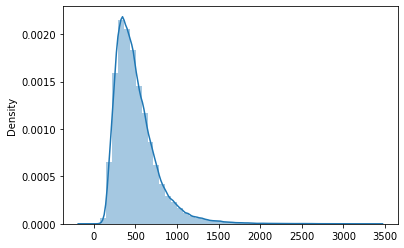

78.23514282554291
Fold 1 end
Fold 2 start
(3485151, 24)
y dist plot


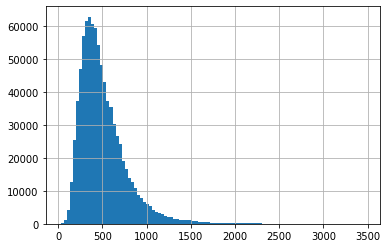

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.147478
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 246.574
[100]	valid_0's rmse: 224.329
[150]	valid_0's rmse: 207.339
[200]	valid_0's rmse: 194.383
[250]	valid_0's rmse: 183.906
[300]	valid_0's rmse: 175.398
[350]	valid_0's rmse: 168.219
[400]	valid_0's rmse: 161.979
[450]	valid_0's rmse: 156.63
[500]	valid_0's rmse: 151.858
[550]	valid_0's rmse: 147.796
[600]	valid_0's rmse: 144.251
[650]	valid_0's rmse: 141.152
[700]	valid_0's rmse: 138.245
[750]	valid_0's rmse: 135.614
[800]	valid_0's rmse: 133.314
[850]	valid_0's rmse: 131.328
[900]	valid_0's rmse: 129.582
[950]	valid_0's rmse: 128.004
[1000]	valid_0's rmse: 126.559
[1050]	valid_0's rmse: 125.183
[1100]	valid_0's rmse: 123.796
[1150]	valid_0's rmse: 122.525
[1200]	valid_0's rmse: 121.365
[1250]	valid_0's rmse: 120.511
[1300]	valid_0's rmse: 119.874
[1350]	valid_0's rmse: 119.165
[1400]	valid_0's rmse: 118.421
[1450]	valid_0's rmse: 117.801
[1500

[13100]	valid_0's rmse: 91.463
[13150]	valid_0's rmse: 91.4377
[13200]	valid_0's rmse: 91.4099
[13250]	valid_0's rmse: 91.3744
[13300]	valid_0's rmse: 91.3439
[13350]	valid_0's rmse: 91.3214
[13400]	valid_0's rmse: 91.2847
[13450]	valid_0's rmse: 91.2586
[13500]	valid_0's rmse: 91.229
[13550]	valid_0's rmse: 91.2062
[13600]	valid_0's rmse: 91.1816
[13650]	valid_0's rmse: 91.1585
[13700]	valid_0's rmse: 91.1338
[13750]	valid_0's rmse: 91.112
[13800]	valid_0's rmse: 91.0848
[13850]	valid_0's rmse: 91.0587
[13900]	valid_0's rmse: 91.0387
[13950]	valid_0's rmse: 91.0154
[14000]	valid_0's rmse: 90.9922
[14050]	valid_0's rmse: 90.9672
[14100]	valid_0's rmse: 90.9454
[14150]	valid_0's rmse: 90.9249
[14200]	valid_0's rmse: 90.8999
[14250]	valid_0's rmse: 90.8788
[14300]	valid_0's rmse: 90.8586
[14350]	valid_0's rmse: 90.8402
[14400]	valid_0's rmse: 90.8198
[14450]	valid_0's rmse: 90.7969
[14500]	valid_0's rmse: 90.7769
[14550]	valid_0's rmse: 90.752
[14600]	valid_0's rmse: 90.7312
[14650]	vali

[25950]	valid_0's rmse: 87.2234
[26000]	valid_0's rmse: 87.2102
[26050]	valid_0's rmse: 87.201
[26100]	valid_0's rmse: 87.1906
[26150]	valid_0's rmse: 87.178
[26200]	valid_0's rmse: 87.1656
[26250]	valid_0's rmse: 87.1536
[26300]	valid_0's rmse: 87.1448
[26350]	valid_0's rmse: 87.1303
[26400]	valid_0's rmse: 87.1192
[26450]	valid_0's rmse: 87.1065
[26500]	valid_0's rmse: 87.0948
[26550]	valid_0's rmse: 87.0835
[26600]	valid_0's rmse: 87.0722
[26650]	valid_0's rmse: 87.0609
[26700]	valid_0's rmse: 87.0491
[26750]	valid_0's rmse: 87.0411
[26800]	valid_0's rmse: 87.0278
[26850]	valid_0's rmse: 87.0187
[26900]	valid_0's rmse: 87.0052
[26950]	valid_0's rmse: 86.993
[27000]	valid_0's rmse: 86.9828
[27050]	valid_0's rmse: 86.973
[27100]	valid_0's rmse: 86.9624
[27150]	valid_0's rmse: 86.9518
[27200]	valid_0's rmse: 86.9403
[27250]	valid_0's rmse: 86.9277
[27300]	valid_0's rmse: 86.9163
[27350]	valid_0's rmse: 86.9038
[27400]	valid_0's rmse: 86.8926
[27450]	valid_0's rmse: 86.8834
[27500]	vali

[38800]	valid_0's rmse: 84.877
[38850]	valid_0's rmse: 84.8702
[38900]	valid_0's rmse: 84.8624
[38950]	valid_0's rmse: 84.8557
[39000]	valid_0's rmse: 84.8486
[39050]	valid_0's rmse: 84.8434
[39100]	valid_0's rmse: 84.8362
[39150]	valid_0's rmse: 84.8268
[39200]	valid_0's rmse: 84.8199
[39250]	valid_0's rmse: 84.8143
[39300]	valid_0's rmse: 84.808
[39350]	valid_0's rmse: 84.8018
[39400]	valid_0's rmse: 84.7959
[39450]	valid_0's rmse: 84.7882
[39500]	valid_0's rmse: 84.7821
[39550]	valid_0's rmse: 84.7755
[39600]	valid_0's rmse: 84.7695
[39650]	valid_0's rmse: 84.7636
[39700]	valid_0's rmse: 84.7572
[39750]	valid_0's rmse: 84.7506
[39800]	valid_0's rmse: 84.7443
[39850]	valid_0's rmse: 84.7379
[39900]	valid_0's rmse: 84.7324
[39950]	valid_0's rmse: 84.7262
[40000]	valid_0's rmse: 84.7195
[40050]	valid_0's rmse: 84.7126
[40100]	valid_0's rmse: 84.7049
[40150]	valid_0's rmse: 84.6973
[40200]	valid_0's rmse: 84.693
[40250]	valid_0's rmse: 84.6902
[40300]	valid_0's rmse: 84.689
[40350]	vali

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


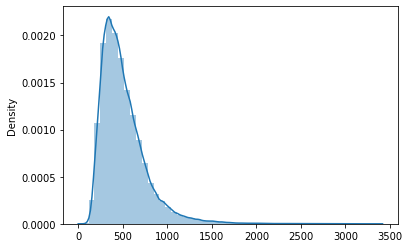

84.68496707449223
Fold 2 end
Fold 3 start
(3485151, 24)
y dist plot


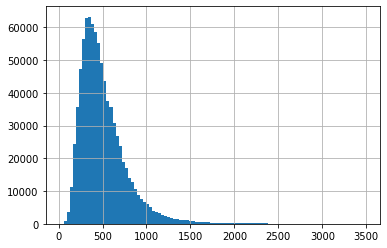

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.132835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.285224
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 245.766
[100]	valid_0's rmse: 223.516
[150]	valid_0's rmse: 206.578
[200]	valid_0's rmse: 193.61
[250]	valid_0's rmse: 183.138
[300]	valid_0's rmse: 174.655
[350]	valid_0's rmse: 167.506
[400]	valid_0's rmse: 161.32
[450]	valid_0's rmse: 155.959
[500]	valid_0's rmse: 151.276
[550]	valid_0's rmse: 147.254
[600]	valid_0's rmse: 143.705
[650]	valid_0's rmse: 140.613
[700]	valid_0's rmse: 137.879
[750]	valid_0's rmse: 135.35
[800]	valid_0's rmse: 132.969
[850]	valid_0's rmse: 130.866
[900]	valid_0's rmse: 129.009
[950]	valid_0's rmse: 127.335
[1000]	valid_0's rmse: 125.936
[1050]	valid_0's rmse: 124.277
[1100]	valid_0's rmse: 122.867
[1150]	valid_0's rmse: 121.646
[1200]	valid_0's rmse: 120.593
[1250]	valid_0's rmse: 119.652
[1300]	valid_0's rmse: 118.801
[1350]	valid_0's rmse: 117.998
[1400]	valid_0's rmse: 117.373
[1450]	valid_0's rmse: 116.572
[1500]	

[13050]	valid_0's rmse: 90.7516
[13100]	valid_0's rmse: 90.7153
[13150]	valid_0's rmse: 90.6879
[13200]	valid_0's rmse: 90.6585
[13250]	valid_0's rmse: 90.6329
[13300]	valid_0's rmse: 90.6024
[13350]	valid_0's rmse: 90.577
[13400]	valid_0's rmse: 90.5547
[13450]	valid_0's rmse: 90.5319
[13500]	valid_0's rmse: 90.5021
[13550]	valid_0's rmse: 90.4736
[13600]	valid_0's rmse: 90.4491
[13650]	valid_0's rmse: 90.4248
[13700]	valid_0's rmse: 90.4074
[13750]	valid_0's rmse: 90.3864
[13800]	valid_0's rmse: 90.3623
[13850]	valid_0's rmse: 90.3333
[13900]	valid_0's rmse: 90.3042
[13950]	valid_0's rmse: 90.2737
[14000]	valid_0's rmse: 90.2498
[14050]	valid_0's rmse: 90.2291
[14100]	valid_0's rmse: 90.2054
[14150]	valid_0's rmse: 90.1845
[14200]	valid_0's rmse: 90.1597
[14250]	valid_0's rmse: 90.1354
[14300]	valid_0's rmse: 90.1101
[14350]	valid_0's rmse: 90.0842
[14400]	valid_0's rmse: 90.0598
[14450]	valid_0's rmse: 90.0309
[14500]	valid_0's rmse: 90.0112
[14550]	valid_0's rmse: 89.9894
[14600]	v

[25950]	valid_0's rmse: 86.5096
[26000]	valid_0's rmse: 86.4984
[26050]	valid_0's rmse: 86.4879
[26100]	valid_0's rmse: 86.4778
[26150]	valid_0's rmse: 86.4653
[26200]	valid_0's rmse: 86.4535
[26250]	valid_0's rmse: 86.4418
[26300]	valid_0's rmse: 86.4319
[26350]	valid_0's rmse: 86.4219
[26400]	valid_0's rmse: 86.4104
[26450]	valid_0's rmse: 86.3972
[26500]	valid_0's rmse: 86.3849
[26550]	valid_0's rmse: 86.372
[26600]	valid_0's rmse: 86.3623
[26650]	valid_0's rmse: 86.3487
[26700]	valid_0's rmse: 86.3381
[26750]	valid_0's rmse: 86.3268
[26800]	valid_0's rmse: 86.3154
[26850]	valid_0's rmse: 86.302
[26900]	valid_0's rmse: 86.2909
[26950]	valid_0's rmse: 86.2796
[27000]	valid_0's rmse: 86.2706
[27050]	valid_0's rmse: 86.2608
[27100]	valid_0's rmse: 86.2512
[27150]	valid_0's rmse: 86.2399
[27200]	valid_0's rmse: 86.2276
[27250]	valid_0's rmse: 86.2174
[27300]	valid_0's rmse: 86.2068
[27350]	valid_0's rmse: 86.1949
[27400]	valid_0's rmse: 86.1839
[27450]	valid_0's rmse: 86.1736
[27500]	va

[38850]	valid_0's rmse: 84.2372
[38900]	valid_0's rmse: 84.2302
[38950]	valid_0's rmse: 84.2246
[39000]	valid_0's rmse: 84.2169
[39050]	valid_0's rmse: 84.2098
[39100]	valid_0's rmse: 84.2031
[39150]	valid_0's rmse: 84.1958
[39200]	valid_0's rmse: 84.1891
[39250]	valid_0's rmse: 84.1824
[39300]	valid_0's rmse: 84.1751
[39350]	valid_0's rmse: 84.1681
[39400]	valid_0's rmse: 84.1619
[39450]	valid_0's rmse: 84.1564
[39500]	valid_0's rmse: 84.149
[39550]	valid_0's rmse: 84.1427
[39600]	valid_0's rmse: 84.136
[39650]	valid_0's rmse: 84.1309
[39700]	valid_0's rmse: 84.1234
[39750]	valid_0's rmse: 84.1166
[39800]	valid_0's rmse: 84.1103
[39850]	valid_0's rmse: 84.1041
[39900]	valid_0's rmse: 84.0987
[39950]	valid_0's rmse: 84.0959
[40000]	valid_0's rmse: 84.0894
[40050]	valid_0's rmse: 84.0839
[40100]	valid_0's rmse: 84.0769
[40150]	valid_0's rmse: 84.0704
[40200]	valid_0's rmse: 84.0656
[40250]	valid_0's rmse: 84.0591
[40300]	valid_0's rmse: 84.052
[40350]	valid_0's rmse: 84.0448
[40400]	val

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


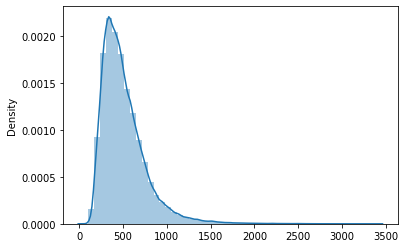

83.63217232919413
Fold 3 end
Fold 4 start
(3485152, 24)
y dist plot


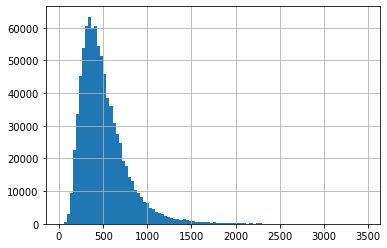

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.131423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485152, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.152112
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 246.07
[100]	valid_0's rmse: 223.848
[150]	valid_0's rmse: 206.87
[200]	valid_0's rmse: 193.861
[250]	valid_0's rmse: 183.409
[300]	valid_0's rmse: 174.906
[350]	valid_0's rmse: 167.747
[400]	valid_0's rmse: 161.543
[450]	valid_0's rmse: 156.2
[500]	valid_0's rmse: 151.49
[550]	valid_0's rmse: 147.483
[600]	valid_0's rmse: 143.922
[650]	valid_0's rmse: 140.866
[700]	valid_0's rmse: 138.025
[750]	valid_0's rmse: 135.4
[800]	valid_0's rmse: 133.061
[850]	valid_0's rmse: 130.905
[900]	valid_0's rmse: 129.164
[950]	valid_0's rmse: 127.582
[1000]	valid_0's rmse: 126.017
[1050]	valid_0's rmse: 124.633
[1100]	valid_0's rmse: 123.399
[1150]	valid_0's rmse: 122.204
[1200]	valid_0's rmse: 121.102
[1250]	valid_0's rmse: 120.196
[1300]	valid_0's rmse: 119.397
[1350]	valid_0's rmse: 118.757
[1400]	valid_0's rmse: 118.209
[1450]	valid_0's rmse: 117.635
[1500]	vali

[13100]	valid_0's rmse: 91.2346
[13150]	valid_0's rmse: 91.2085
[13200]	valid_0's rmse: 91.1869
[13250]	valid_0's rmse: 91.1616
[13300]	valid_0's rmse: 91.1357
[13350]	valid_0's rmse: 91.1088
[13400]	valid_0's rmse: 91.0835
[13450]	valid_0's rmse: 91.0559
[13500]	valid_0's rmse: 91.0317
[13550]	valid_0's rmse: 91.006
[13600]	valid_0's rmse: 90.9839
[13650]	valid_0's rmse: 90.9616
[13700]	valid_0's rmse: 90.9402
[13750]	valid_0's rmse: 90.9065
[13800]	valid_0's rmse: 90.8803
[13850]	valid_0's rmse: 90.8507
[13900]	valid_0's rmse: 90.8255
[13950]	valid_0's rmse: 90.8002
[14000]	valid_0's rmse: 90.776
[14050]	valid_0's rmse: 90.751
[14100]	valid_0's rmse: 90.7266
[14150]	valid_0's rmse: 90.6995
[14200]	valid_0's rmse: 90.6815
[14250]	valid_0's rmse: 90.6586
[14300]	valid_0's rmse: 90.6351
[14350]	valid_0's rmse: 90.6136
[14400]	valid_0's rmse: 90.59
[14450]	valid_0's rmse: 90.5687
[14500]	valid_0's rmse: 90.5464
[14550]	valid_0's rmse: 90.5116
[14600]	valid_0's rmse: 90.4903
[14650]	valid

[26000]	valid_0's rmse: 86.7874
[26050]	valid_0's rmse: 86.7784
[26100]	valid_0's rmse: 86.7677
[26150]	valid_0's rmse: 86.763
[26200]	valid_0's rmse: 86.7526
[26250]	valid_0's rmse: 86.74
[26300]	valid_0's rmse: 86.7286
[26350]	valid_0's rmse: 86.7161
[26400]	valid_0's rmse: 86.707
[26450]	valid_0's rmse: 86.6951
[26500]	valid_0's rmse: 86.6828
[26550]	valid_0's rmse: 86.6726
[26600]	valid_0's rmse: 86.6625
[26650]	valid_0's rmse: 86.6501
[26700]	valid_0's rmse: 86.6376
[26750]	valid_0's rmse: 86.6253
[26800]	valid_0's rmse: 86.6165
[26850]	valid_0's rmse: 86.6065
[26900]	valid_0's rmse: 86.5966
[26950]	valid_0's rmse: 86.5854
[27000]	valid_0's rmse: 86.5747
[27050]	valid_0's rmse: 86.564
[27100]	valid_0's rmse: 86.5532
[27150]	valid_0's rmse: 86.5421
[27200]	valid_0's rmse: 86.5324
[27250]	valid_0's rmse: 86.5239
[27300]	valid_0's rmse: 86.5126
[27350]	valid_0's rmse: 86.5005
[27400]	valid_0's rmse: 86.4909
[27450]	valid_0's rmse: 86.4811
[27500]	valid_0's rmse: 86.4724
[27550]	valid

[38900]	valid_0's rmse: 84.5786
[38950]	valid_0's rmse: 84.5726
[39000]	valid_0's rmse: 84.566
[39050]	valid_0's rmse: 84.5595
[39100]	valid_0's rmse: 84.5531
[39150]	valid_0's rmse: 84.5449
[39200]	valid_0's rmse: 84.538
[39250]	valid_0's rmse: 84.5305
[39300]	valid_0's rmse: 84.5247
[39350]	valid_0's rmse: 84.5216
[39400]	valid_0's rmse: 84.5198
[39450]	valid_0's rmse: 84.5137
[39500]	valid_0's rmse: 84.5061
[39550]	valid_0's rmse: 84.4999
[39600]	valid_0's rmse: 84.4923
[39650]	valid_0's rmse: 84.4863
[39700]	valid_0's rmse: 84.4807
[39750]	valid_0's rmse: 84.4742
[39800]	valid_0's rmse: 84.4666
[39850]	valid_0's rmse: 84.4599
[39900]	valid_0's rmse: 84.4544
[39950]	valid_0's rmse: 84.4471
[40000]	valid_0's rmse: 84.4403
[40050]	valid_0's rmse: 84.434
[40100]	valid_0's rmse: 84.4272
[40150]	valid_0's rmse: 84.4205
[40200]	valid_0's rmse: 84.4123
[40250]	valid_0's rmse: 84.4062
[40300]	valid_0's rmse: 84.3989
[40350]	valid_0's rmse: 84.3931
[40400]	valid_0's rmse: 84.3886
[40450]	val

[51800]	valid_0's rmse: 83.1311
[51850]	valid_0's rmse: 83.1268
[51900]	valid_0's rmse: 83.1226
[51950]	valid_0's rmse: 83.1179
[52000]	valid_0's rmse: 83.1124
[52050]	valid_0's rmse: 83.1071
[52100]	valid_0's rmse: 83.1023
[52150]	valid_0's rmse: 83.0982
[52200]	valid_0's rmse: 83.0937
[52250]	valid_0's rmse: 83.0884
[52300]	valid_0's rmse: 83.0834
[52350]	valid_0's rmse: 83.0786
[52400]	valid_0's rmse: 83.0744
[52450]	valid_0's rmse: 83.0704
[52500]	valid_0's rmse: 83.0648
[52550]	valid_0's rmse: 83.0599
[52600]	valid_0's rmse: 83.0554
[52650]	valid_0's rmse: 83.0506
[52700]	valid_0's rmse: 83.046
[52750]	valid_0's rmse: 83.0418
[52800]	valid_0's rmse: 83.0367
[52850]	valid_0's rmse: 83.0335
[52900]	valid_0's rmse: 83.0288
[52950]	valid_0's rmse: 83.0242
[53000]	valid_0's rmse: 83.0192
[53050]	valid_0's rmse: 83.0152
[53100]	valid_0's rmse: 83.0108
[53150]	valid_0's rmse: 83.0074
[53200]	valid_0's rmse: 83.0035
[53250]	valid_0's rmse: 82.999
[53300]	valid_0's rmse: 82.9943
[53350]	va

[64650]	valid_0's rmse: 82.1507
[64700]	valid_0's rmse: 82.1477
[64750]	valid_0's rmse: 82.1443
[64800]	valid_0's rmse: 82.1411
[64850]	valid_0's rmse: 82.1378
[64900]	valid_0's rmse: 82.1349
[64950]	valid_0's rmse: 82.132
[65000]	valid_0's rmse: 82.129
[65050]	valid_0's rmse: 82.1264
[65100]	valid_0's rmse: 82.1227
[65150]	valid_0's rmse: 82.1201
[65200]	valid_0's rmse: 82.1166
[65250]	valid_0's rmse: 82.1136
[65300]	valid_0's rmse: 82.1112
[65350]	valid_0's rmse: 82.1078
[65400]	valid_0's rmse: 82.1046
[65450]	valid_0's rmse: 82.1011
[65500]	valid_0's rmse: 82.0977
[65550]	valid_0's rmse: 82.0949
[65600]	valid_0's rmse: 82.0916
[65650]	valid_0's rmse: 82.0901
[65700]	valid_0's rmse: 82.0878
[65750]	valid_0's rmse: 82.0854
[65800]	valid_0's rmse: 82.0816
[65850]	valid_0's rmse: 82.0788
[65900]	valid_0's rmse: 82.0756
[65950]	valid_0's rmse: 82.072
[66000]	valid_0's rmse: 82.069
[66050]	valid_0's rmse: 82.0664
[66100]	valid_0's rmse: 82.0629
[66150]	valid_0's rmse: 82.0588
[66200]	vali

[77550]	valid_0's rmse: 81.4169
[77600]	valid_0's rmse: 81.4144
[77650]	valid_0's rmse: 81.4119
[77700]	valid_0's rmse: 81.4093
[77750]	valid_0's rmse: 81.4073
[77800]	valid_0's rmse: 81.4049
[77850]	valid_0's rmse: 81.4023
[77900]	valid_0's rmse: 81.4003
[77950]	valid_0's rmse: 81.3982
[78000]	valid_0's rmse: 81.3964
[78050]	valid_0's rmse: 81.3936
[78100]	valid_0's rmse: 81.3915
[78150]	valid_0's rmse: 81.3891
[78200]	valid_0's rmse: 81.3869
[78250]	valid_0's rmse: 81.3835
[78300]	valid_0's rmse: 81.3795
[78350]	valid_0's rmse: 81.3773
[78400]	valid_0's rmse: 81.3753
[78450]	valid_0's rmse: 81.3726
[78500]	valid_0's rmse: 81.3704
[78550]	valid_0's rmse: 81.3682
[78600]	valid_0's rmse: 81.3657
[78650]	valid_0's rmse: 81.3635
[78700]	valid_0's rmse: 81.3611
[78750]	valid_0's rmse: 81.3589
[78800]	valid_0's rmse: 81.3557
[78850]	valid_0's rmse: 81.3536
[78900]	valid_0's rmse: 81.3517
[78950]	valid_0's rmse: 81.3489
[79000]	valid_0's rmse: 81.3473
[79050]	valid_0's rmse: 81.3459
[79100]	

[90400]	valid_0's rmse: 80.7515
[90450]	valid_0's rmse: 80.7495
[90500]	valid_0's rmse: 80.748
[90550]	valid_0's rmse: 80.7466
[90600]	valid_0's rmse: 80.7457
[90650]	valid_0's rmse: 80.7444
[90700]	valid_0's rmse: 80.743
[90750]	valid_0's rmse: 80.7414
[90800]	valid_0's rmse: 80.7392
[90850]	valid_0's rmse: 80.7378
[90900]	valid_0's rmse: 80.7358
[90950]	valid_0's rmse: 80.7342
[91000]	valid_0's rmse: 80.7323
[91050]	valid_0's rmse: 80.7305
[91100]	valid_0's rmse: 80.7289
[91150]	valid_0's rmse: 80.727
[91200]	valid_0's rmse: 80.7256
[91250]	valid_0's rmse: 80.7239
[91300]	valid_0's rmse: 80.7216
[91350]	valid_0's rmse: 80.7199
[91400]	valid_0's rmse: 80.7179
[91450]	valid_0's rmse: 80.7166
[91500]	valid_0's rmse: 80.7146
[91550]	valid_0's rmse: 80.7131
[91600]	valid_0's rmse: 80.7115
[91650]	valid_0's rmse: 80.7095
[91700]	valid_0's rmse: 80.7076
[91750]	valid_0's rmse: 80.7052
[91800]	valid_0's rmse: 80.7033
[91850]	valid_0's rmse: 80.6996
[91900]	valid_0's rmse: 80.6974
[91950]	val

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


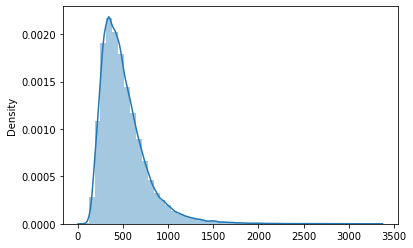

80.38552598696813
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [16]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['가격_면적']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['가격_면적']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'huber',
        'alpha':1.35,
        'learning_rate': 1,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'rmse',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 500000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_subway_huber_lr1_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.distplot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

In [17]:
np.sqrt(mean_squared_error(training_data_df['가격_면적'], oof))

81.62289552636697

Fold 0 start
(3485151, 24)
y dist plot


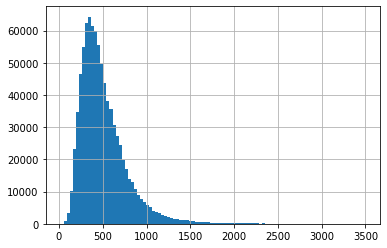

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.305160
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 113.766
[100]	valid_0's rmse: 105.422
[150]	valid_0's rmse: 102.251
[200]	valid_0's rmse: 100.463
[250]	valid_0's rmse: 98.9479
[300]	valid_0's rmse: 97.6895
[350]	valid_0's rmse: 96.652
[400]	valid_0's rmse: 95.7492
[450]	valid_0's rmse: 94.9191
[500]	valid_0's rmse: 94.1957
[550]	valid_0's rmse: 93.6076
[600]	valid_0's rmse: 92.987
[650]	valid_0's rmse: 92.4055
[700]	valid_0's rmse: 91.8444
[750]	valid_0's rmse: 91.3769
[800]	valid_0's rmse: 91.0042
[850]	valid_0's rmse: 90.6324
[900]	valid_0's rmse: 90.2806
[950]	valid_0's rmse: 89.9525
[1000]	valid_0's rmse: 89.599
[1050]	valid_0's rmse: 89.2901
[1100]	valid_0's rmse: 88.9685
[1150]	valid_0's rmse: 88.6875
[1200]	valid_0's rmse: 88.4154
[1250]	valid_0's rmse: 88.1195
[1300]	valid_0's rmse: 87.8452
[1350]	valid_0's rmse: 87.6084
[1400]	valid_0's rmse: 87.4189
[1450]	valid_0's rmse: 87.1921
[1500]	

[13100]	valid_0's rmse: 77.6038
[13150]	valid_0's rmse: 77.596
[13200]	valid_0's rmse: 77.5876
[13250]	valid_0's rmse: 77.5795
[13300]	valid_0's rmse: 77.5686
[13350]	valid_0's rmse: 77.5613
[13400]	valid_0's rmse: 77.5533
[13450]	valid_0's rmse: 77.544
[13500]	valid_0's rmse: 77.5361
[13550]	valid_0's rmse: 77.529
[13600]	valid_0's rmse: 77.5208
[13650]	valid_0's rmse: 77.5137
[13700]	valid_0's rmse: 77.5059
[13750]	valid_0's rmse: 77.4953
[13800]	valid_0's rmse: 77.4869
[13850]	valid_0's rmse: 77.4809
[13900]	valid_0's rmse: 77.4715
[13950]	valid_0's rmse: 77.4659
[14000]	valid_0's rmse: 77.4592
[14050]	valid_0's rmse: 77.4511
[14100]	valid_0's rmse: 77.444
[14150]	valid_0's rmse: 77.4374
[14200]	valid_0's rmse: 77.4291
[14250]	valid_0's rmse: 77.4213
[14300]	valid_0's rmse: 77.4146
[14350]	valid_0's rmse: 77.4064
[14400]	valid_0's rmse: 77.4003
[14450]	valid_0's rmse: 77.3928
[14500]	valid_0's rmse: 77.3845
[14550]	valid_0's rmse: 77.3777
[14600]	valid_0's rmse: 77.3721
[14650]	vali

[26000]	valid_0's rmse: 76.619
[26050]	valid_0's rmse: 76.6169
[26100]	valid_0's rmse: 76.6154
[26150]	valid_0's rmse: 76.6138
[26200]	valid_0's rmse: 76.6126
[26250]	valid_0's rmse: 76.6109
[26300]	valid_0's rmse: 76.6093
[26350]	valid_0's rmse: 76.6069
[26400]	valid_0's rmse: 76.6059
[26450]	valid_0's rmse: 76.6038
[26500]	valid_0's rmse: 76.6014
[26550]	valid_0's rmse: 76.6002
[26600]	valid_0's rmse: 76.5988
[26650]	valid_0's rmse: 76.5969
[26700]	valid_0's rmse: 76.5953
[26750]	valid_0's rmse: 76.595
[26800]	valid_0's rmse: 76.5939
[26850]	valid_0's rmse: 76.5927
[26900]	valid_0's rmse: 76.5909
[26950]	valid_0's rmse: 76.5887
[27000]	valid_0's rmse: 76.5877
[27050]	valid_0's rmse: 76.5867
[27100]	valid_0's rmse: 76.585
[27150]	valid_0's rmse: 76.5843
[27200]	valid_0's rmse: 76.5833
[27250]	valid_0's rmse: 76.582
[27300]	valid_0's rmse: 76.5812
[27350]	valid_0's rmse: 76.58
[27400]	valid_0's rmse: 76.5779
[27450]	valid_0's rmse: 76.5768
[27500]	valid_0's rmse: 76.5749
[27550]	valid_

<Figure size 432x288 with 0 Axes>

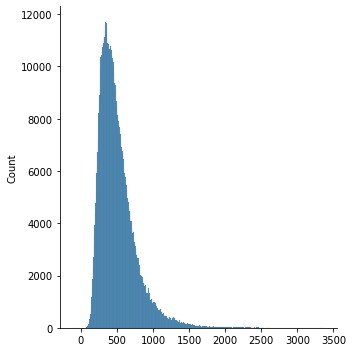

76.5634992244189
Fold 0 end
Fold 1 start
(3485151, 24)
y dist plot


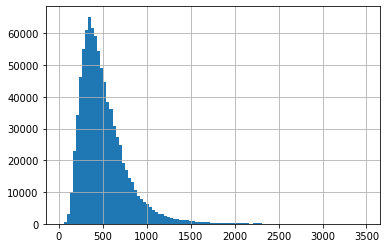

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.281248
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 114.062
[100]	valid_0's rmse: 105.461
[150]	valid_0's rmse: 102.206
[200]	valid_0's rmse: 100.053
[250]	valid_0's rmse: 98.5012
[300]	valid_0's rmse: 97.1286
[350]	valid_0's rmse: 96.1351
[400]	valid_0's rmse: 95.3893
[450]	valid_0's rmse: 94.6027
[500]	valid_0's rmse: 93.9048
[550]	valid_0's rmse: 93.2088
[600]	valid_0's rmse: 92.7173
[650]	valid_0's rmse: 92.2
[700]	valid_0's rmse: 91.6272
[750]	valid_0's rmse: 91.2157
[800]	valid_0's rmse: 90.7696
[850]	valid_0's rmse: 90.3554
[900]	valid_0's rmse: 89.965
[950]	valid_0's rmse: 89.6
[1000]	valid_0's rmse: 89.2558
[1050]	valid_0's rmse: 88.9276
[1100]	valid_0's rmse: 88.5782
[1150]	valid_0's rmse: 88.2697
[1200]	valid_0's rmse: 88.0108
[1250]	valid_0's rmse: 87.7326
[1300]	valid_0's rmse: 87.4907
[1350]	valid_0's rmse: 87.2218
[1400]	valid_0's rmse: 87.0174
[1450]	valid_0's rmse: 86.8391
[1500]	vali

[13100]	valid_0's rmse: 77.617
[13150]	valid_0's rmse: 77.607
[13200]	valid_0's rmse: 77.5992
[13250]	valid_0's rmse: 77.5939
[13300]	valid_0's rmse: 77.5849
[13350]	valid_0's rmse: 77.5762
[13400]	valid_0's rmse: 77.5692
[13450]	valid_0's rmse: 77.5644
[13500]	valid_0's rmse: 77.5579
[13550]	valid_0's rmse: 77.5524
[13600]	valid_0's rmse: 77.5471
[13650]	valid_0's rmse: 77.5423
[13700]	valid_0's rmse: 77.5359
[13750]	valid_0's rmse: 77.5277
[13800]	valid_0's rmse: 77.5193
[13850]	valid_0's rmse: 77.5126
[13900]	valid_0's rmse: 77.5058
[13950]	valid_0's rmse: 77.4987
[14000]	valid_0's rmse: 77.4909
[14050]	valid_0's rmse: 77.4853
[14100]	valid_0's rmse: 77.479
[14150]	valid_0's rmse: 77.4724
[14200]	valid_0's rmse: 77.4667
[14250]	valid_0's rmse: 77.4597
[14300]	valid_0's rmse: 77.4537
[14350]	valid_0's rmse: 77.4485
[14400]	valid_0's rmse: 77.4418
[14450]	valid_0's rmse: 77.4355
[14500]	valid_0's rmse: 77.4295
[14550]	valid_0's rmse: 77.4237
[14600]	valid_0's rmse: 77.4154
[14650]	val

[26000]	valid_0's rmse: 76.7326
[26050]	valid_0's rmse: 76.7293
[26100]	valid_0's rmse: 76.7279
[26150]	valid_0's rmse: 76.7265
[26200]	valid_0's rmse: 76.7254
[26250]	valid_0's rmse: 76.7229
[26300]	valid_0's rmse: 76.7219
[26350]	valid_0's rmse: 76.7204
[26400]	valid_0's rmse: 76.7196
[26450]	valid_0's rmse: 76.7183
[26500]	valid_0's rmse: 76.7168
[26550]	valid_0's rmse: 76.7146
[26600]	valid_0's rmse: 76.7134
[26650]	valid_0's rmse: 76.7119
[26700]	valid_0's rmse: 76.7096
[26750]	valid_0's rmse: 76.7082
[26800]	valid_0's rmse: 76.7085
[26850]	valid_0's rmse: 76.7082
[26900]	valid_0's rmse: 76.7067
[26950]	valid_0's rmse: 76.7059
[27000]	valid_0's rmse: 76.7051
[27050]	valid_0's rmse: 76.7041
[27100]	valid_0's rmse: 76.7021
[27150]	valid_0's rmse: 76.7018
[27200]	valid_0's rmse: 76.7013
[27250]	valid_0's rmse: 76.7004
[27300]	valid_0's rmse: 76.7005
[27350]	valid_0's rmse: 76.7001
[27400]	valid_0's rmse: 76.7
[27450]	valid_0's rmse: 76.6986
[27500]	valid_0's rmse: 76.6968
[27550]	val

<Figure size 432x288 with 0 Axes>

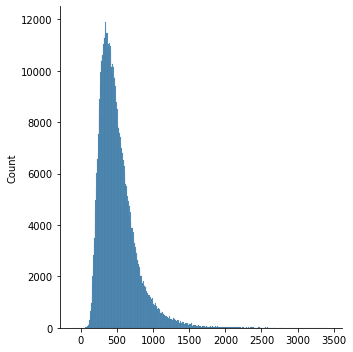

76.67085053352689
Fold 1 end
Fold 2 start
(3485151, 24)
y dist plot


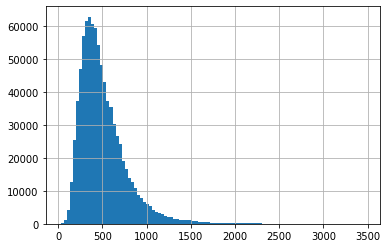

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.147478
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 114.362
[100]	valid_0's rmse: 105.71
[150]	valid_0's rmse: 102.283
[200]	valid_0's rmse: 100.347
[250]	valid_0's rmse: 98.885
[300]	valid_0's rmse: 97.671
[350]	valid_0's rmse: 96.5743
[400]	valid_0's rmse: 95.7306
[450]	valid_0's rmse: 94.9926
[500]	valid_0's rmse: 94.2666
[550]	valid_0's rmse: 93.6188
[600]	valid_0's rmse: 92.9978
[650]	valid_0's rmse: 92.4696
[700]	valid_0's rmse: 91.979
[750]	valid_0's rmse: 91.4907
[800]	valid_0's rmse: 90.9455
[850]	valid_0's rmse: 90.5774
[900]	valid_0's rmse: 90.1366
[950]	valid_0's rmse: 89.7664
[1000]	valid_0's rmse: 89.4112
[1050]	valid_0's rmse: 89.1199
[1100]	valid_0's rmse: 88.8348
[1150]	valid_0's rmse: 88.5648
[1200]	valid_0's rmse: 88.2854
[1250]	valid_0's rmse: 88.0254
[1300]	valid_0's rmse: 87.742
[1350]	valid_0's rmse: 87.5028
[1400]	valid_0's rmse: 87.2751
[1450]	valid_0's rmse: 87.0344
[1500]	va

[13100]	valid_0's rmse: 77.7352
[13150]	valid_0's rmse: 77.7263
[13200]	valid_0's rmse: 77.7188
[13250]	valid_0's rmse: 77.713
[13300]	valid_0's rmse: 77.7038
[13350]	valid_0's rmse: 77.6968
[13400]	valid_0's rmse: 77.6888
[13450]	valid_0's rmse: 77.6816
[13500]	valid_0's rmse: 77.6756
[13550]	valid_0's rmse: 77.6687
[13600]	valid_0's rmse: 77.6617
[13650]	valid_0's rmse: 77.6537
[13700]	valid_0's rmse: 77.6452
[13750]	valid_0's rmse: 77.6364
[13800]	valid_0's rmse: 77.6292
[13850]	valid_0's rmse: 77.6211
[13900]	valid_0's rmse: 77.6152
[13950]	valid_0's rmse: 77.6123
[14000]	valid_0's rmse: 77.6043
[14050]	valid_0's rmse: 77.5975
[14100]	valid_0's rmse: 77.5902
[14150]	valid_0's rmse: 77.5852
[14200]	valid_0's rmse: 77.5793
[14250]	valid_0's rmse: 77.5732
[14300]	valid_0's rmse: 77.568
[14350]	valid_0's rmse: 77.5616
[14400]	valid_0's rmse: 77.5553
[14450]	valid_0's rmse: 77.5463
[14500]	valid_0's rmse: 77.5403
[14550]	valid_0's rmse: 77.5325
[14600]	valid_0's rmse: 77.5269
[14650]	va

<Figure size 432x288 with 0 Axes>

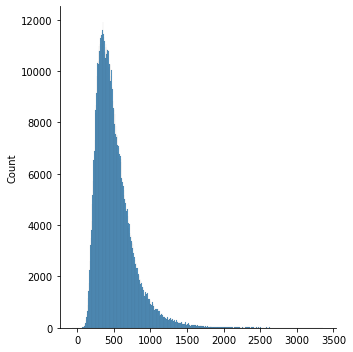

76.93773574262374
Fold 2 end
Fold 3 start
(3485151, 24)
y dist plot


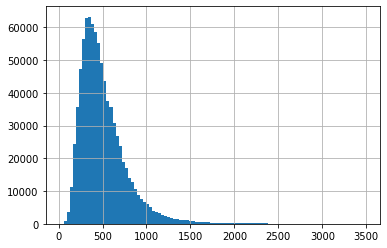

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.285224
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 113.762
[100]	valid_0's rmse: 105.295
[150]	valid_0's rmse: 102.059
[200]	valid_0's rmse: 100.038
[250]	valid_0's rmse: 98.5829
[300]	valid_0's rmse: 97.2496
[350]	valid_0's rmse: 96.255
[400]	valid_0's rmse: 95.2542
[450]	valid_0's rmse: 94.4634
[500]	valid_0's rmse: 93.7801
[550]	valid_0's rmse: 93.1514
[600]	valid_0's rmse: 92.5684
[650]	valid_0's rmse: 91.9805
[700]	valid_0's rmse: 91.4474
[750]	valid_0's rmse: 90.9509
[800]	valid_0's rmse: 90.506
[850]	valid_0's rmse: 90.0404
[900]	valid_0's rmse: 89.6886
[950]	valid_0's rmse: 89.3256
[1000]	valid_0's rmse: 89.0067
[1050]	valid_0's rmse: 88.6726
[1100]	valid_0's rmse: 88.3447
[1150]	valid_0's rmse: 88.0803
[1200]	valid_0's rmse: 87.8109
[1250]	valid_0's rmse: 87.5828
[1300]	valid_0's rmse: 87.3884
[1350]	valid_0's rmse: 87.1308
[1400]	valid_0's rmse: 86.9081
[1450]	valid_0's rmse: 86.6717
[1500]

[13050]	valid_0's rmse: 77.3122
[13100]	valid_0's rmse: 77.3032
[13150]	valid_0's rmse: 77.2964
[13200]	valid_0's rmse: 77.2895
[13250]	valid_0's rmse: 77.284
[13300]	valid_0's rmse: 77.2786
[13350]	valid_0's rmse: 77.2705
[13400]	valid_0's rmse: 77.2632
[13450]	valid_0's rmse: 77.2567
[13500]	valid_0's rmse: 77.2507
[13550]	valid_0's rmse: 77.2442
[13600]	valid_0's rmse: 77.2378
[13650]	valid_0's rmse: 77.2307
[13700]	valid_0's rmse: 77.2239
[13750]	valid_0's rmse: 77.2143
[13800]	valid_0's rmse: 77.2066
[13850]	valid_0's rmse: 77.1991
[13900]	valid_0's rmse: 77.1887
[13950]	valid_0's rmse: 77.1845
[14000]	valid_0's rmse: 77.1798
[14050]	valid_0's rmse: 77.1727
[14100]	valid_0's rmse: 77.1637
[14150]	valid_0's rmse: 77.1575
[14200]	valid_0's rmse: 77.1499
[14250]	valid_0's rmse: 77.1439
[14300]	valid_0's rmse: 77.1364
[14350]	valid_0's rmse: 77.1315
[14400]	valid_0's rmse: 77.1241
[14450]	valid_0's rmse: 77.1174
[14500]	valid_0's rmse: 77.1092
[14550]	valid_0's rmse: 77.101
[14600]	va

<Figure size 432x288 with 0 Axes>

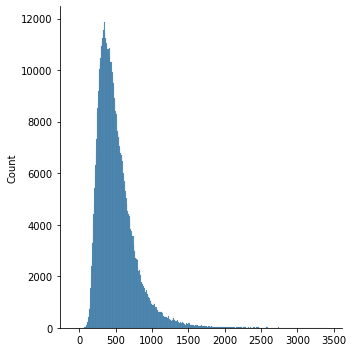

76.3789152206387
Fold 3 end
Fold 4 start
(3485152, 24)
y dist plot


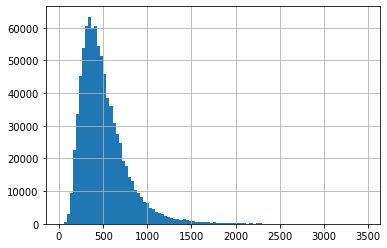

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485152, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 508.152112
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 114.262
[100]	valid_0's rmse: 105.487
[150]	valid_0's rmse: 102.272
[200]	valid_0's rmse: 100.246
[250]	valid_0's rmse: 98.7932
[300]	valid_0's rmse: 97.4723
[350]	valid_0's rmse: 96.315
[400]	valid_0's rmse: 95.4307
[450]	valid_0's rmse: 94.5997
[500]	valid_0's rmse: 93.8769
[550]	valid_0's rmse: 93.2301
[600]	valid_0's rmse: 92.6672
[650]	valid_0's rmse: 92.1678
[700]	valid_0's rmse: 91.6279
[750]	valid_0's rmse: 91.2353
[800]	valid_0's rmse: 90.7909
[850]	valid_0's rmse: 90.4264
[900]	valid_0's rmse: 90.0687
[950]	valid_0's rmse: 89.6823
[1000]	valid_0's rmse: 89.3273
[1050]	valid_0's rmse: 89.0379
[1100]	valid_0's rmse: 88.7301
[1150]	valid_0's rmse: 88.4617
[1200]	valid_0's rmse: 88.1382
[1250]	valid_0's rmse: 87.8884
[1300]	valid_0's rmse: 87.6116
[1350]	valid_0's rmse: 87.3865
[1400]	valid_0's rmse: 87.1735
[1450]	valid_0's rmse: 86.9686
[1500

[13100]	valid_0's rmse: 77.5858
[13150]	valid_0's rmse: 77.5758
[13200]	valid_0's rmse: 77.5677
[13250]	valid_0's rmse: 77.5605
[13300]	valid_0's rmse: 77.5542
[13350]	valid_0's rmse: 77.5456
[13400]	valid_0's rmse: 77.5373
[13450]	valid_0's rmse: 77.5316
[13500]	valid_0's rmse: 77.5252
[13550]	valid_0's rmse: 77.518
[13600]	valid_0's rmse: 77.5063
[13650]	valid_0's rmse: 77.5003
[13700]	valid_0's rmse: 77.4918
[13750]	valid_0's rmse: 77.483
[13800]	valid_0's rmse: 77.4768
[13850]	valid_0's rmse: 77.4679
[13900]	valid_0's rmse: 77.4597
[13950]	valid_0's rmse: 77.4546
[14000]	valid_0's rmse: 77.4476
[14050]	valid_0's rmse: 77.441
[14100]	valid_0's rmse: 77.437
[14150]	valid_0's rmse: 77.4324
[14200]	valid_0's rmse: 77.4248
[14250]	valid_0's rmse: 77.418
[14300]	valid_0's rmse: 77.4114
[14350]	valid_0's rmse: 77.4067
[14400]	valid_0's rmse: 77.3993
[14450]	valid_0's rmse: 77.3928
[14500]	valid_0's rmse: 77.3866
[14550]	valid_0's rmse: 77.3811
[14600]	valid_0's rmse: 77.3759
[14650]	valid

[25950]	valid_0's rmse: 76.6842
[26000]	valid_0's rmse: 76.6837
[26050]	valid_0's rmse: 76.6826
[26100]	valid_0's rmse: 76.6805
[26150]	valid_0's rmse: 76.6798
[26200]	valid_0's rmse: 76.6791
[26250]	valid_0's rmse: 76.678
[26300]	valid_0's rmse: 76.6754
[26350]	valid_0's rmse: 76.6749
[26400]	valid_0's rmse: 76.6735
[26450]	valid_0's rmse: 76.6732
[26500]	valid_0's rmse: 76.6725
[26550]	valid_0's rmse: 76.6711
[26600]	valid_0's rmse: 76.6709
[26650]	valid_0's rmse: 76.6712
[26700]	valid_0's rmse: 76.6694
[26750]	valid_0's rmse: 76.6678
[26800]	valid_0's rmse: 76.6655
[26850]	valid_0's rmse: 76.6643
[26900]	valid_0's rmse: 76.6628
[26950]	valid_0's rmse: 76.6623
[27000]	valid_0's rmse: 76.6614
[27050]	valid_0's rmse: 76.6613
[27100]	valid_0's rmse: 76.6603
[27150]	valid_0's rmse: 76.659
[27200]	valid_0's rmse: 76.6582
[27250]	valid_0's rmse: 76.657
[27300]	valid_0's rmse: 76.6561
[27350]	valid_0's rmse: 76.6554
[27400]	valid_0's rmse: 76.6547
[27450]	valid_0's rmse: 76.6539
[27500]	val

<Figure size 432x288 with 0 Axes>

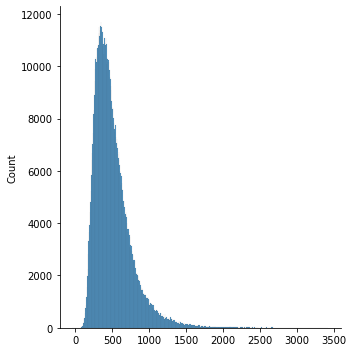

76.6373878893562
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [18]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['가격_면적']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['가격_면적']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'regression',
        #'alpha': 1.35,
        'learning_rate': 0.1,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'rmse',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 500000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_subway_mse_lr0point1_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

In [19]:
np.sqrt(mean_squared_error(training_data_df['가격_면적'], oof))

76.63789118849442

Fold 0 start
(3485151, 24)
y dist plot


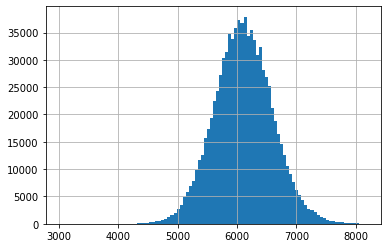

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.488195
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 206.028
[100]	valid_0's rmse: 197.922
[150]	valid_0's rmse: 193.258
[200]	valid_0's rmse: 189.978
[250]	valid_0's rmse: 187.54
[300]	valid_0's rmse: 185.687
[350]	valid_0's rmse: 184.189
[400]	valid_0's rmse: 182.841
[450]	valid_0's rmse: 181.526
[500]	valid_0's rmse: 180.376
[550]	valid_0's rmse: 179.496
[600]	valid_0's rmse: 178.591
[650]	valid_0's rmse: 177.738
[700]	valid_0's rmse: 177.071
[750]	valid_0's rmse: 176.445
[800]	valid_0's rmse: 175.814
[850]	valid_0's rmse: 175.216
[900]	valid_0's rmse: 174.668
[950]	valid_0's rmse: 174.134
[1000]	valid_0's rmse: 173.662
[1050]	valid_0's rmse: 173.201
[1100]	valid_0's rmse: 172.774
[1150]	valid_0's rmse: 172.401
[1200]	valid_0's rmse: 171.962
[1250]	valid_0's rmse: 171.573
[1300]	valid_0's rmse: 171.237
[1350]	valid_0's rmse: 170.868
[1400]	valid_0's rmse: 170.51
[1450]	valid_0's rmse: 170.217
[1500

<Figure size 432x288 with 0 Axes>

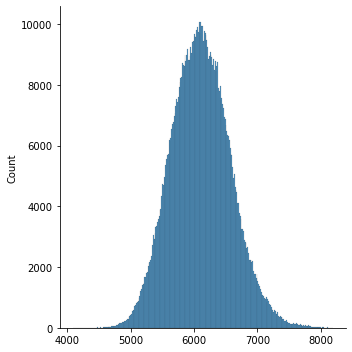

160.9373133259419
Fold 0 end
Fold 1 start
(3485151, 24)
y dist plot


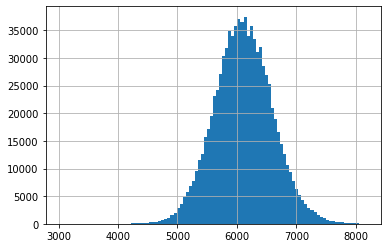

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.408061
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 205.073
[100]	valid_0's rmse: 197.381
[150]	valid_0's rmse: 192.751
[200]	valid_0's rmse: 189.839
[250]	valid_0's rmse: 187.591
[300]	valid_0's rmse: 185.507
[350]	valid_0's rmse: 183.829
[400]	valid_0's rmse: 182.293
[450]	valid_0's rmse: 181.12
[500]	valid_0's rmse: 179.986
[550]	valid_0's rmse: 178.987
[600]	valid_0's rmse: 178.038
[650]	valid_0's rmse: 177.286
[700]	valid_0's rmse: 176.557
[750]	valid_0's rmse: 175.922
[800]	valid_0's rmse: 175.317
[850]	valid_0's rmse: 174.693
[900]	valid_0's rmse: 174.198
[950]	valid_0's rmse: 173.725
[1000]	valid_0's rmse: 173.251
[1050]	valid_0's rmse: 172.874
[1100]	valid_0's rmse: 172.483
[1150]	valid_0's rmse: 172.08
[1200]	valid_0's rmse: 171.73
[1250]	valid_0's rmse: 171.397
[1300]	valid_0's rmse: 171.047
[1350]	valid_0's rmse: 170.724
[1400]	valid_0's rmse: 170.391
[1450]	valid_0's rmse: 170.063
[1500]

<Figure size 432x288 with 0 Axes>

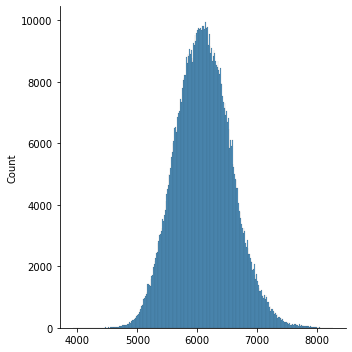

161.21718814183302
Fold 1 end
Fold 2 start
(3485151, 24)
y dist plot


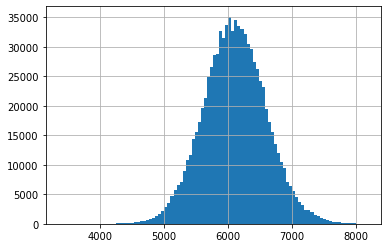

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.213814
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 205.665
[100]	valid_0's rmse: 197.871
[150]	valid_0's rmse: 193.377
[200]	valid_0's rmse: 189.91
[250]	valid_0's rmse: 187.533
[300]	valid_0's rmse: 185.664
[350]	valid_0's rmse: 184.189
[400]	valid_0's rmse: 182.661
[450]	valid_0's rmse: 181.503
[500]	valid_0's rmse: 180.402
[550]	valid_0's rmse: 179.324
[600]	valid_0's rmse: 178.48
[650]	valid_0's rmse: 177.625
[700]	valid_0's rmse: 176.855
[750]	valid_0's rmse: 176.169
[800]	valid_0's rmse: 175.549
[850]	valid_0's rmse: 174.91
[900]	valid_0's rmse: 174.36
[950]	valid_0's rmse: 173.933
[1000]	valid_0's rmse: 173.434
[1050]	valid_0's rmse: 172.929
[1100]	valid_0's rmse: 172.512
[1150]	valid_0's rmse: 172.089
[1200]	valid_0's rmse: 171.701
[1250]	valid_0's rmse: 171.349
[1300]	valid_0's rmse: 171.011
[1350]	valid_0's rmse: 170.714
[1400]	valid_0's rmse: 170.38
[1450]	valid_0's rmse: 170.067
[1500]	v

<Figure size 432x288 with 0 Axes>

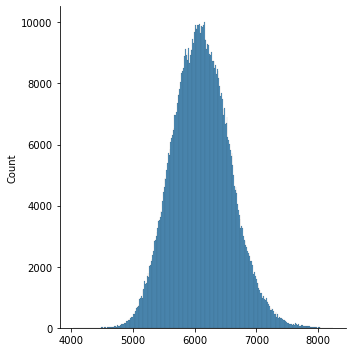

160.95301401291954
Fold 2 end
Fold 3 start
(3485151, 24)
y dist plot


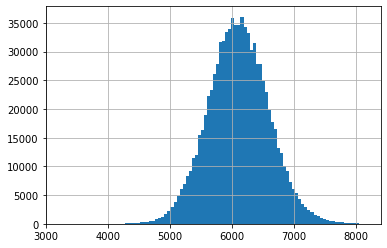

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.369330
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 205.879
[100]	valid_0's rmse: 197.464
[150]	valid_0's rmse: 193.047
[200]	valid_0's rmse: 190.188
[250]	valid_0's rmse: 187.624
[300]	valid_0's rmse: 185.704
[350]	valid_0's rmse: 183.934
[400]	valid_0's rmse: 182.526
[450]	valid_0's rmse: 181.38
[500]	valid_0's rmse: 180.314
[550]	valid_0's rmse: 179.229
[600]	valid_0's rmse: 178.291
[650]	valid_0's rmse: 177.442
[700]	valid_0's rmse: 176.714
[750]	valid_0's rmse: 176.035
[800]	valid_0's rmse: 175.381
[850]	valid_0's rmse: 174.779
[900]	valid_0's rmse: 174.286
[950]	valid_0's rmse: 173.692
[1000]	valid_0's rmse: 173.241
[1050]	valid_0's rmse: 172.781
[1100]	valid_0's rmse: 172.388
[1150]	valid_0's rmse: 171.987
[1200]	valid_0's rmse: 171.63
[1250]	valid_0's rmse: 171.23
[1300]	valid_0's rmse: 170.864
[1350]	valid_0's rmse: 170.55
[1400]	valid_0's rmse: 170.272
[1450]	valid_0's rmse: 169.994
[1500]	

<Figure size 432x288 with 0 Axes>

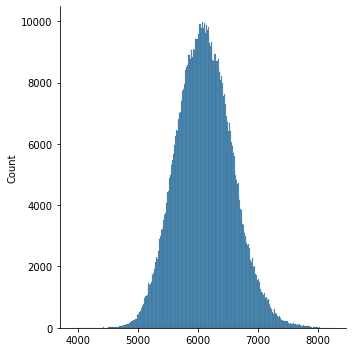

160.76784147658512
Fold 3 end
Fold 4 start
(3485152, 24)
y dist plot


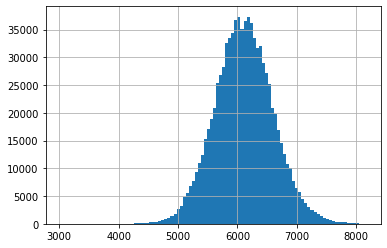

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485152, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.103651
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 205.72
[100]	valid_0's rmse: 197.347
[150]	valid_0's rmse: 192.712
[200]	valid_0's rmse: 189.733
[250]	valid_0's rmse: 187.222
[300]	valid_0's rmse: 185.332
[350]	valid_0's rmse: 183.595
[400]	valid_0's rmse: 182.16
[450]	valid_0's rmse: 180.954
[500]	valid_0's rmse: 179.787
[550]	valid_0's rmse: 178.719
[600]	valid_0's rmse: 177.856
[650]	valid_0's rmse: 177.114
[700]	valid_0's rmse: 176.397
[750]	valid_0's rmse: 175.752
[800]	valid_0's rmse: 175.172
[850]	valid_0's rmse: 174.667
[900]	valid_0's rmse: 174.162
[950]	valid_0's rmse: 173.679
[1000]	valid_0's rmse: 173.136
[1050]	valid_0's rmse: 172.654
[1100]	valid_0's rmse: 172.227
[1150]	valid_0's rmse: 171.748
[1200]	valid_0's rmse: 171.349
[1250]	valid_0's rmse: 170.999
[1300]	valid_0's rmse: 170.685
[1350]	valid_0's rmse: 170.333
[1400]	valid_0's rmse: 170.017
[1450]	valid_0's rmse: 169.669
[1500

<Figure size 432x288 with 0 Axes>

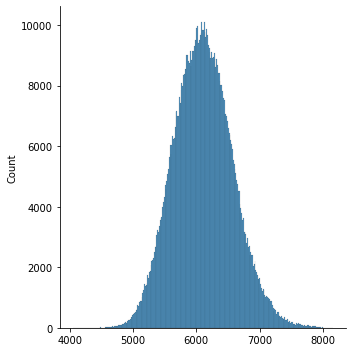

160.76549586955778
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [20]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['log_transformed']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['log_transformed']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'regression',
        #'alpha': 1.35,
        'learning_rate': 0.3,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'rmse',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 50000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_subway_mse_log_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

Fold 0 start
(3485151, 24)
y dist plot


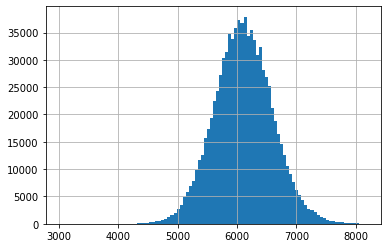

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.488195
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 404.005
[100]	valid_0's rmse: 341.325
[150]	valid_0's rmse: 298.992
[200]	valid_0's rmse: 271.362
[250]	valid_0's rmse: 253.957
[300]	valid_0's rmse: 242.91
[350]	valid_0's rmse: 235.627
[400]	valid_0's rmse: 230.166
[450]	valid_0's rmse: 226.033
[500]	valid_0's rmse: 222.894
[550]	valid_0's rmse: 220.339
[600]	valid_0's rmse: 218.235
[650]	valid_0's rmse: 216.385
[700]	valid_0's rmse: 214.824
[750]	valid_0's rmse: 213.494
[800]	valid_0's rmse: 212.362
[850]	valid_0's rmse: 211.402
[900]	valid_0's rmse: 210.495
[950]	valid_0's rmse: 209.706
[1000]	valid_0's rmse: 208.978
[1050]	valid_0's rmse: 208.244
[1100]	valid_0's rmse: 207.6
[1150]	valid_0's rmse: 207.074
[1200]	valid_0's rmse: 206.601
[1250]	valid_0's rmse: 206.064
[1300]	valid_0's rmse: 205.613
[1350]	valid_0's rmse: 205.16
[1400]	valid_0's rmse: 204.754
[1450]	valid_0's rmse: 204.338
[1500]	

[13100]	valid_0's rmse: 182.733
[13150]	valid_0's rmse: 182.707
[13200]	valid_0's rmse: 182.679
[13250]	valid_0's rmse: 182.651
[13300]	valid_0's rmse: 182.629
[13350]	valid_0's rmse: 182.607
[13400]	valid_0's rmse: 182.583
[13450]	valid_0's rmse: 182.56
[13500]	valid_0's rmse: 182.536
[13550]	valid_0's rmse: 182.513
[13600]	valid_0's rmse: 182.484
[13650]	valid_0's rmse: 182.45
[13700]	valid_0's rmse: 182.442
[13750]	valid_0's rmse: 182.409
[13800]	valid_0's rmse: 182.378
[13850]	valid_0's rmse: 182.352
[13900]	valid_0's rmse: 182.319
[13950]	valid_0's rmse: 182.286
[14000]	valid_0's rmse: 182.26
[14050]	valid_0's rmse: 182.237
[14100]	valid_0's rmse: 182.211
[14150]	valid_0's rmse: 182.186
[14200]	valid_0's rmse: 182.166
[14250]	valid_0's rmse: 182.141
[14300]	valid_0's rmse: 182.114
[14350]	valid_0's rmse: 182.08
[14400]	valid_0's rmse: 182.052
[14450]	valid_0's rmse: 182.024
[14500]	valid_0's rmse: 181.992
[14550]	valid_0's rmse: 181.966
[14600]	valid_0's rmse: 181.954
[14650]	vali

[25950]	valid_0's rmse: 178.6
[26000]	valid_0's rmse: 178.594
[26050]	valid_0's rmse: 178.587
[26100]	valid_0's rmse: 178.585
[26150]	valid_0's rmse: 178.583
[26200]	valid_0's rmse: 178.573
[26250]	valid_0's rmse: 178.56
[26300]	valid_0's rmse: 178.543
[26350]	valid_0's rmse: 178.533
[26400]	valid_0's rmse: 178.524
[26450]	valid_0's rmse: 178.515
[26500]	valid_0's rmse: 178.505
[26550]	valid_0's rmse: 178.503
[26600]	valid_0's rmse: 178.495
[26650]	valid_0's rmse: 178.48
[26700]	valid_0's rmse: 178.467
[26750]	valid_0's rmse: 178.457
[26800]	valid_0's rmse: 178.44
[26850]	valid_0's rmse: 178.427
[26900]	valid_0's rmse: 178.416
[26950]	valid_0's rmse: 178.406
[27000]	valid_0's rmse: 178.395
[27050]	valid_0's rmse: 178.381
[27100]	valid_0's rmse: 178.372
[27150]	valid_0's rmse: 178.36
[27200]	valid_0's rmse: 178.347
[27250]	valid_0's rmse: 178.336
[27300]	valid_0's rmse: 178.324
[27350]	valid_0's rmse: 178.314
[27400]	valid_0's rmse: 178.302
[27450]	valid_0's rmse: 178.291
[27500]	valid_

<Figure size 432x288 with 0 Axes>

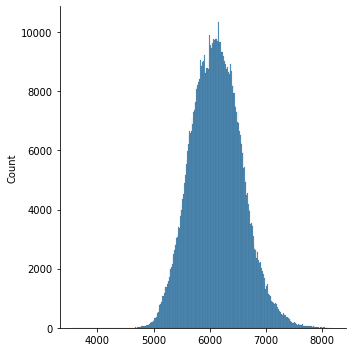

177.89817160406946
Fold 0 end
Fold 1 start
(3485151, 24)
y dist plot


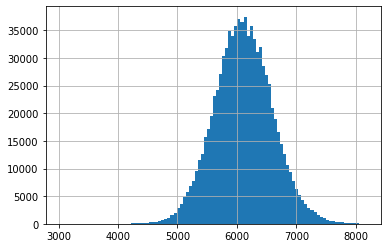

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.408061
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 403.547
[100]	valid_0's rmse: 340.889
[150]	valid_0's rmse: 298.607
[200]	valid_0's rmse: 271.226
[250]	valid_0's rmse: 253.817
[300]	valid_0's rmse: 242.706
[350]	valid_0's rmse: 235.351
[400]	valid_0's rmse: 229.882
[450]	valid_0's rmse: 225.708
[500]	valid_0's rmse: 222.515
[550]	valid_0's rmse: 219.878
[600]	valid_0's rmse: 217.715
[650]	valid_0's rmse: 215.879
[700]	valid_0's rmse: 214.335
[750]	valid_0's rmse: 212.982
[800]	valid_0's rmse: 211.76
[850]	valid_0's rmse: 210.76
[900]	valid_0's rmse: 209.817
[950]	valid_0's rmse: 208.941
[1000]	valid_0's rmse: 208.153
[1050]	valid_0's rmse: 207.465
[1100]	valid_0's rmse: 206.883
[1150]	valid_0's rmse: 206.321
[1200]	valid_0's rmse: 205.822
[1250]	valid_0's rmse: 205.431
[1300]	valid_0's rmse: 205.059
[1350]	valid_0's rmse: 204.621
[1400]	valid_0's rmse: 204.2
[1450]	valid_0's rmse: 203.805
[1500]	

[13100]	valid_0's rmse: 182.168
[13150]	valid_0's rmse: 182.136
[13200]	valid_0's rmse: 182.095
[13250]	valid_0's rmse: 182.062
[13300]	valid_0's rmse: 182.03
[13350]	valid_0's rmse: 182.004
[13400]	valid_0's rmse: 181.973
[13450]	valid_0's rmse: 181.943
[13500]	valid_0's rmse: 181.913
[13550]	valid_0's rmse: 181.884
[13600]	valid_0's rmse: 181.849
[13650]	valid_0's rmse: 181.819
[13700]	valid_0's rmse: 181.786
[13750]	valid_0's rmse: 181.779
[13800]	valid_0's rmse: 181.752
[13850]	valid_0's rmse: 181.731
[13900]	valid_0's rmse: 181.704
[13950]	valid_0's rmse: 181.677
[14000]	valid_0's rmse: 181.649
[14050]	valid_0's rmse: 181.619
[14100]	valid_0's rmse: 181.593
[14150]	valid_0's rmse: 181.565
[14200]	valid_0's rmse: 181.537
[14250]	valid_0's rmse: 181.505
[14300]	valid_0's rmse: 181.474
[14350]	valid_0's rmse: 181.449
[14400]	valid_0's rmse: 181.418
[14450]	valid_0's rmse: 181.394
[14500]	valid_0's rmse: 181.375
[14550]	valid_0's rmse: 181.349
[14600]	valid_0's rmse: 181.323
[14650]	v

<Figure size 432x288 with 0 Axes>

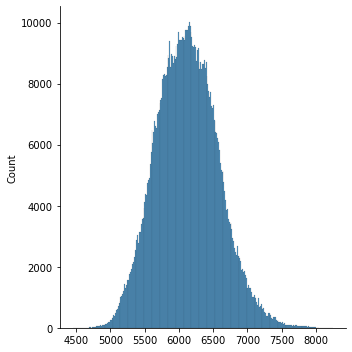

178.7630848512768
Fold 1 end
Fold 2 start
(3485151, 24)
y dist plot


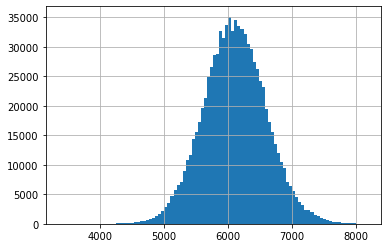

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.213814
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 403.91
[100]	valid_0's rmse: 341.52
[150]	valid_0's rmse: 299.065
[200]	valid_0's rmse: 271.516
[250]	valid_0's rmse: 254.07
[300]	valid_0's rmse: 242.877
[350]	valid_0's rmse: 235.415
[400]	valid_0's rmse: 230.044
[450]	valid_0's rmse: 225.888
[500]	valid_0's rmse: 222.625
[550]	valid_0's rmse: 219.977
[600]	valid_0's rmse: 217.768
[650]	valid_0's rmse: 215.931
[700]	valid_0's rmse: 214.39
[750]	valid_0's rmse: 213.056
[800]	valid_0's rmse: 211.982
[850]	valid_0's rmse: 210.968
[900]	valid_0's rmse: 210.049
[950]	valid_0's rmse: 209.257
[1000]	valid_0's rmse: 208.484
[1050]	valid_0's rmse: 207.8
[1100]	valid_0's rmse: 207.106
[1150]	valid_0's rmse: 206.522
[1200]	valid_0's rmse: 205.984
[1250]	valid_0's rmse: 205.6
[1300]	valid_0's rmse: 205.282
[1350]	valid_0's rmse: 204.804
[1400]	valid_0's rmse: 204.366
[1450]	valid_0's rmse: 203.898
[1500]	vali

[13100]	valid_0's rmse: 182.482
[13150]	valid_0's rmse: 182.449
[13200]	valid_0's rmse: 182.404
[13250]	valid_0's rmse: 182.363
[13300]	valid_0's rmse: 182.328
[13350]	valid_0's rmse: 182.294
[13400]	valid_0's rmse: 182.254
[13450]	valid_0's rmse: 182.226
[13500]	valid_0's rmse: 182.191
[13550]	valid_0's rmse: 182.155
[13600]	valid_0's rmse: 182.124
[13650]	valid_0's rmse: 182.094
[13700]	valid_0's rmse: 182.071
[13750]	valid_0's rmse: 182.047
[13800]	valid_0's rmse: 182.013
[13850]	valid_0's rmse: 181.984
[13900]	valid_0's rmse: 181.952
[13950]	valid_0's rmse: 181.93
[14000]	valid_0's rmse: 181.905
[14050]	valid_0's rmse: 181.882
[14100]	valid_0's rmse: 181.857
[14150]	valid_0's rmse: 181.829
[14200]	valid_0's rmse: 181.806
[14250]	valid_0's rmse: 181.779
[14300]	valid_0's rmse: 181.741
[14350]	valid_0's rmse: 181.706
[14400]	valid_0's rmse: 181.677
[14450]	valid_0's rmse: 181.647
[14500]	valid_0's rmse: 181.631
[14550]	valid_0's rmse: 181.609
[14600]	valid_0's rmse: 181.579
[14650]	v

[25950]	valid_0's rmse: 178.142
[26000]	valid_0's rmse: 178.141
[26050]	valid_0's rmse: 178.138
[26100]	valid_0's rmse: 178.138
[26150]	valid_0's rmse: 178.135
[26200]	valid_0's rmse: 178.122
[26250]	valid_0's rmse: 178.108
[26300]	valid_0's rmse: 178.1
[26350]	valid_0's rmse: 178.087
[26400]	valid_0's rmse: 178.074
[26450]	valid_0's rmse: 178.063
[26500]	valid_0's rmse: 178.054
[26550]	valid_0's rmse: 178.038
[26600]	valid_0's rmse: 178.022
[26650]	valid_0's rmse: 178.007
[26700]	valid_0's rmse: 177.989
[26750]	valid_0's rmse: 177.976
[26800]	valid_0's rmse: 177.962
[26850]	valid_0's rmse: 177.945
[26900]	valid_0's rmse: 177.929
[26950]	valid_0's rmse: 177.916
[27000]	valid_0's rmse: 177.902
[27050]	valid_0's rmse: 177.883
[27100]	valid_0's rmse: 177.867
[27150]	valid_0's rmse: 177.857
[27200]	valid_0's rmse: 177.852
[27250]	valid_0's rmse: 177.839
[27300]	valid_0's rmse: 177.829
[27350]	valid_0's rmse: 177.813
[27400]	valid_0's rmse: 177.801
[27450]	valid_0's rmse: 177.789
[27500]	va

<Figure size 432x288 with 0 Axes>

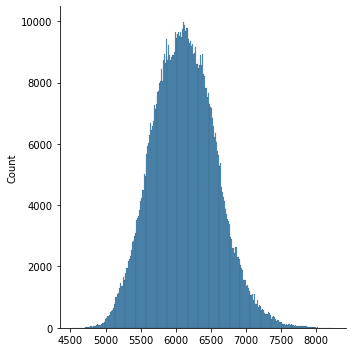

177.03573784662646
Fold 2 end
Fold 3 start
(3485151, 24)
y dist plot


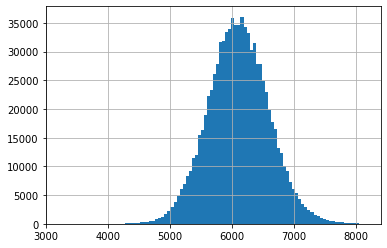

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.119348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.369330
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 403.401
[100]	valid_0's rmse: 340.828
[150]	valid_0's rmse: 298.508
[200]	valid_0's rmse: 271.188
[250]	valid_0's rmse: 253.861
[300]	valid_0's rmse: 242.734
[350]	valid_0's rmse: 235.391
[400]	valid_0's rmse: 229.99
[450]	valid_0's rmse: 225.88
[500]	valid_0's rmse: 222.586
[550]	valid_0's rmse: 219.912
[600]	valid_0's rmse: 217.722
[650]	valid_0's rmse: 215.844
[700]	valid_0's rmse: 214.3
[750]	valid_0's rmse: 212.981
[800]	valid_0's rmse: 211.728
[850]	valid_0's rmse: 210.672
[900]	valid_0's rmse: 209.796
[950]	valid_0's rmse: 209.024
[1000]	valid_0's rmse: 208.342
[1050]	valid_0's rmse: 207.731
[1100]	valid_0's rmse: 207.066
[1150]	valid_0's rmse: 206.401
[1200]	valid_0's rmse: 205.768
[1250]	valid_0's rmse: 205.315
[1300]	valid_0's rmse: 204.855
[1350]	valid_0's rmse: 204.429
[1400]	valid_0's rmse: 204.069
[1450]	valid_0's rmse: 203.685
[1500]	

[13100]	valid_0's rmse: 182.017
[13150]	valid_0's rmse: 182.001
[13200]	valid_0's rmse: 181.976
[13250]	valid_0's rmse: 181.952
[13300]	valid_0's rmse: 181.928
[13350]	valid_0's rmse: 181.897
[13400]	valid_0's rmse: 181.871
[13450]	valid_0's rmse: 181.846
[13500]	valid_0's rmse: 181.814
[13550]	valid_0's rmse: 181.779
[13600]	valid_0's rmse: 181.752
[13650]	valid_0's rmse: 181.72
[13700]	valid_0's rmse: 181.693
[13750]	valid_0's rmse: 181.665
[13800]	valid_0's rmse: 181.632
[13850]	valid_0's rmse: 181.599
[13900]	valid_0's rmse: 181.565
[13950]	valid_0's rmse: 181.538
[14000]	valid_0's rmse: 181.52
[14050]	valid_0's rmse: 181.503
[14100]	valid_0's rmse: 181.482
[14150]	valid_0's rmse: 181.447
[14200]	valid_0's rmse: 181.419
[14250]	valid_0's rmse: 181.396
[14300]	valid_0's rmse: 181.37
[14350]	valid_0's rmse: 181.343
[14400]	valid_0's rmse: 181.329
[14450]	valid_0's rmse: 181.304
[14500]	valid_0's rmse: 181.284
[14550]	valid_0's rmse: 181.262
[14600]	valid_0's rmse: 181.242
[14650]	val

[25950]	valid_0's rmse: 177.88
[26000]	valid_0's rmse: 177.868
[26050]	valid_0's rmse: 177.86
[26100]	valid_0's rmse: 177.854
[26150]	valid_0's rmse: 177.845
[26200]	valid_0's rmse: 177.845
[26250]	valid_0's rmse: 177.844
[26300]	valid_0's rmse: 177.835
[26350]	valid_0's rmse: 177.826
[26400]	valid_0's rmse: 177.823
[26450]	valid_0's rmse: 177.822
[26500]	valid_0's rmse: 177.819
[26550]	valid_0's rmse: 177.819
[26600]	valid_0's rmse: 177.818
[26650]	valid_0's rmse: 177.817
[26700]	valid_0's rmse: 177.817
[26750]	valid_0's rmse: 177.813
[26800]	valid_0's rmse: 177.806
[26850]	valid_0's rmse: 177.799
[26900]	valid_0's rmse: 177.793
[26950]	valid_0's rmse: 177.785
[27000]	valid_0's rmse: 177.78
[27050]	valid_0's rmse: 177.772
[27100]	valid_0's rmse: 177.765
[27150]	valid_0's rmse: 177.759
[27200]	valid_0's rmse: 177.752
[27250]	valid_0's rmse: 177.745
[27300]	valid_0's rmse: 177.734
[27350]	valid_0's rmse: 177.723
[27400]	valid_0's rmse: 177.717
[27450]	valid_0's rmse: 177.713
[27500]	val

<Figure size 432x288 with 0 Axes>

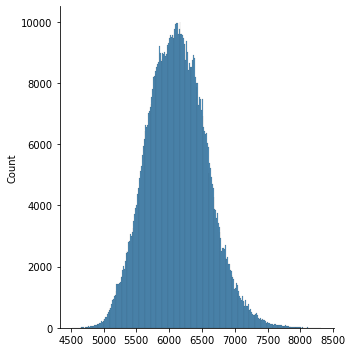

177.53923151040976
Fold 3 end
Fold 4 start
(3485152, 24)
y dist plot


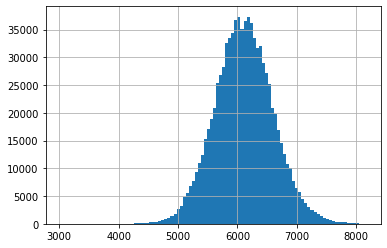

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485152, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.103651
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 403.194
[100]	valid_0's rmse: 340.537
[150]	valid_0's rmse: 298.347
[200]	valid_0's rmse: 270.867
[250]	valid_0's rmse: 253.525
[300]	valid_0's rmse: 242.368
[350]	valid_0's rmse: 234.973
[400]	valid_0's rmse: 229.565
[450]	valid_0's rmse: 225.413
[500]	valid_0's rmse: 222.227
[550]	valid_0's rmse: 219.575
[600]	valid_0's rmse: 217.368
[650]	valid_0's rmse: 215.545
[700]	valid_0's rmse: 213.963
[750]	valid_0's rmse: 212.694
[800]	valid_0's rmse: 211.545
[850]	valid_0's rmse: 210.555
[900]	valid_0's rmse: 209.634
[950]	valid_0's rmse: 208.83
[1000]	valid_0's rmse: 208.066
[1050]	valid_0's rmse: 207.419
[1100]	valid_0's rmse: 206.756
[1150]	valid_0's rmse: 206.207
[1200]	valid_0's rmse: 205.694
[1250]	valid_0's rmse: 205.294
[1300]	valid_0's rmse: 204.909
[1350]	valid_0's rmse: 204.419
[1400]	valid_0's rmse: 203.932
[1450]	valid_0's rmse: 203.562
[150

[13100]	valid_0's rmse: 181.784
[13150]	valid_0's rmse: 181.754
[13200]	valid_0's rmse: 181.727
[13250]	valid_0's rmse: 181.7
[13300]	valid_0's rmse: 181.676
[13350]	valid_0's rmse: 181.65
[13400]	valid_0's rmse: 181.619
[13450]	valid_0's rmse: 181.589
[13500]	valid_0's rmse: 181.559
[13550]	valid_0's rmse: 181.528
[13600]	valid_0's rmse: 181.493
[13650]	valid_0's rmse: 181.462
[13700]	valid_0's rmse: 181.434
[13750]	valid_0's rmse: 181.405
[13800]	valid_0's rmse: 181.375
[13850]	valid_0's rmse: 181.354
[13900]	valid_0's rmse: 181.335
[13950]	valid_0's rmse: 181.305
[14000]	valid_0's rmse: 181.275
[14050]	valid_0's rmse: 181.249
[14100]	valid_0's rmse: 181.224
[14150]	valid_0's rmse: 181.201
[14200]	valid_0's rmse: 181.177
[14250]	valid_0's rmse: 181.149
[14300]	valid_0's rmse: 181.132
[14350]	valid_0's rmse: 181.125
[14400]	valid_0's rmse: 181.11
[14450]	valid_0's rmse: 181.088
[14500]	valid_0's rmse: 181.073
[14550]	valid_0's rmse: 181.058
[14600]	valid_0's rmse: 181.046
[14650]	vali

[26000]	valid_0's rmse: 177.513
[26050]	valid_0's rmse: 177.498
[26100]	valid_0's rmse: 177.488
[26150]	valid_0's rmse: 177.48
[26200]	valid_0's rmse: 177.472
[26250]	valid_0's rmse: 177.464
[26300]	valid_0's rmse: 177.455
[26350]	valid_0's rmse: 177.446
[26400]	valid_0's rmse: 177.435
[26450]	valid_0's rmse: 177.426
[26500]	valid_0's rmse: 177.417
[26550]	valid_0's rmse: 177.408
[26600]	valid_0's rmse: 177.398
[26650]	valid_0's rmse: 177.393
[26700]	valid_0's rmse: 177.393
[26750]	valid_0's rmse: 177.393
[26800]	valid_0's rmse: 177.393
[26850]	valid_0's rmse: 177.393
[26900]	valid_0's rmse: 177.392
[26950]	valid_0's rmse: 177.392
[27000]	valid_0's rmse: 177.392
[27050]	valid_0's rmse: 177.392
[27100]	valid_0's rmse: 177.392
[27150]	valid_0's rmse: 177.392
[27200]	valid_0's rmse: 177.392
[27250]	valid_0's rmse: 177.392
[27300]	valid_0's rmse: 177.39
[27350]	valid_0's rmse: 177.381
[27400]	valid_0's rmse: 177.374
[27450]	valid_0's rmse: 177.366
[27500]	valid_0's rmse: 177.361
[27550]	va

<Figure size 432x288 with 0 Axes>

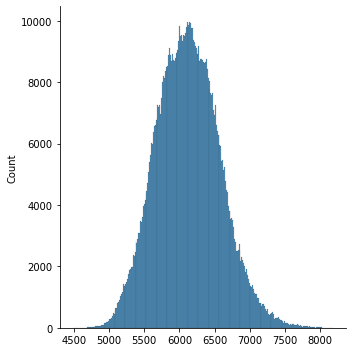

177.360770273214
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [21]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['log_transformed']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['log_transformed']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'huber',
        'alpha': 1.35,
        'learning_rate': 3,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'rmse',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 50000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_subway_huber_log_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

Fold 0 start
(3485151, 24)
y dist plot


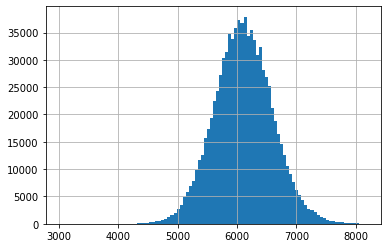

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.488195
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 222.185
[100]	valid_0's rmse: 208.525
[150]	valid_0's rmse: 203.087
[200]	valid_0's rmse: 199.535
[250]	valid_0's rmse: 197.077
[300]	valid_0's rmse: 194.98
[350]	valid_0's rmse: 193.448
[400]	valid_0's rmse: 192.05
[450]	valid_0's rmse: 190.896
[500]	valid_0's rmse: 189.849
[550]	valid_0's rmse: 188.918
[600]	valid_0's rmse: 187.865
[650]	valid_0's rmse: 187.093
[700]	valid_0's rmse: 186.217
[750]	valid_0's rmse: 185.429
[800]	valid_0's rmse: 184.726
[850]	valid_0's rmse: 184.102
[900]	valid_0's rmse: 183.454
[950]	valid_0's rmse: 182.799
[1000]	valid_0's rmse: 182.251
[1050]	valid_0's rmse: 181.768
[1100]	valid_0's rmse: 181.312
[1150]	valid_0's rmse: 180.833
[1200]	valid_0's rmse: 180.327
[1250]	valid_0's rmse: 179.929
[1300]	valid_0's rmse: 179.527
[1350]	valid_0's rmse: 179.17
[1400]	valid_0's rmse: 178.816
[1450]	valid_0's rmse: 178.468
[1500]

[13100]	valid_0's rmse: 160.779
[13150]	valid_0's rmse: 160.763
[13200]	valid_0's rmse: 160.746
[13250]	valid_0's rmse: 160.73
[13300]	valid_0's rmse: 160.715
[13350]	valid_0's rmse: 160.701
[13400]	valid_0's rmse: 160.687
[13450]	valid_0's rmse: 160.673
[13500]	valid_0's rmse: 160.661
[13550]	valid_0's rmse: 160.645
[13600]	valid_0's rmse: 160.625
[13650]	valid_0's rmse: 160.607
[13700]	valid_0's rmse: 160.594
[13750]	valid_0's rmse: 160.581
[13800]	valid_0's rmse: 160.565
[13850]	valid_0's rmse: 160.554
[13900]	valid_0's rmse: 160.538
[13950]	valid_0's rmse: 160.525
[14000]	valid_0's rmse: 160.509
[14050]	valid_0's rmse: 160.491
[14100]	valid_0's rmse: 160.478
[14150]	valid_0's rmse: 160.464
[14200]	valid_0's rmse: 160.453
[14250]	valid_0's rmse: 160.437
[14300]	valid_0's rmse: 160.419
[14350]	valid_0's rmse: 160.403
[14400]	valid_0's rmse: 160.387
[14450]	valid_0's rmse: 160.376
[14500]	valid_0's rmse: 160.358
[14550]	valid_0's rmse: 160.346
[14600]	valid_0's rmse: 160.336
[14650]	v

[25950]	valid_0's rmse: 158.63
[26000]	valid_0's rmse: 158.627
[26050]	valid_0's rmse: 158.624
[26100]	valid_0's rmse: 158.619
[26150]	valid_0's rmse: 158.615
[26200]	valid_0's rmse: 158.614
[26250]	valid_0's rmse: 158.614
[26300]	valid_0's rmse: 158.611
[26350]	valid_0's rmse: 158.607
[26400]	valid_0's rmse: 158.604
[26450]	valid_0's rmse: 158.601
[26500]	valid_0's rmse: 158.596
[26550]	valid_0's rmse: 158.595
[26600]	valid_0's rmse: 158.592
[26650]	valid_0's rmse: 158.589
[26700]	valid_0's rmse: 158.587
[26750]	valid_0's rmse: 158.586
[26800]	valid_0's rmse: 158.581
[26850]	valid_0's rmse: 158.577
[26900]	valid_0's rmse: 158.575
[26950]	valid_0's rmse: 158.574
[27000]	valid_0's rmse: 158.571
[27050]	valid_0's rmse: 158.567
[27100]	valid_0's rmse: 158.564
[27150]	valid_0's rmse: 158.562
[27200]	valid_0's rmse: 158.56
[27250]	valid_0's rmse: 158.555
[27300]	valid_0's rmse: 158.55
[27350]	valid_0's rmse: 158.55
[27400]	valid_0's rmse: 158.548
[27450]	valid_0's rmse: 158.545
[27500]	vali

<Figure size 432x288 with 0 Axes>

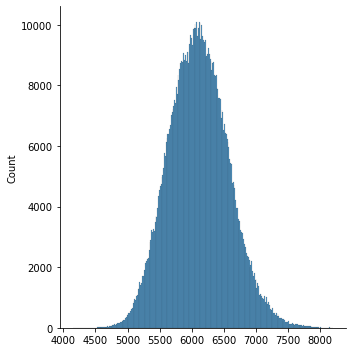

158.36267145847364
Fold 0 end
Fold 1 start
(3485151, 24)
y dist plot


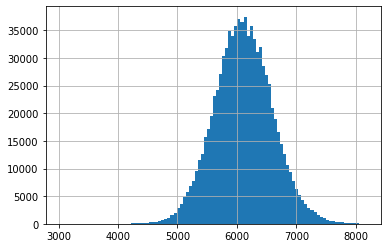

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.408061
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 221.316
[100]	valid_0's rmse: 207.908
[150]	valid_0's rmse: 202.329
[200]	valid_0's rmse: 199.143
[250]	valid_0's rmse: 196.573
[300]	valid_0's rmse: 194.603
[350]	valid_0's rmse: 192.949
[400]	valid_0's rmse: 191.545
[450]	valid_0's rmse: 190.361
[500]	valid_0's rmse: 189.219
[550]	valid_0's rmse: 188.225
[600]	valid_0's rmse: 187.32
[650]	valid_0's rmse: 186.436
[700]	valid_0's rmse: 185.583
[750]	valid_0's rmse: 184.798
[800]	valid_0's rmse: 184.105
[850]	valid_0's rmse: 183.388
[900]	valid_0's rmse: 182.783
[950]	valid_0's rmse: 182.264
[1000]	valid_0's rmse: 181.713
[1050]	valid_0's rmse: 181.194
[1100]	valid_0's rmse: 180.746
[1150]	valid_0's rmse: 180.216
[1200]	valid_0's rmse: 179.829
[1250]	valid_0's rmse: 179.395
[1300]	valid_0's rmse: 178.978
[1350]	valid_0's rmse: 178.566
[1400]	valid_0's rmse: 178.195
[1450]	valid_0's rmse: 177.843
[150

[13100]	valid_0's rmse: 160.821
[13150]	valid_0's rmse: 160.804
[13200]	valid_0's rmse: 160.78
[13250]	valid_0's rmse: 160.763
[13300]	valid_0's rmse: 160.743
[13350]	valid_0's rmse: 160.727
[13400]	valid_0's rmse: 160.708
[13450]	valid_0's rmse: 160.694
[13500]	valid_0's rmse: 160.678
[13550]	valid_0's rmse: 160.66
[13600]	valid_0's rmse: 160.645
[13650]	valid_0's rmse: 160.631
[13700]	valid_0's rmse: 160.616
[13750]	valid_0's rmse: 160.602
[13800]	valid_0's rmse: 160.583
[13850]	valid_0's rmse: 160.568
[13900]	valid_0's rmse: 160.554
[13950]	valid_0's rmse: 160.538
[14000]	valid_0's rmse: 160.524
[14050]	valid_0's rmse: 160.507
[14100]	valid_0's rmse: 160.497
[14150]	valid_0's rmse: 160.484
[14200]	valid_0's rmse: 160.469
[14250]	valid_0's rmse: 160.453
[14300]	valid_0's rmse: 160.443
[14350]	valid_0's rmse: 160.433
[14400]	valid_0's rmse: 160.424
[14450]	valid_0's rmse: 160.408
[14500]	valid_0's rmse: 160.396
[14550]	valid_0's rmse: 160.378
[14600]	valid_0's rmse: 160.361
[14650]	va

[25950]	valid_0's rmse: 158.809
[26000]	valid_0's rmse: 158.807
[26050]	valid_0's rmse: 158.803
[26100]	valid_0's rmse: 158.8
[26150]	valid_0's rmse: 158.798
[26200]	valid_0's rmse: 158.796
[26250]	valid_0's rmse: 158.794
[26300]	valid_0's rmse: 158.791
[26350]	valid_0's rmse: 158.785
[26400]	valid_0's rmse: 158.782
[26450]	valid_0's rmse: 158.78
[26500]	valid_0's rmse: 158.776
[26550]	valid_0's rmse: 158.775
[26600]	valid_0's rmse: 158.769
[26650]	valid_0's rmse: 158.767
[26700]	valid_0's rmse: 158.766
[26750]	valid_0's rmse: 158.763
[26800]	valid_0's rmse: 158.758
[26850]	valid_0's rmse: 158.756
[26900]	valid_0's rmse: 158.756
[26950]	valid_0's rmse: 158.753
[27000]	valid_0's rmse: 158.747
[27050]	valid_0's rmse: 158.746
[27100]	valid_0's rmse: 158.743
[27150]	valid_0's rmse: 158.741
[27200]	valid_0's rmse: 158.739
[27250]	valid_0's rmse: 158.737
[27300]	valid_0's rmse: 158.732
[27350]	valid_0's rmse: 158.731
[27400]	valid_0's rmse: 158.729
[27450]	valid_0's rmse: 158.725
[27500]	val

<Figure size 432x288 with 0 Axes>

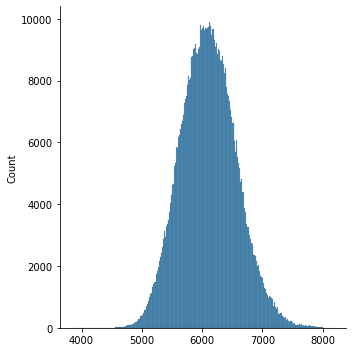

158.68915921198268
Fold 1 end
Fold 2 start
(3485151, 24)
y dist plot


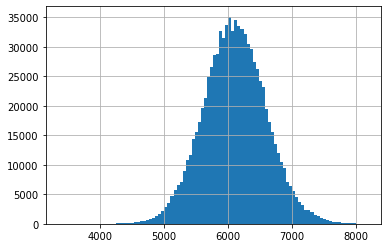

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.213814
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 221.712
[100]	valid_0's rmse: 207.94
[150]	valid_0's rmse: 202.554
[200]	valid_0's rmse: 199.269
[250]	valid_0's rmse: 196.966
[300]	valid_0's rmse: 194.973
[350]	valid_0's rmse: 193.363
[400]	valid_0's rmse: 191.892
[450]	valid_0's rmse: 190.608
[500]	valid_0's rmse: 189.446
[550]	valid_0's rmse: 188.378
[600]	valid_0's rmse: 187.439
[650]	valid_0's rmse: 186.476
[700]	valid_0's rmse: 185.675
[750]	valid_0's rmse: 184.956
[800]	valid_0's rmse: 184.314
[850]	valid_0's rmse: 183.626
[900]	valid_0's rmse: 182.957
[950]	valid_0's rmse: 182.315
[1000]	valid_0's rmse: 181.74
[1050]	valid_0's rmse: 181.233
[1100]	valid_0's rmse: 180.692
[1150]	valid_0's rmse: 180.253
[1200]	valid_0's rmse: 179.793
[1250]	valid_0's rmse: 179.357
[1300]	valid_0's rmse: 178.925
[1350]	valid_0's rmse: 178.514
[1400]	valid_0's rmse: 178.145
[1450]	valid_0's rmse: 177.778
[1500

[13050]	valid_0's rmse: 160.634
[13100]	valid_0's rmse: 160.617
[13150]	valid_0's rmse: 160.599
[13200]	valid_0's rmse: 160.581
[13250]	valid_0's rmse: 160.567
[13300]	valid_0's rmse: 160.551
[13350]	valid_0's rmse: 160.532
[13400]	valid_0's rmse: 160.517
[13450]	valid_0's rmse: 160.503
[13500]	valid_0's rmse: 160.492
[13550]	valid_0's rmse: 160.481
[13600]	valid_0's rmse: 160.472
[13650]	valid_0's rmse: 160.456
[13700]	valid_0's rmse: 160.442
[13750]	valid_0's rmse: 160.43
[13800]	valid_0's rmse: 160.415
[13850]	valid_0's rmse: 160.405
[13900]	valid_0's rmse: 160.391
[13950]	valid_0's rmse: 160.376
[14000]	valid_0's rmse: 160.364
[14050]	valid_0's rmse: 160.351
[14100]	valid_0's rmse: 160.341
[14150]	valid_0's rmse: 160.328
[14200]	valid_0's rmse: 160.314
[14250]	valid_0's rmse: 160.297
[14300]	valid_0's rmse: 160.279
[14350]	valid_0's rmse: 160.265
[14400]	valid_0's rmse: 160.248
[14450]	valid_0's rmse: 160.236
[14500]	valid_0's rmse: 160.222
[14550]	valid_0's rmse: 160.21
[14600]	va

[25900]	valid_0's rmse: 158.652
[25950]	valid_0's rmse: 158.649
[26000]	valid_0's rmse: 158.646
[26050]	valid_0's rmse: 158.643
[26100]	valid_0's rmse: 158.64
[26150]	valid_0's rmse: 158.637
[26200]	valid_0's rmse: 158.636
[26250]	valid_0's rmse: 158.636
[26300]	valid_0's rmse: 158.634
[26350]	valid_0's rmse: 158.629
[26400]	valid_0's rmse: 158.626
[26450]	valid_0's rmse: 158.625
[26500]	valid_0's rmse: 158.622
[26550]	valid_0's rmse: 158.617
[26600]	valid_0's rmse: 158.613
[26650]	valid_0's rmse: 158.611
[26700]	valid_0's rmse: 158.608
[26750]	valid_0's rmse: 158.605
[26800]	valid_0's rmse: 158.602
[26850]	valid_0's rmse: 158.601
[26900]	valid_0's rmse: 158.6
[26950]	valid_0's rmse: 158.597
[27000]	valid_0's rmse: 158.595
[27050]	valid_0's rmse: 158.592
[27100]	valid_0's rmse: 158.588
[27150]	valid_0's rmse: 158.586
[27200]	valid_0's rmse: 158.581
[27250]	valid_0's rmse: 158.578
[27300]	valid_0's rmse: 158.575
[27350]	valid_0's rmse: 158.573
[27400]	valid_0's rmse: 158.571
[27450]	val

<Figure size 432x288 with 0 Axes>

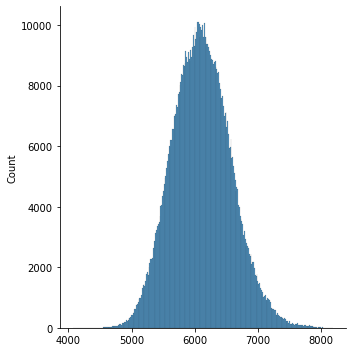

158.48033285285115
Fold 2 end
Fold 3 start
(3485151, 24)
y dist plot


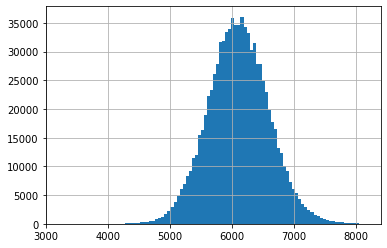

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.369330
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 221.392
[100]	valid_0's rmse: 207.947
[150]	valid_0's rmse: 202.394
[200]	valid_0's rmse: 199.014
[250]	valid_0's rmse: 196.705
[300]	valid_0's rmse: 194.753
[350]	valid_0's rmse: 193.134
[400]	valid_0's rmse: 191.627
[450]	valid_0's rmse: 190.364
[500]	valid_0's rmse: 189.285
[550]	valid_0's rmse: 188.155
[600]	valid_0's rmse: 187.138
[650]	valid_0's rmse: 186.331
[700]	valid_0's rmse: 185.566
[750]	valid_0's rmse: 184.832
[800]	valid_0's rmse: 184.055
[850]	valid_0's rmse: 183.428
[900]	valid_0's rmse: 182.902
[950]	valid_0's rmse: 182.278
[1000]	valid_0's rmse: 181.73
[1050]	valid_0's rmse: 181.085
[1100]	valid_0's rmse: 180.635
[1150]	valid_0's rmse: 180.194
[1200]	valid_0's rmse: 179.641
[1250]	valid_0's rmse: 179.229
[1300]	valid_0's rmse: 178.786
[1350]	valid_0's rmse: 178.396
[1400]	valid_0's rmse: 178.044
[1450]	valid_0's rmse: 177.7
[1500]

[13100]	valid_0's rmse: 160.487
[13150]	valid_0's rmse: 160.469
[13200]	valid_0's rmse: 160.452
[13250]	valid_0's rmse: 160.434
[13300]	valid_0's rmse: 160.417
[13350]	valid_0's rmse: 160.401
[13400]	valid_0's rmse: 160.382
[13450]	valid_0's rmse: 160.362
[13500]	valid_0's rmse: 160.345
[13550]	valid_0's rmse: 160.33
[13600]	valid_0's rmse: 160.316
[13650]	valid_0's rmse: 160.302
[13700]	valid_0's rmse: 160.286
[13750]	valid_0's rmse: 160.271
[13800]	valid_0's rmse: 160.253
[13850]	valid_0's rmse: 160.241
[13900]	valid_0's rmse: 160.227
[13950]	valid_0's rmse: 160.216
[14000]	valid_0's rmse: 160.2
[14050]	valid_0's rmse: 160.186
[14100]	valid_0's rmse: 160.169
[14150]	valid_0's rmse: 160.158
[14200]	valid_0's rmse: 160.142
[14250]	valid_0's rmse: 160.131
[14300]	valid_0's rmse: 160.12
[14350]	valid_0's rmse: 160.108
[14400]	valid_0's rmse: 160.091
[14450]	valid_0's rmse: 160.075
[14500]	valid_0's rmse: 160.063
[14550]	valid_0's rmse: 160.046
[14600]	valid_0's rmse: 160.03
[14650]	valid

[25950]	valid_0's rmse: 158.477
[26000]	valid_0's rmse: 158.472
[26050]	valid_0's rmse: 158.469
[26100]	valid_0's rmse: 158.465
[26150]	valid_0's rmse: 158.461
[26200]	valid_0's rmse: 158.456
[26250]	valid_0's rmse: 158.454
[26300]	valid_0's rmse: 158.453
[26350]	valid_0's rmse: 158.45
[26400]	valid_0's rmse: 158.448
[26450]	valid_0's rmse: 158.446
[26500]	valid_0's rmse: 158.443
[26550]	valid_0's rmse: 158.438
[26600]	valid_0's rmse: 158.434
[26650]	valid_0's rmse: 158.431
[26700]	valid_0's rmse: 158.431
[26750]	valid_0's rmse: 158.429
[26800]	valid_0's rmse: 158.427
[26850]	valid_0's rmse: 158.425
[26900]	valid_0's rmse: 158.423
[26950]	valid_0's rmse: 158.421
[27000]	valid_0's rmse: 158.416
[27050]	valid_0's rmse: 158.411
[27100]	valid_0's rmse: 158.408
[27150]	valid_0's rmse: 158.407
[27200]	valid_0's rmse: 158.407
[27250]	valid_0's rmse: 158.405
[27300]	valid_0's rmse: 158.403
[27350]	valid_0's rmse: 158.401
[27400]	valid_0's rmse: 158.397
[27450]	valid_0's rmse: 158.396
[27500]	v

<Figure size 432x288 with 0 Axes>

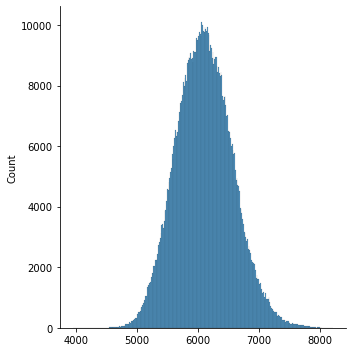

158.35081315478465
Fold 3 end
Fold 4 start
(3485152, 24)
y dist plot


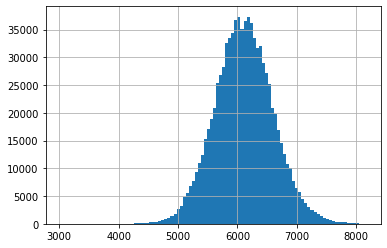

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.133539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485152, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.103651
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 221.012
[100]	valid_0's rmse: 207.481
[150]	valid_0's rmse: 201.982
[200]	valid_0's rmse: 198.981
[250]	valid_0's rmse: 196.336
[300]	valid_0's rmse: 194.413
[350]	valid_0's rmse: 192.799
[400]	valid_0's rmse: 191.385
[450]	valid_0's rmse: 190.137
[500]	valid_0's rmse: 189.072
[550]	valid_0's rmse: 188.015
[600]	valid_0's rmse: 187.085
[650]	valid_0's rmse: 186.18
[700]	valid_0's rmse: 185.383
[750]	valid_0's rmse: 184.679
[800]	valid_0's rmse: 183.986
[850]	valid_0's rmse: 183.367
[900]	valid_0's rmse: 182.761
[950]	valid_0's rmse: 182.134
[1000]	valid_0's rmse: 181.545
[1050]	valid_0's rmse: 180.983
[1100]	valid_0's rmse: 180.48
[1150]	valid_0's rmse: 180.013
[1200]	valid_0's rmse: 179.558
[1250]	valid_0's rmse: 179.139
[1300]	valid_0's rmse: 178.702
[1350]	valid_0's rmse: 178.344
[1400]	valid_0's rmse: 178.007
[1450]	valid_0's rmse: 177.668
[1500

[13100]	valid_0's rmse: 160.483
[13150]	valid_0's rmse: 160.466
[13200]	valid_0's rmse: 160.453
[13250]	valid_0's rmse: 160.439
[13300]	valid_0's rmse: 160.426
[13350]	valid_0's rmse: 160.414
[13400]	valid_0's rmse: 160.398
[13450]	valid_0's rmse: 160.383
[13500]	valid_0's rmse: 160.369
[13550]	valid_0's rmse: 160.356
[13600]	valid_0's rmse: 160.335
[13650]	valid_0's rmse: 160.319
[13700]	valid_0's rmse: 160.305
[13750]	valid_0's rmse: 160.29
[13800]	valid_0's rmse: 160.279
[13850]	valid_0's rmse: 160.272
[13900]	valid_0's rmse: 160.259
[13950]	valid_0's rmse: 160.245
[14000]	valid_0's rmse: 160.229
[14050]	valid_0's rmse: 160.216
[14100]	valid_0's rmse: 160.201
[14150]	valid_0's rmse: 160.187
[14200]	valid_0's rmse: 160.18
[14250]	valid_0's rmse: 160.162
[14300]	valid_0's rmse: 160.148
[14350]	valid_0's rmse: 160.133
[14400]	valid_0's rmse: 160.122
[14450]	valid_0's rmse: 160.11
[14500]	valid_0's rmse: 160.098
[14550]	valid_0's rmse: 160.084
[14600]	valid_0's rmse: 160.073
[14650]	val

[25950]	valid_0's rmse: 158.535
[26000]	valid_0's rmse: 158.532
[26050]	valid_0's rmse: 158.529
[26100]	valid_0's rmse: 158.529
[26150]	valid_0's rmse: 158.526
[26200]	valid_0's rmse: 158.522
[26250]	valid_0's rmse: 158.518
[26300]	valid_0's rmse: 158.515
[26350]	valid_0's rmse: 158.513
[26400]	valid_0's rmse: 158.509
[26450]	valid_0's rmse: 158.507
[26500]	valid_0's rmse: 158.503
[26550]	valid_0's rmse: 158.502
[26600]	valid_0's rmse: 158.499
[26650]	valid_0's rmse: 158.495
[26700]	valid_0's rmse: 158.49
[26750]	valid_0's rmse: 158.489
[26800]	valid_0's rmse: 158.489
[26850]	valid_0's rmse: 158.485
[26900]	valid_0's rmse: 158.481
[26950]	valid_0's rmse: 158.48
[27000]	valid_0's rmse: 158.477
[27050]	valid_0's rmse: 158.473
[27100]	valid_0's rmse: 158.468
[27150]	valid_0's rmse: 158.467
[27200]	valid_0's rmse: 158.464
[27250]	valid_0's rmse: 158.46
[27300]	valid_0's rmse: 158.457
[27350]	valid_0's rmse: 158.454
[27400]	valid_0's rmse: 158.453
[27450]	valid_0's rmse: 158.449
[27500]	val

<Figure size 432x288 with 0 Axes>

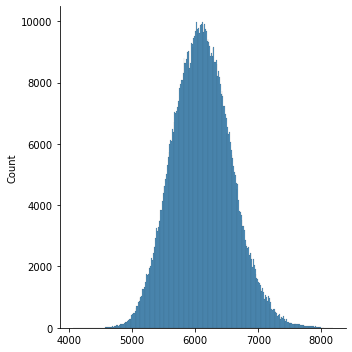

158.30450534069658
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [22]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['log_transformed']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['log_transformed']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'regression',
        #'alpha': 1.35,
        'learning_rate': 0.1,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'rmse',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 500000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_subway_mse_log_lowerlr_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

Fold 0 start
(3485151, 24)
y dist plot


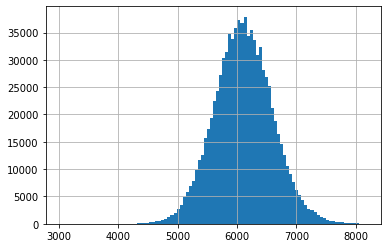

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.119132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.488195
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 459.465
[100]	valid_0's rmse: 430.202
[150]	valid_0's rmse: 404.063
[200]	valid_0's rmse: 380.499
[250]	valid_0's rmse: 359.779
[300]	valid_0's rmse: 341.492
[350]	valid_0's rmse: 325.459
[400]	valid_0's rmse: 311.375
[450]	valid_0's rmse: 299.145
[500]	valid_0's rmse: 288.405
[550]	valid_0's rmse: 279.374
[600]	valid_0's rmse: 271.63
[650]	valid_0's rmse: 264.915
[700]	valid_0's rmse: 259.106
[750]	valid_0's rmse: 254.18
[800]	valid_0's rmse: 249.826
[850]	valid_0's rmse: 246.124
[900]	valid_0's rmse: 242.905
[950]	valid_0's rmse: 240.172
[1000]	valid_0's rmse: 237.751
[1050]	valid_0's rmse: 235.526
[1100]	valid_0's rmse: 233.545
[1150]	valid_0's rmse: 231.757
[1200]	valid_0's rmse: 230.1
[1250]	valid_0's rmse: 228.579
[1300]	valid_0's rmse: 227.214
[1350]	valid_0's rmse: 225.927
[1400]	valid_0's rmse: 224.786
[1450]	valid_0's rmse: 223.788
[1500]	

[13100]	valid_0's rmse: 191.954
[13150]	valid_0's rmse: 191.904
[13200]	valid_0's rmse: 191.868
[13250]	valid_0's rmse: 191.824
[13300]	valid_0's rmse: 191.778
[13350]	valid_0's rmse: 191.731
[13400]	valid_0's rmse: 191.687
[13450]	valid_0's rmse: 191.649
[13500]	valid_0's rmse: 191.615
[13550]	valid_0's rmse: 191.578
[13600]	valid_0's rmse: 191.551
[13650]	valid_0's rmse: 191.531
[13700]	valid_0's rmse: 191.512
[13750]	valid_0's rmse: 191.493
[13800]	valid_0's rmse: 191.475
[13850]	valid_0's rmse: 191.449
[13900]	valid_0's rmse: 191.408
[13950]	valid_0's rmse: 191.355
[14000]	valid_0's rmse: 191.307
[14050]	valid_0's rmse: 191.261
[14100]	valid_0's rmse: 191.218
[14150]	valid_0's rmse: 191.175
[14200]	valid_0's rmse: 191.139
[14250]	valid_0's rmse: 191.094
[14300]	valid_0's rmse: 191.065
[14350]	valid_0's rmse: 191.023
[14400]	valid_0's rmse: 190.99
[14450]	valid_0's rmse: 190.955
[14500]	valid_0's rmse: 190.909
[14550]	valid_0's rmse: 190.878
[14600]	valid_0's rmse: 190.841
[14650]	v

[25950]	valid_0's rmse: 184.359
[26000]	valid_0's rmse: 184.332
[26050]	valid_0's rmse: 184.308
[26100]	valid_0's rmse: 184.287
[26150]	valid_0's rmse: 184.266
[26200]	valid_0's rmse: 184.243
[26250]	valid_0's rmse: 184.223
[26300]	valid_0's rmse: 184.201
[26350]	valid_0's rmse: 184.181
[26400]	valid_0's rmse: 184.163
[26450]	valid_0's rmse: 184.143
[26500]	valid_0's rmse: 184.118
[26550]	valid_0's rmse: 184.096
[26600]	valid_0's rmse: 184.075
[26650]	valid_0's rmse: 184.053
[26700]	valid_0's rmse: 184.031
[26750]	valid_0's rmse: 184.007
[26800]	valid_0's rmse: 183.984
[26850]	valid_0's rmse: 183.96
[26900]	valid_0's rmse: 183.936
[26950]	valid_0's rmse: 183.908
[27000]	valid_0's rmse: 183.885
[27050]	valid_0's rmse: 183.862
[27100]	valid_0's rmse: 183.846
[27150]	valid_0's rmse: 183.825
[27200]	valid_0's rmse: 183.81
[27250]	valid_0's rmse: 183.789
[27300]	valid_0's rmse: 183.77
[27350]	valid_0's rmse: 183.745
[27400]	valid_0's rmse: 183.724
[27450]	valid_0's rmse: 183.706
[27500]	val

[38800]	valid_0's rmse: 180.068
[38850]	valid_0's rmse: 180.056
[38900]	valid_0's rmse: 180.044
[38950]	valid_0's rmse: 180.031
[39000]	valid_0's rmse: 180.018
[39050]	valid_0's rmse: 180.007
[39100]	valid_0's rmse: 179.994
[39150]	valid_0's rmse: 179.981
[39200]	valid_0's rmse: 179.966
[39250]	valid_0's rmse: 179.951
[39300]	valid_0's rmse: 179.936
[39350]	valid_0's rmse: 179.921
[39400]	valid_0's rmse: 179.908
[39450]	valid_0's rmse: 179.895
[39500]	valid_0's rmse: 179.881
[39550]	valid_0's rmse: 179.866
[39600]	valid_0's rmse: 179.85
[39650]	valid_0's rmse: 179.838
[39700]	valid_0's rmse: 179.824
[39750]	valid_0's rmse: 179.812
[39800]	valid_0's rmse: 179.798
[39850]	valid_0's rmse: 179.783
[39900]	valid_0's rmse: 179.771
[39950]	valid_0's rmse: 179.76
[40000]	valid_0's rmse: 179.747
[40050]	valid_0's rmse: 179.737
[40100]	valid_0's rmse: 179.723
[40150]	valid_0's rmse: 179.709
[40200]	valid_0's rmse: 179.695
[40250]	valid_0's rmse: 179.681
[40300]	valid_0's rmse: 179.665
[40350]	va

[51650]	valid_0's rmse: 177.345
[51700]	valid_0's rmse: 177.337
[51750]	valid_0's rmse: 177.327
[51800]	valid_0's rmse: 177.319
[51850]	valid_0's rmse: 177.308
[51900]	valid_0's rmse: 177.299
[51950]	valid_0's rmse: 177.292
[52000]	valid_0's rmse: 177.285
[52050]	valid_0's rmse: 177.276
[52100]	valid_0's rmse: 177.268
[52150]	valid_0's rmse: 177.26
[52200]	valid_0's rmse: 177.252
[52250]	valid_0's rmse: 177.244
[52300]	valid_0's rmse: 177.235
[52350]	valid_0's rmse: 177.225
[52400]	valid_0's rmse: 177.214
[52450]	valid_0's rmse: 177.206
[52500]	valid_0's rmse: 177.196
[52550]	valid_0's rmse: 177.185
[52600]	valid_0's rmse: 177.174
[52650]	valid_0's rmse: 177.164
[52700]	valid_0's rmse: 177.156
[52750]	valid_0's rmse: 177.15
[52800]	valid_0's rmse: 177.14
[52850]	valid_0's rmse: 177.131
[52900]	valid_0's rmse: 177.124
[52950]	valid_0's rmse: 177.114
[53000]	valid_0's rmse: 177.105
[53050]	valid_0's rmse: 177.095
[53100]	valid_0's rmse: 177.085
[53150]	valid_0's rmse: 177.076
[53200]	val

[64550]	valid_0's rmse: 175.368
[64600]	valid_0's rmse: 175.359
[64650]	valid_0's rmse: 175.351
[64700]	valid_0's rmse: 175.343
[64750]	valid_0's rmse: 175.335
[64800]	valid_0's rmse: 175.334
[64850]	valid_0's rmse: 175.328
[64900]	valid_0's rmse: 175.322
[64950]	valid_0's rmse: 175.312
[65000]	valid_0's rmse: 175.305
[65050]	valid_0's rmse: 175.298
[65100]	valid_0's rmse: 175.291
[65150]	valid_0's rmse: 175.283
[65200]	valid_0's rmse: 175.276
[65250]	valid_0's rmse: 175.269
[65300]	valid_0's rmse: 175.263
[65350]	valid_0's rmse: 175.257
[65400]	valid_0's rmse: 175.25
[65450]	valid_0's rmse: 175.242
[65500]	valid_0's rmse: 175.234
[65550]	valid_0's rmse: 175.228
[65600]	valid_0's rmse: 175.222
[65650]	valid_0's rmse: 175.216
[65700]	valid_0's rmse: 175.21
[65750]	valid_0's rmse: 175.202
[65800]	valid_0's rmse: 175.195
[65850]	valid_0's rmse: 175.187
[65900]	valid_0's rmse: 175.18
[65950]	valid_0's rmse: 175.175
[66000]	valid_0's rmse: 175.169
[66050]	valid_0's rmse: 175.163
[66100]	val

[77400]	valid_0's rmse: 173.764
[77450]	valid_0's rmse: 173.759
[77500]	valid_0's rmse: 173.755
[77550]	valid_0's rmse: 173.75
[77600]	valid_0's rmse: 173.744
[77650]	valid_0's rmse: 173.739
[77700]	valid_0's rmse: 173.733
[77750]	valid_0's rmse: 173.728
[77800]	valid_0's rmse: 173.722
[77850]	valid_0's rmse: 173.717
[77900]	valid_0's rmse: 173.711
[77950]	valid_0's rmse: 173.706
[78000]	valid_0's rmse: 173.702
[78050]	valid_0's rmse: 173.697
[78100]	valid_0's rmse: 173.691
[78150]	valid_0's rmse: 173.686
[78200]	valid_0's rmse: 173.681
[78250]	valid_0's rmse: 173.676
[78300]	valid_0's rmse: 173.672
[78350]	valid_0's rmse: 173.666
[78400]	valid_0's rmse: 173.661
[78450]	valid_0's rmse: 173.655
[78500]	valid_0's rmse: 173.649
[78550]	valid_0's rmse: 173.644
[78600]	valid_0's rmse: 173.639
[78650]	valid_0's rmse: 173.634
[78700]	valid_0's rmse: 173.629
[78750]	valid_0's rmse: 173.624
[78800]	valid_0's rmse: 173.619
[78850]	valid_0's rmse: 173.616
[78900]	valid_0's rmse: 173.612
[78950]	v

[90250]	valid_0's rmse: 172.494
[90300]	valid_0's rmse: 172.489
[90350]	valid_0's rmse: 172.484
[90400]	valid_0's rmse: 172.479
[90450]	valid_0's rmse: 172.475
[90500]	valid_0's rmse: 172.47
[90550]	valid_0's rmse: 172.466
[90600]	valid_0's rmse: 172.462
[90650]	valid_0's rmse: 172.458
[90700]	valid_0's rmse: 172.453
[90750]	valid_0's rmse: 172.448
[90800]	valid_0's rmse: 172.444
[90850]	valid_0's rmse: 172.439
[90900]	valid_0's rmse: 172.435
[90950]	valid_0's rmse: 172.43
[91000]	valid_0's rmse: 172.426
[91050]	valid_0's rmse: 172.42
[91100]	valid_0's rmse: 172.413
[91150]	valid_0's rmse: 172.409
[91200]	valid_0's rmse: 172.403
[91250]	valid_0's rmse: 172.398
[91300]	valid_0's rmse: 172.393
[91350]	valid_0's rmse: 172.388
[91400]	valid_0's rmse: 172.384
[91450]	valid_0's rmse: 172.378
[91500]	valid_0's rmse: 172.373
[91550]	valid_0's rmse: 172.369
[91600]	valid_0's rmse: 172.364
[91650]	valid_0's rmse: 172.36
[91700]	valid_0's rmse: 172.354
[91750]	valid_0's rmse: 172.349
[91800]	vali

[103050]	valid_0's rmse: 171.366
[103100]	valid_0's rmse: 171.361
[103150]	valid_0's rmse: 171.357
[103200]	valid_0's rmse: 171.351
[103250]	valid_0's rmse: 171.346
[103300]	valid_0's rmse: 171.342
[103350]	valid_0's rmse: 171.338
[103400]	valid_0's rmse: 171.335
[103450]	valid_0's rmse: 171.332
[103500]	valid_0's rmse: 171.328
[103550]	valid_0's rmse: 171.323
[103600]	valid_0's rmse: 171.319
[103650]	valid_0's rmse: 171.315
[103700]	valid_0's rmse: 171.311
[103750]	valid_0's rmse: 171.307
[103800]	valid_0's rmse: 171.303
[103850]	valid_0's rmse: 171.3
[103900]	valid_0's rmse: 171.298
[103950]	valid_0's rmse: 171.296
[104000]	valid_0's rmse: 171.293
[104050]	valid_0's rmse: 171.291
[104100]	valid_0's rmse: 171.289
[104150]	valid_0's rmse: 171.286
[104200]	valid_0's rmse: 171.283
[104250]	valid_0's rmse: 171.278
[104300]	valid_0's rmse: 171.274
[104350]	valid_0's rmse: 171.27
[104400]	valid_0's rmse: 171.266
[104450]	valid_0's rmse: 171.263
[104500]	valid_0's rmse: 171.26
[104550]	valid

[115550]	valid_0's rmse: 170.459
[115600]	valid_0's rmse: 170.456
[115650]	valid_0's rmse: 170.453
[115700]	valid_0's rmse: 170.45
[115750]	valid_0's rmse: 170.447
[115800]	valid_0's rmse: 170.443
[115850]	valid_0's rmse: 170.441
[115900]	valid_0's rmse: 170.438
[115950]	valid_0's rmse: 170.434
[116000]	valid_0's rmse: 170.431
[116050]	valid_0's rmse: 170.427
[116100]	valid_0's rmse: 170.424
[116150]	valid_0's rmse: 170.421
[116200]	valid_0's rmse: 170.417
[116250]	valid_0's rmse: 170.413
[116300]	valid_0's rmse: 170.409
[116350]	valid_0's rmse: 170.405
[116400]	valid_0's rmse: 170.402
[116450]	valid_0's rmse: 170.399
[116500]	valid_0's rmse: 170.396
[116550]	valid_0's rmse: 170.391
[116600]	valid_0's rmse: 170.388
[116650]	valid_0's rmse: 170.384
[116700]	valid_0's rmse: 170.381
[116750]	valid_0's rmse: 170.377
[116800]	valid_0's rmse: 170.373
[116850]	valid_0's rmse: 170.369
[116900]	valid_0's rmse: 170.365
[116950]	valid_0's rmse: 170.361
[117000]	valid_0's rmse: 170.358
[117050]	va

[128000]	valid_0's rmse: 169.708
[128050]	valid_0's rmse: 169.705
[128100]	valid_0's rmse: 169.703
[128150]	valid_0's rmse: 169.7
[128200]	valid_0's rmse: 169.696
[128250]	valid_0's rmse: 169.693
[128300]	valid_0's rmse: 169.69
[128350]	valid_0's rmse: 169.687
[128400]	valid_0's rmse: 169.684
[128450]	valid_0's rmse: 169.681
[128500]	valid_0's rmse: 169.678
[128550]	valid_0's rmse: 169.674
[128600]	valid_0's rmse: 169.672
[128650]	valid_0's rmse: 169.669
[128700]	valid_0's rmse: 169.665
[128750]	valid_0's rmse: 169.662
[128800]	valid_0's rmse: 169.659
[128850]	valid_0's rmse: 169.657
[128900]	valid_0's rmse: 169.654
[128950]	valid_0's rmse: 169.651
[129000]	valid_0's rmse: 169.648
[129050]	valid_0's rmse: 169.646
[129100]	valid_0's rmse: 169.643
[129150]	valid_0's rmse: 169.64
[129200]	valid_0's rmse: 169.636
[129250]	valid_0's rmse: 169.634
[129300]	valid_0's rmse: 169.631
[129350]	valid_0's rmse: 169.629
[129400]	valid_0's rmse: 169.626
[129450]	valid_0's rmse: 169.623
[129500]	valid

[140500]	valid_0's rmse: 169.031
[140550]	valid_0's rmse: 169.028
[140600]	valid_0's rmse: 169.026
[140650]	valid_0's rmse: 169.024
[140700]	valid_0's rmse: 169.021
[140750]	valid_0's rmse: 169.019
[140800]	valid_0's rmse: 169.017
[140850]	valid_0's rmse: 169.015
[140900]	valid_0's rmse: 169.012
[140950]	valid_0's rmse: 169.01
[141000]	valid_0's rmse: 169.005
[141050]	valid_0's rmse: 169.001
[141100]	valid_0's rmse: 168.998
[141150]	valid_0's rmse: 168.995
[141200]	valid_0's rmse: 168.991
[141250]	valid_0's rmse: 168.989
[141300]	valid_0's rmse: 168.986
[141350]	valid_0's rmse: 168.984
[141400]	valid_0's rmse: 168.981
[141450]	valid_0's rmse: 168.979
[141500]	valid_0's rmse: 168.976
[141550]	valid_0's rmse: 168.974
[141600]	valid_0's rmse: 168.972
[141650]	valid_0's rmse: 168.97
[141700]	valid_0's rmse: 168.967
[141750]	valid_0's rmse: 168.965
[141800]	valid_0's rmse: 168.962
[141850]	valid_0's rmse: 168.959
[141900]	valid_0's rmse: 168.957
[141950]	valid_0's rmse: 168.955
[142000]	val

[153000]	valid_0's rmse: 168.394
[153050]	valid_0's rmse: 168.389
[153100]	valid_0's rmse: 168.386
[153150]	valid_0's rmse: 168.383
[153200]	valid_0's rmse: 168.381
[153250]	valid_0's rmse: 168.379
[153300]	valid_0's rmse: 168.377
[153350]	valid_0's rmse: 168.376
[153400]	valid_0's rmse: 168.374
[153450]	valid_0's rmse: 168.373
[153500]	valid_0's rmse: 168.372
[153550]	valid_0's rmse: 168.372
[153600]	valid_0's rmse: 168.371
[153650]	valid_0's rmse: 168.371
[153700]	valid_0's rmse: 168.37
[153750]	valid_0's rmse: 168.369
[153800]	valid_0's rmse: 168.368
[153850]	valid_0's rmse: 168.366
[153900]	valid_0's rmse: 168.365
[153950]	valid_0's rmse: 168.364
[154000]	valid_0's rmse: 168.363
[154050]	valid_0's rmse: 168.362
[154100]	valid_0's rmse: 168.361
[154150]	valid_0's rmse: 168.36
[154200]	valid_0's rmse: 168.359
[154250]	valid_0's rmse: 168.358
[154300]	valid_0's rmse: 168.357
[154350]	valid_0's rmse: 168.356
[154400]	valid_0's rmse: 168.354
[154450]	valid_0's rmse: 168.351
[154500]	val

[165450]	valid_0's rmse: 167.889
[165500]	valid_0's rmse: 167.887
[165550]	valid_0's rmse: 167.884
[165600]	valid_0's rmse: 167.882
[165650]	valid_0's rmse: 167.881
[165700]	valid_0's rmse: 167.879
[165750]	valid_0's rmse: 167.877
[165800]	valid_0's rmse: 167.876
[165850]	valid_0's rmse: 167.874
[165900]	valid_0's rmse: 167.872
[165950]	valid_0's rmse: 167.869
[166000]	valid_0's rmse: 167.867
[166050]	valid_0's rmse: 167.865
[166100]	valid_0's rmse: 167.863
[166150]	valid_0's rmse: 167.861
[166200]	valid_0's rmse: 167.859
[166250]	valid_0's rmse: 167.857
[166300]	valid_0's rmse: 167.856
[166350]	valid_0's rmse: 167.854
[166400]	valid_0's rmse: 167.851
[166450]	valid_0's rmse: 167.849
[166500]	valid_0's rmse: 167.847
[166550]	valid_0's rmse: 167.844
[166600]	valid_0's rmse: 167.842
[166650]	valid_0's rmse: 167.84
[166700]	valid_0's rmse: 167.839
[166750]	valid_0's rmse: 167.837
[166800]	valid_0's rmse: 167.836
[166850]	valid_0's rmse: 167.834
[166900]	valid_0's rmse: 167.832
[166950]	va

[177950]	valid_0's rmse: 167.42
[178000]	valid_0's rmse: 167.418
[178050]	valid_0's rmse: 167.416
[178100]	valid_0's rmse: 167.415
[178150]	valid_0's rmse: 167.413
[178200]	valid_0's rmse: 167.411
[178250]	valid_0's rmse: 167.41
[178300]	valid_0's rmse: 167.409
[178350]	valid_0's rmse: 167.407
[178400]	valid_0's rmse: 167.405
[178450]	valid_0's rmse: 167.403
[178500]	valid_0's rmse: 167.401
[178550]	valid_0's rmse: 167.399
[178600]	valid_0's rmse: 167.398
[178650]	valid_0's rmse: 167.395
[178700]	valid_0's rmse: 167.394
[178750]	valid_0's rmse: 167.392
[178800]	valid_0's rmse: 167.391
[178850]	valid_0's rmse: 167.389
[178900]	valid_0's rmse: 167.387
[178950]	valid_0's rmse: 167.386
[179000]	valid_0's rmse: 167.384
[179050]	valid_0's rmse: 167.382
[179100]	valid_0's rmse: 167.382
[179150]	valid_0's rmse: 167.382
Early stopping, best iteration is:
[179076]	valid_0's rmse: 167.381
preds dist plot


<Figure size 432x288 with 0 Axes>

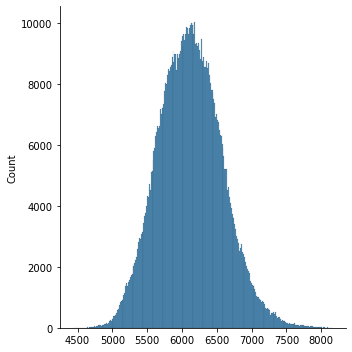

167.3814918069958
Fold 0 end
Fold 1 start
(3485151, 24)
y dist plot


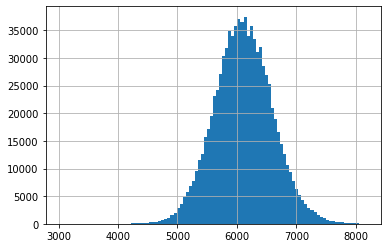

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.408061
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 459.028
[100]	valid_0's rmse: 429.783
[150]	valid_0's rmse: 403.59
[200]	valid_0's rmse: 380.111
[250]	valid_0's rmse: 359.307
[300]	valid_0's rmse: 341.036
[350]	valid_0's rmse: 325.001
[400]	valid_0's rmse: 310.929
[450]	valid_0's rmse: 298.684
[500]	valid_0's rmse: 287.991
[550]	valid_0's rmse: 278.997
[600]	valid_0's rmse: 271.302
[650]	valid_0's rmse: 264.644
[700]	valid_0's rmse: 258.819
[750]	valid_0's rmse: 253.935
[800]	valid_0's rmse: 249.578
[850]	valid_0's rmse: 245.87
[900]	valid_0's rmse: 242.747
[950]	valid_0's rmse: 240.014
[1000]	valid_0's rmse: 237.562
[1050]	valid_0's rmse: 235.298
[1100]	valid_0's rmse: 233.275
[1150]	valid_0's rmse: 231.535
[1200]	valid_0's rmse: 229.925
[1250]	valid_0's rmse: 228.373
[1300]	valid_0's rmse: 226.997
[1350]	valid_0's rmse: 225.722
[1400]	valid_0's rmse: 224.536
[1450]	valid_0's rmse: 223.476
[1500

[13100]	valid_0's rmse: 191.267
[13150]	valid_0's rmse: 191.227
[13200]	valid_0's rmse: 191.182
[13250]	valid_0's rmse: 191.137
[13300]	valid_0's rmse: 191.098
[13350]	valid_0's rmse: 191.061
[13400]	valid_0's rmse: 191.017
[13450]	valid_0's rmse: 190.976
[13500]	valid_0's rmse: 190.947
[13550]	valid_0's rmse: 190.905
[13600]	valid_0's rmse: 190.869
[13650]	valid_0's rmse: 190.816
[13700]	valid_0's rmse: 190.772
[13750]	valid_0's rmse: 190.731
[13800]	valid_0's rmse: 190.692
[13850]	valid_0's rmse: 190.649
[13900]	valid_0's rmse: 190.599
[13950]	valid_0's rmse: 190.551
[14000]	valid_0's rmse: 190.509
[14050]	valid_0's rmse: 190.465
[14100]	valid_0's rmse: 190.42
[14150]	valid_0's rmse: 190.372
[14200]	valid_0's rmse: 190.332
[14250]	valid_0's rmse: 190.292
[14300]	valid_0's rmse: 190.245
[14350]	valid_0's rmse: 190.201
[14400]	valid_0's rmse: 190.156
[14450]	valid_0's rmse: 190.108
[14500]	valid_0's rmse: 190.072
[14550]	valid_0's rmse: 190.028
[14600]	valid_0's rmse: 189.984
[14650]	v

[25950]	valid_0's rmse: 183.812
[26000]	valid_0's rmse: 183.79
[26050]	valid_0's rmse: 183.771
[26100]	valid_0's rmse: 183.752
[26150]	valid_0's rmse: 183.732
[26200]	valid_0's rmse: 183.711
[26250]	valid_0's rmse: 183.692
[26300]	valid_0's rmse: 183.674
[26350]	valid_0's rmse: 183.657
[26400]	valid_0's rmse: 183.637
[26450]	valid_0's rmse: 183.616
[26500]	valid_0's rmse: 183.596
[26550]	valid_0's rmse: 183.575
[26600]	valid_0's rmse: 183.556
[26650]	valid_0's rmse: 183.537
[26700]	valid_0's rmse: 183.518
[26750]	valid_0's rmse: 183.499
[26800]	valid_0's rmse: 183.478
[26850]	valid_0's rmse: 183.461
[26900]	valid_0's rmse: 183.442
[26950]	valid_0's rmse: 183.42
[27000]	valid_0's rmse: 183.401
[27050]	valid_0's rmse: 183.384
[27100]	valid_0's rmse: 183.368
[27150]	valid_0's rmse: 183.348
[27200]	valid_0's rmse: 183.328
[27250]	valid_0's rmse: 183.31
[27300]	valid_0's rmse: 183.293
[27350]	valid_0's rmse: 183.275
[27400]	valid_0's rmse: 183.258
[27450]	valid_0's rmse: 183.241
[27500]	val

[38850]	valid_0's rmse: 179.805
[38900]	valid_0's rmse: 179.794
[38950]	valid_0's rmse: 179.786
[39000]	valid_0's rmse: 179.775
[39050]	valid_0's rmse: 179.761
[39100]	valid_0's rmse: 179.749
[39150]	valid_0's rmse: 179.737
[39200]	valid_0's rmse: 179.725
[39250]	valid_0's rmse: 179.713
[39300]	valid_0's rmse: 179.7
[39350]	valid_0's rmse: 179.688
[39400]	valid_0's rmse: 179.677
[39450]	valid_0's rmse: 179.667
[39500]	valid_0's rmse: 179.654
[39550]	valid_0's rmse: 179.651
[39600]	valid_0's rmse: 179.651
Early stopping, best iteration is:
[39534]	valid_0's rmse: 179.65
preds dist plot


<Figure size 432x288 with 0 Axes>

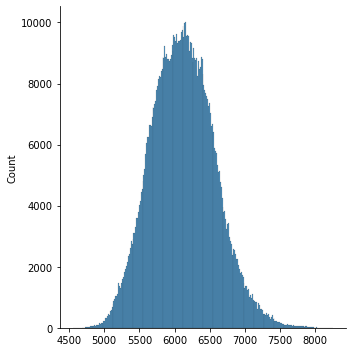

179.6504556296012
Fold 1 end
Fold 2 start
(3485151, 24)
y dist plot


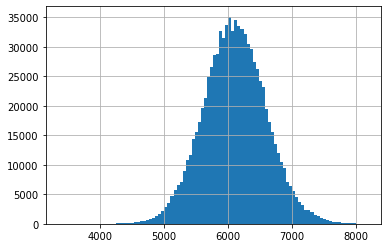

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.213814
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 459.54
[100]	valid_0's rmse: 430.244
[150]	valid_0's rmse: 404.031
[200]	valid_0's rmse: 380.624
[250]	valid_0's rmse: 359.764
[300]	valid_0's rmse: 341.544
[350]	valid_0's rmse: 325.449
[400]	valid_0's rmse: 311.452
[450]	valid_0's rmse: 299.161
[500]	valid_0's rmse: 288.399
[550]	valid_0's rmse: 279.338
[600]	valid_0's rmse: 271.588
[650]	valid_0's rmse: 264.896
[700]	valid_0's rmse: 259.102
[750]	valid_0's rmse: 254.121
[800]	valid_0's rmse: 249.861
[850]	valid_0's rmse: 246.14
[900]	valid_0's rmse: 242.925
[950]	valid_0's rmse: 240.188
[1000]	valid_0's rmse: 237.756
[1050]	valid_0's rmse: 235.493
[1100]	valid_0's rmse: 233.465
[1150]	valid_0's rmse: 231.739
[1200]	valid_0's rmse: 230.07
[1250]	valid_0's rmse: 228.499
[1300]	valid_0's rmse: 227.127
[1350]	valid_0's rmse: 225.894
[1400]	valid_0's rmse: 224.736
[1450]	valid_0's rmse: 223.673
[1500]

[13050]	valid_0's rmse: 191.303
[13100]	valid_0's rmse: 191.247
[13150]	valid_0's rmse: 191.196
[13200]	valid_0's rmse: 191.155
[13250]	valid_0's rmse: 191.107
[13300]	valid_0's rmse: 191.065
[13350]	valid_0's rmse: 191.03
[13400]	valid_0's rmse: 190.987
[13450]	valid_0's rmse: 190.937
[13500]	valid_0's rmse: 190.893
[13550]	valid_0's rmse: 190.853
[13600]	valid_0's rmse: 190.821
[13650]	valid_0's rmse: 190.79
[13700]	valid_0's rmse: 190.753
[13750]	valid_0's rmse: 190.715
[13800]	valid_0's rmse: 190.677
[13850]	valid_0's rmse: 190.643
[13900]	valid_0's rmse: 190.603
[13950]	valid_0's rmse: 190.554
[14000]	valid_0's rmse: 190.497
[14050]	valid_0's rmse: 190.453
[14100]	valid_0's rmse: 190.412
[14150]	valid_0's rmse: 190.374
[14200]	valid_0's rmse: 190.331
[14250]	valid_0's rmse: 190.292
[14300]	valid_0's rmse: 190.26
[14350]	valid_0's rmse: 190.215
[14400]	valid_0's rmse: 190.176
[14450]	valid_0's rmse: 190.138
[14500]	valid_0's rmse: 190.107
[14550]	valid_0's rmse: 190.072
[14600]	val

[25900]	valid_0's rmse: 183.749
[25950]	valid_0's rmse: 183.735
[26000]	valid_0's rmse: 183.719
[26050]	valid_0's rmse: 183.695
[26100]	valid_0's rmse: 183.676
[26150]	valid_0's rmse: 183.659
[26200]	valid_0's rmse: 183.651
[26250]	valid_0's rmse: 183.645
[26300]	valid_0's rmse: 183.636
[26350]	valid_0's rmse: 183.621
[26400]	valid_0's rmse: 183.606
[26450]	valid_0's rmse: 183.592
[26500]	valid_0's rmse: 183.577
[26550]	valid_0's rmse: 183.56
[26600]	valid_0's rmse: 183.534
[26650]	valid_0's rmse: 183.511
[26700]	valid_0's rmse: 183.489
[26750]	valid_0's rmse: 183.472
[26800]	valid_0's rmse: 183.453
[26850]	valid_0's rmse: 183.433
[26900]	valid_0's rmse: 183.411
[26950]	valid_0's rmse: 183.389
[27000]	valid_0's rmse: 183.369
[27050]	valid_0's rmse: 183.351
[27100]	valid_0's rmse: 183.329
[27150]	valid_0's rmse: 183.308
[27200]	valid_0's rmse: 183.289
[27250]	valid_0's rmse: 183.271
[27300]	valid_0's rmse: 183.254
[27350]	valid_0's rmse: 183.237
[27400]	valid_0's rmse: 183.223
[27450]	v

[38750]	valid_0's rmse: 179.953
[38800]	valid_0's rmse: 179.943
[38850]	valid_0's rmse: 179.936
[38900]	valid_0's rmse: 179.93
[38950]	valid_0's rmse: 179.925
[39000]	valid_0's rmse: 179.914
[39050]	valid_0's rmse: 179.905
[39100]	valid_0's rmse: 179.892
[39150]	valid_0's rmse: 179.882
[39200]	valid_0's rmse: 179.869
[39250]	valid_0's rmse: 179.856
[39300]	valid_0's rmse: 179.842
[39350]	valid_0's rmse: 179.825
[39400]	valid_0's rmse: 179.81
[39450]	valid_0's rmse: 179.795
[39500]	valid_0's rmse: 179.777
[39550]	valid_0's rmse: 179.754
[39600]	valid_0's rmse: 179.737
[39650]	valid_0's rmse: 179.724
[39700]	valid_0's rmse: 179.712
[39750]	valid_0's rmse: 179.7
[39800]	valid_0's rmse: 179.686
[39850]	valid_0's rmse: 179.674
[39900]	valid_0's rmse: 179.662
[39950]	valid_0's rmse: 179.652
[40000]	valid_0's rmse: 179.638
[40050]	valid_0's rmse: 179.626
[40100]	valid_0's rmse: 179.614
[40150]	valid_0's rmse: 179.602
[40200]	valid_0's rmse: 179.591
[40250]	valid_0's rmse: 179.579
[40300]	vali

[51650]	valid_0's rmse: 177.241
[51700]	valid_0's rmse: 177.233
[51750]	valid_0's rmse: 177.224
[51800]	valid_0's rmse: 177.214
[51850]	valid_0's rmse: 177.205
[51900]	valid_0's rmse: 177.196
[51950]	valid_0's rmse: 177.188
[52000]	valid_0's rmse: 177.179
[52050]	valid_0's rmse: 177.17
[52100]	valid_0's rmse: 177.159
[52150]	valid_0's rmse: 177.15
[52200]	valid_0's rmse: 177.138
[52250]	valid_0's rmse: 177.126
[52300]	valid_0's rmse: 177.114
[52350]	valid_0's rmse: 177.104
[52400]	valid_0's rmse: 177.094
[52450]	valid_0's rmse: 177.082
[52500]	valid_0's rmse: 177.073
[52550]	valid_0's rmse: 177.064
[52600]	valid_0's rmse: 177.055
[52650]	valid_0's rmse: 177.045
[52700]	valid_0's rmse: 177.037
[52750]	valid_0's rmse: 177.029
[52800]	valid_0's rmse: 177.021
[52850]	valid_0's rmse: 177.013
[52900]	valid_0's rmse: 177.005
[52950]	valid_0's rmse: 176.999
[53000]	valid_0's rmse: 176.991
[53050]	valid_0's rmse: 176.983
[53100]	valid_0's rmse: 176.976
[53150]	valid_0's rmse: 176.969
[53200]	va

[64550]	valid_0's rmse: 175.203
[64600]	valid_0's rmse: 175.198
[64650]	valid_0's rmse: 175.191
[64700]	valid_0's rmse: 175.185
[64750]	valid_0's rmse: 175.178
[64800]	valid_0's rmse: 175.171
[64850]	valid_0's rmse: 175.165
[64900]	valid_0's rmse: 175.159
[64950]	valid_0's rmse: 175.153
[65000]	valid_0's rmse: 175.147
[65050]	valid_0's rmse: 175.14
[65100]	valid_0's rmse: 175.134
[65150]	valid_0's rmse: 175.127
[65200]	valid_0's rmse: 175.119
[65250]	valid_0's rmse: 175.111
[65300]	valid_0's rmse: 175.103
[65350]	valid_0's rmse: 175.096
[65400]	valid_0's rmse: 175.089
[65450]	valid_0's rmse: 175.082
[65500]	valid_0's rmse: 175.075
[65550]	valid_0's rmse: 175.068
[65600]	valid_0's rmse: 175.06
[65650]	valid_0's rmse: 175.054
[65700]	valid_0's rmse: 175.047
[65750]	valid_0's rmse: 175.04
[65800]	valid_0's rmse: 175.034
[65850]	valid_0's rmse: 175.028
[65900]	valid_0's rmse: 175.021
[65950]	valid_0's rmse: 175.013
[66000]	valid_0's rmse: 175.005
[66050]	valid_0's rmse: 174.997
[66100]	val

[77400]	valid_0's rmse: 173.593
[77450]	valid_0's rmse: 173.587
[77500]	valid_0's rmse: 173.582
[77550]	valid_0's rmse: 173.578
[77600]	valid_0's rmse: 173.572
[77650]	valid_0's rmse: 173.568
[77700]	valid_0's rmse: 173.562
[77750]	valid_0's rmse: 173.557
[77800]	valid_0's rmse: 173.552
[77850]	valid_0's rmse: 173.548
[77900]	valid_0's rmse: 173.543
[77950]	valid_0's rmse: 173.538
[78000]	valid_0's rmse: 173.533
[78050]	valid_0's rmse: 173.528
[78100]	valid_0's rmse: 173.523
[78150]	valid_0's rmse: 173.517
[78200]	valid_0's rmse: 173.513
[78250]	valid_0's rmse: 173.506
[78300]	valid_0's rmse: 173.5
[78350]	valid_0's rmse: 173.495
[78400]	valid_0's rmse: 173.49
[78450]	valid_0's rmse: 173.484
[78500]	valid_0's rmse: 173.479
[78550]	valid_0's rmse: 173.472
[78600]	valid_0's rmse: 173.466
[78650]	valid_0's rmse: 173.459
[78700]	valid_0's rmse: 173.452
[78750]	valid_0's rmse: 173.446
[78800]	valid_0's rmse: 173.44
[78850]	valid_0's rmse: 173.434
[78900]	valid_0's rmse: 173.428
[78950]	vali

<Figure size 432x288 with 0 Axes>

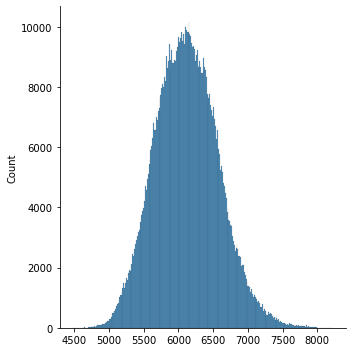

172.7074388074303
Fold 2 end
Fold 3 start
(3485151, 24)
y dist plot


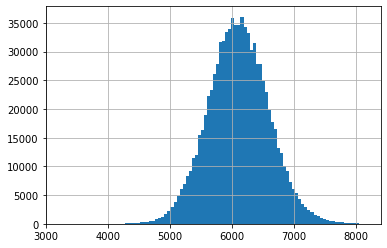

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 3485151, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.369330
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 458.825
[100]	valid_0's rmse: 429.573
[150]	valid_0's rmse: 403.498
[200]	valid_0's rmse: 380.068
[250]	valid_0's rmse: 359.449
[300]	valid_0's rmse: 341.095
[350]	valid_0's rmse: 325.066
[400]	valid_0's rmse: 311.031
[450]	valid_0's rmse: 298.814
[500]	valid_0's rmse: 288.06
[550]	valid_0's rmse: 279.083
[600]	valid_0's rmse: 271.359
[650]	valid_0's rmse: 264.628
[700]	valid_0's rmse: 258.871
[750]	valid_0's rmse: 253.936
[800]	valid_0's rmse: 249.632
[850]	valid_0's rmse: 245.965
[900]	valid_0's rmse: 242.819
[950]	valid_0's rmse: 240.074
[1000]	valid_0's rmse: 237.67
[1050]	valid_0's rmse: 235.466
[1100]	valid_0's rmse: 233.444
[1150]	valid_0's rmse: 231.628
[1200]	valid_0's rmse: 230.008
[1250]	valid_0's rmse: 228.451
[1300]	valid_0's rmse: 227.041
[1350]	valid_0's rmse: 225.788
[1400]	valid_0's rmse: 224.641
[1450]	valid_0's rmse: 223.534
[1500

[13100]	valid_0's rmse: 191.143
[13150]	valid_0's rmse: 191.102
[13200]	valid_0's rmse: 191.061
[13250]	valid_0's rmse: 191.024
[13300]	valid_0's rmse: 190.985
[13350]	valid_0's rmse: 190.942
[13400]	valid_0's rmse: 190.899
[13450]	valid_0's rmse: 190.869
[13500]	valid_0's rmse: 190.836
[13550]	valid_0's rmse: 190.791
[13600]	valid_0's rmse: 190.756
[13650]	valid_0's rmse: 190.723
[13700]	valid_0's rmse: 190.684
[13750]	valid_0's rmse: 190.65
[13800]	valid_0's rmse: 190.611
[13850]	valid_0's rmse: 190.583
[13900]	valid_0's rmse: 190.541
[13950]	valid_0's rmse: 190.496
[14000]	valid_0's rmse: 190.457
[14050]	valid_0's rmse: 190.419
[14100]	valid_0's rmse: 190.39
[14150]	valid_0's rmse: 190.348
[14200]	valid_0's rmse: 190.303
[14250]	valid_0's rmse: 190.259
[14300]	valid_0's rmse: 190.206
[14350]	valid_0's rmse: 190.163
[14400]	valid_0's rmse: 190.123
[14450]	valid_0's rmse: 190.092
[14500]	valid_0's rmse: 190.06
[14550]	valid_0's rmse: 190.021
[14600]	valid_0's rmse: 189.979
[14650]	val

[25950]	valid_0's rmse: 183.788
[26000]	valid_0's rmse: 183.768
[26050]	valid_0's rmse: 183.748
[26100]	valid_0's rmse: 183.725
[26150]	valid_0's rmse: 183.709
[26200]	valid_0's rmse: 183.689
[26250]	valid_0's rmse: 183.667
[26300]	valid_0's rmse: 183.647
[26350]	valid_0's rmse: 183.629
[26400]	valid_0's rmse: 183.606
[26450]	valid_0's rmse: 183.582
[26500]	valid_0's rmse: 183.565
[26550]	valid_0's rmse: 183.545
[26600]	valid_0's rmse: 183.527
[26650]	valid_0's rmse: 183.503
[26700]	valid_0's rmse: 183.484
[26750]	valid_0's rmse: 183.461
[26800]	valid_0's rmse: 183.44
[26850]	valid_0's rmse: 183.417
[26900]	valid_0's rmse: 183.395
[26950]	valid_0's rmse: 183.378
[27000]	valid_0's rmse: 183.35
[27050]	valid_0's rmse: 183.336
[27100]	valid_0's rmse: 183.319
[27150]	valid_0's rmse: 183.303
[27200]	valid_0's rmse: 183.286
[27250]	valid_0's rmse: 183.269
[27300]	valid_0's rmse: 183.248
[27350]	valid_0's rmse: 183.226
[27400]	valid_0's rmse: 183.206
[27450]	valid_0's rmse: 183.187
[27500]	va

[38800]	valid_0's rmse: 179.766
[38850]	valid_0's rmse: 179.752
[38900]	valid_0's rmse: 179.74
[38950]	valid_0's rmse: 179.726
[39000]	valid_0's rmse: 179.714
[39050]	valid_0's rmse: 179.698
[39100]	valid_0's rmse: 179.683
[39150]	valid_0's rmse: 179.669
[39200]	valid_0's rmse: 179.657
[39250]	valid_0's rmse: 179.643
[39300]	valid_0's rmse: 179.629
[39350]	valid_0's rmse: 179.612
[39400]	valid_0's rmse: 179.598
[39450]	valid_0's rmse: 179.583
[39500]	valid_0's rmse: 179.568
[39550]	valid_0's rmse: 179.555
[39600]	valid_0's rmse: 179.539
[39650]	valid_0's rmse: 179.524
[39700]	valid_0's rmse: 179.51
[39750]	valid_0's rmse: 179.503
[39800]	valid_0's rmse: 179.491
[39850]	valid_0's rmse: 179.478
[39900]	valid_0's rmse: 179.461
[39950]	valid_0's rmse: 179.449
[40000]	valid_0's rmse: 179.433
[40050]	valid_0's rmse: 179.416
[40100]	valid_0's rmse: 179.404
[40150]	valid_0's rmse: 179.392
[40200]	valid_0's rmse: 179.381
[40250]	valid_0's rmse: 179.366
[40300]	valid_0's rmse: 179.355
[40350]	va

[51700]	valid_0's rmse: 176.977
[51750]	valid_0's rmse: 176.967
[51800]	valid_0's rmse: 176.957
[51850]	valid_0's rmse: 176.95
[51900]	valid_0's rmse: 176.942
[51950]	valid_0's rmse: 176.934
[52000]	valid_0's rmse: 176.926
[52050]	valid_0's rmse: 176.918
[52100]	valid_0's rmse: 176.911
[52150]	valid_0's rmse: 176.905
[52200]	valid_0's rmse: 176.896
[52250]	valid_0's rmse: 176.887
[52300]	valid_0's rmse: 176.877
[52350]	valid_0's rmse: 176.868
[52400]	valid_0's rmse: 176.857
[52450]	valid_0's rmse: 176.847
[52500]	valid_0's rmse: 176.838
[52550]	valid_0's rmse: 176.828
[52600]	valid_0's rmse: 176.821
[52650]	valid_0's rmse: 176.813
[52700]	valid_0's rmse: 176.802
[52750]	valid_0's rmse: 176.791
[52800]	valid_0's rmse: 176.781
[52850]	valid_0's rmse: 176.771
[52900]	valid_0's rmse: 176.763
[52950]	valid_0's rmse: 176.754
[53000]	valid_0's rmse: 176.746
[53050]	valid_0's rmse: 176.738
[53100]	valid_0's rmse: 176.729
[53150]	valid_0's rmse: 176.72
[53200]	valid_0's rmse: 176.711
[53250]	va

[64550]	valid_0's rmse: 174.896
[64600]	valid_0's rmse: 174.889
[64650]	valid_0's rmse: 174.883
[64700]	valid_0's rmse: 174.876
[64750]	valid_0's rmse: 174.868
[64800]	valid_0's rmse: 174.861
[64850]	valid_0's rmse: 174.854
[64900]	valid_0's rmse: 174.848
[64950]	valid_0's rmse: 174.841
[65000]	valid_0's rmse: 174.834
[65050]	valid_0's rmse: 174.827
[65100]	valid_0's rmse: 174.82
[65150]	valid_0's rmse: 174.814
[65200]	valid_0's rmse: 174.808
[65250]	valid_0's rmse: 174.801
[65300]	valid_0's rmse: 174.794
[65350]	valid_0's rmse: 174.788
[65400]	valid_0's rmse: 174.781
[65450]	valid_0's rmse: 174.774
[65500]	valid_0's rmse: 174.767
[65550]	valid_0's rmse: 174.76
[65600]	valid_0's rmse: 174.753
[65650]	valid_0's rmse: 174.746
[65700]	valid_0's rmse: 174.739
[65750]	valid_0's rmse: 174.733
[65800]	valid_0's rmse: 174.726
[65850]	valid_0's rmse: 174.719
[65900]	valid_0's rmse: 174.712
[65950]	valid_0's rmse: 174.705
[66000]	valid_0's rmse: 174.698
[66050]	valid_0's rmse: 174.692
[66100]	va

[77400]	valid_0's rmse: 173.273
[77450]	valid_0's rmse: 173.267
[77500]	valid_0's rmse: 173.262
[77550]	valid_0's rmse: 173.256
[77600]	valid_0's rmse: 173.25
[77650]	valid_0's rmse: 173.244
[77700]	valid_0's rmse: 173.238
[77750]	valid_0's rmse: 173.232
[77800]	valid_0's rmse: 173.227
[77850]	valid_0's rmse: 173.221
[77900]	valid_0's rmse: 173.213
[77950]	valid_0's rmse: 173.202
[78000]	valid_0's rmse: 173.197
[78050]	valid_0's rmse: 173.192
[78100]	valid_0's rmse: 173.187
[78150]	valid_0's rmse: 173.181
[78200]	valid_0's rmse: 173.176
[78250]	valid_0's rmse: 173.169
[78300]	valid_0's rmse: 173.164
[78350]	valid_0's rmse: 173.16
[78400]	valid_0's rmse: 173.154
[78450]	valid_0's rmse: 173.147
[78500]	valid_0's rmse: 173.141
[78550]	valid_0's rmse: 173.134
[78600]	valid_0's rmse: 173.129
[78650]	valid_0's rmse: 173.123
[78700]	valid_0's rmse: 173.117
[78750]	valid_0's rmse: 173.111
[78800]	valid_0's rmse: 173.105
[78850]	valid_0's rmse: 173.1
[78900]	valid_0's rmse: 173.094
[78950]	vali

[90300]	valid_0's rmse: 171.938
[90350]	valid_0's rmse: 171.932
[90400]	valid_0's rmse: 171.928
[90450]	valid_0's rmse: 171.924
[90500]	valid_0's rmse: 171.92
[90550]	valid_0's rmse: 171.916
[90600]	valid_0's rmse: 171.912
[90650]	valid_0's rmse: 171.907
[90700]	valid_0's rmse: 171.902
[90750]	valid_0's rmse: 171.897
[90800]	valid_0's rmse: 171.892
[90850]	valid_0's rmse: 171.886
[90900]	valid_0's rmse: 171.881
[90950]	valid_0's rmse: 171.876
[91000]	valid_0's rmse: 171.872
[91050]	valid_0's rmse: 171.868
[91100]	valid_0's rmse: 171.864
[91150]	valid_0's rmse: 171.859
[91200]	valid_0's rmse: 171.854
[91250]	valid_0's rmse: 171.85
[91300]	valid_0's rmse: 171.845
[91350]	valid_0's rmse: 171.84
[91400]	valid_0's rmse: 171.835
[91450]	valid_0's rmse: 171.832
[91500]	valid_0's rmse: 171.826
[91550]	valid_0's rmse: 171.822
[91600]	valid_0's rmse: 171.817
[91650]	valid_0's rmse: 171.811
[91700]	valid_0's rmse: 171.807
[91750]	valid_0's rmse: 171.801
[91800]	valid_0's rmse: 171.796
[91850]	val

[103050]	valid_0's rmse: 170.841
[103100]	valid_0's rmse: 170.837
[103150]	valid_0's rmse: 170.832
[103200]	valid_0's rmse: 170.829
[103250]	valid_0's rmse: 170.825
[103300]	valid_0's rmse: 170.821
[103350]	valid_0's rmse: 170.817
[103400]	valid_0's rmse: 170.814
[103450]	valid_0's rmse: 170.811
[103500]	valid_0's rmse: 170.807
[103550]	valid_0's rmse: 170.802
[103600]	valid_0's rmse: 170.798
[103650]	valid_0's rmse: 170.794
[103700]	valid_0's rmse: 170.789
[103750]	valid_0's rmse: 170.785
[103800]	valid_0's rmse: 170.781
[103850]	valid_0's rmse: 170.777
[103900]	valid_0's rmse: 170.775
[103950]	valid_0's rmse: 170.773
[104000]	valid_0's rmse: 170.772
[104050]	valid_0's rmse: 170.771
[104100]	valid_0's rmse: 170.77
[104150]	valid_0's rmse: 170.769
[104200]	valid_0's rmse: 170.767
[104250]	valid_0's rmse: 170.762
[104300]	valid_0's rmse: 170.76
[104350]	valid_0's rmse: 170.756
[104400]	valid_0's rmse: 170.753
[104450]	valid_0's rmse: 170.749
[104500]	valid_0's rmse: 170.745
[104550]	val

[115550]	valid_0's rmse: 169.986
[115600]	valid_0's rmse: 169.981
[115650]	valid_0's rmse: 169.978
[115700]	valid_0's rmse: 169.975
[115750]	valid_0's rmse: 169.972
[115800]	valid_0's rmse: 169.969
[115850]	valid_0's rmse: 169.967
[115900]	valid_0's rmse: 169.964
[115950]	valid_0's rmse: 169.961
[116000]	valid_0's rmse: 169.958
[116050]	valid_0's rmse: 169.955
[116100]	valid_0's rmse: 169.951
[116150]	valid_0's rmse: 169.948
[116200]	valid_0's rmse: 169.944
[116250]	valid_0's rmse: 169.941
[116300]	valid_0's rmse: 169.938
[116350]	valid_0's rmse: 169.936
[116400]	valid_0's rmse: 169.933
[116450]	valid_0's rmse: 169.93
[116500]	valid_0's rmse: 169.927
[116550]	valid_0's rmse: 169.923
[116600]	valid_0's rmse: 169.919
[116650]	valid_0's rmse: 169.915
[116700]	valid_0's rmse: 169.911
[116750]	valid_0's rmse: 169.907
[116800]	valid_0's rmse: 169.904
[116850]	valid_0's rmse: 169.901
[116900]	valid_0's rmse: 169.897
[116950]	valid_0's rmse: 169.893
[117000]	valid_0's rmse: 169.89
[117050]	val

<Figure size 432x288 with 0 Axes>

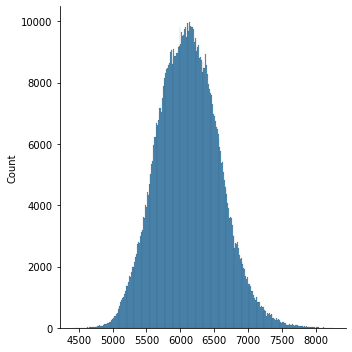

169.35904327042044
Fold 3 end
Fold 4 start
(3485152, 24)
y dist plot


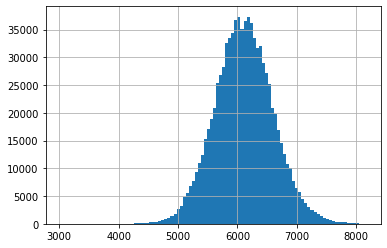

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 3485152, number of used features: 24


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 6108.103651
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 458.677
[100]	valid_0's rmse: 429.448
[150]	valid_0's rmse: 403.282
[200]	valid_0's rmse: 379.751
[250]	valid_0's rmse: 358.893
[300]	valid_0's rmse: 340.667
[350]	valid_0's rmse: 324.653
[400]	valid_0's rmse: 310.612
[450]	valid_0's rmse: 298.392
[500]	valid_0's rmse: 287.746
[550]	valid_0's rmse: 278.712
[600]	valid_0's rmse: 271.016
[650]	valid_0's rmse: 264.304
[700]	valid_0's rmse: 258.545
[750]	valid_0's rmse: 253.619
[800]	valid_0's rmse: 249.358
[850]	valid_0's rmse: 245.615
[900]	valid_0's rmse: 242.469
[950]	valid_0's rmse: 239.736
[1000]	valid_0's rmse: 237.326
[1050]	valid_0's rmse: 235.09
[1100]	valid_0's rmse: 233.08
[1150]	valid_0's rmse: 231.268
[1200]	valid_0's rmse: 229.619
[1250]	valid_0's rmse: 228.107
[1300]	valid_0's rmse: 226.723
[1350]	valid_0's rmse: 225.455
[1400]	valid_0's rmse: 224.344
[1450]	valid_0's rmse: 223.301
[1500

[13100]	valid_0's rmse: 191.282
[13150]	valid_0's rmse: 191.243
[13200]	valid_0's rmse: 191.202
[13250]	valid_0's rmse: 191.159
[13300]	valid_0's rmse: 191.116
[13350]	valid_0's rmse: 191.074
[13400]	valid_0's rmse: 191.049
[13450]	valid_0's rmse: 191.006
[13500]	valid_0's rmse: 190.97
[13550]	valid_0's rmse: 190.935
[13600]	valid_0's rmse: 190.898
[13650]	valid_0's rmse: 190.855
[13700]	valid_0's rmse: 190.814
[13750]	valid_0's rmse: 190.767
[13800]	valid_0's rmse: 190.725
[13850]	valid_0's rmse: 190.686
[13900]	valid_0's rmse: 190.63
[13950]	valid_0's rmse: 190.578
[14000]	valid_0's rmse: 190.536
[14050]	valid_0's rmse: 190.491
[14100]	valid_0's rmse: 190.447
[14150]	valid_0's rmse: 190.409
[14200]	valid_0's rmse: 190.368
[14250]	valid_0's rmse: 190.321
[14300]	valid_0's rmse: 190.282
[14350]	valid_0's rmse: 190.237
[14400]	valid_0's rmse: 190.194
[14450]	valid_0's rmse: 190.154
[14500]	valid_0's rmse: 190.116
[14550]	valid_0's rmse: 190.08
[14600]	valid_0's rmse: 190.038
[14650]	val

[26000]	valid_0's rmse: 183.654
[26050]	valid_0's rmse: 183.647
[26100]	valid_0's rmse: 183.64
[26150]	valid_0's rmse: 183.628
[26200]	valid_0's rmse: 183.615
[26250]	valid_0's rmse: 183.602
[26300]	valid_0's rmse: 183.588
[26350]	valid_0's rmse: 183.573
[26400]	valid_0's rmse: 183.555
[26450]	valid_0's rmse: 183.54
[26500]	valid_0's rmse: 183.523
[26550]	valid_0's rmse: 183.511
[26600]	valid_0's rmse: 183.506
[26650]	valid_0's rmse: 183.502
[26700]	valid_0's rmse: 183.495
[26750]	valid_0's rmse: 183.473
[26800]	valid_0's rmse: 183.455
[26850]	valid_0's rmse: 183.444
[26900]	valid_0's rmse: 183.425
[26950]	valid_0's rmse: 183.408
[27000]	valid_0's rmse: 183.39
[27050]	valid_0's rmse: 183.372
[27100]	valid_0's rmse: 183.354
[27150]	valid_0's rmse: 183.335
[27200]	valid_0's rmse: 183.313
[27250]	valid_0's rmse: 183.294
[27300]	valid_0's rmse: 183.273
[27350]	valid_0's rmse: 183.25
[27400]	valid_0's rmse: 183.229
[27450]	valid_0's rmse: 183.208
[27500]	valid_0's rmse: 183.187
[27550]	vali

[38900]	valid_0's rmse: 179.606
[38950]	valid_0's rmse: 179.593
[39000]	valid_0's rmse: 179.582
[39050]	valid_0's rmse: 179.569
[39100]	valid_0's rmse: 179.551
[39150]	valid_0's rmse: 179.536
[39200]	valid_0's rmse: 179.515
[39250]	valid_0's rmse: 179.495
[39300]	valid_0's rmse: 179.482
[39350]	valid_0's rmse: 179.469
[39400]	valid_0's rmse: 179.454
[39450]	valid_0's rmse: 179.446
[39500]	valid_0's rmse: 179.443
[39550]	valid_0's rmse: 179.439
[39600]	valid_0's rmse: 179.436
[39650]	valid_0's rmse: 179.432
[39700]	valid_0's rmse: 179.43
[39750]	valid_0's rmse: 179.42
[39800]	valid_0's rmse: 179.41
[39850]	valid_0's rmse: 179.399
[39900]	valid_0's rmse: 179.387
[39950]	valid_0's rmse: 179.374
[40000]	valid_0's rmse: 179.363
[40050]	valid_0's rmse: 179.353
[40100]	valid_0's rmse: 179.341
[40150]	valid_0's rmse: 179.33
[40200]	valid_0's rmse: 179.317
[40250]	valid_0's rmse: 179.308
[40300]	valid_0's rmse: 179.296
[40350]	valid_0's rmse: 179.287
[40400]	valid_0's rmse: 179.276
[40450]	vali

[51750]	valid_0's rmse: 176.871
[51800]	valid_0's rmse: 176.861
[51850]	valid_0's rmse: 176.852
[51900]	valid_0's rmse: 176.844
[51950]	valid_0's rmse: 176.837
[52000]	valid_0's rmse: 176.828
[52050]	valid_0's rmse: 176.818
[52100]	valid_0's rmse: 176.808
[52150]	valid_0's rmse: 176.797
[52200]	valid_0's rmse: 176.79
[52250]	valid_0's rmse: 176.782
[52300]	valid_0's rmse: 176.775
[52350]	valid_0's rmse: 176.767
[52400]	valid_0's rmse: 176.758
[52450]	valid_0's rmse: 176.748
[52500]	valid_0's rmse: 176.739
[52550]	valid_0's rmse: 176.733
[52600]	valid_0's rmse: 176.724
[52650]	valid_0's rmse: 176.717
[52700]	valid_0's rmse: 176.71
[52750]	valid_0's rmse: 176.699
[52800]	valid_0's rmse: 176.69
[52850]	valid_0's rmse: 176.68
[52900]	valid_0's rmse: 176.673
[52950]	valid_0's rmse: 176.665
[53000]	valid_0's rmse: 176.657
[53050]	valid_0's rmse: 176.65
[53100]	valid_0's rmse: 176.642
[53150]	valid_0's rmse: 176.633
[53200]	valid_0's rmse: 176.626
[53250]	valid_0's rmse: 176.618
[53300]	valid

[64600]	valid_0's rmse: 174.842
[64650]	valid_0's rmse: 174.832
[64700]	valid_0's rmse: 174.824
[64750]	valid_0's rmse: 174.814
[64800]	valid_0's rmse: 174.806
[64850]	valid_0's rmse: 174.799
[64900]	valid_0's rmse: 174.791
[64950]	valid_0's rmse: 174.784
[65000]	valid_0's rmse: 174.777
[65050]	valid_0's rmse: 174.77
[65100]	valid_0's rmse: 174.763
[65150]	valid_0's rmse: 174.755
[65200]	valid_0's rmse: 174.749
[65250]	valid_0's rmse: 174.743
[65300]	valid_0's rmse: 174.738
[65350]	valid_0's rmse: 174.731
[65400]	valid_0's rmse: 174.724
[65450]	valid_0's rmse: 174.717
[65500]	valid_0's rmse: 174.707
[65550]	valid_0's rmse: 174.699
[65600]	valid_0's rmse: 174.688
[65650]	valid_0's rmse: 174.682
[65700]	valid_0's rmse: 174.675
[65750]	valid_0's rmse: 174.668
[65800]	valid_0's rmse: 174.661
[65850]	valid_0's rmse: 174.653
[65900]	valid_0's rmse: 174.646
[65950]	valid_0's rmse: 174.64
[66000]	valid_0's rmse: 174.633
[66050]	valid_0's rmse: 174.625
[66100]	valid_0's rmse: 174.618
[66150]	va

[77500]	valid_0's rmse: 173.241
[77550]	valid_0's rmse: 173.235
[77600]	valid_0's rmse: 173.229
[77650]	valid_0's rmse: 173.224
[77700]	valid_0's rmse: 173.218
[77750]	valid_0's rmse: 173.213
[77800]	valid_0's rmse: 173.206
[77850]	valid_0's rmse: 173.199
[77900]	valid_0's rmse: 173.194
[77950]	valid_0's rmse: 173.187
[78000]	valid_0's rmse: 173.182
[78050]	valid_0's rmse: 173.177
[78100]	valid_0's rmse: 173.171
[78150]	valid_0's rmse: 173.165
[78200]	valid_0's rmse: 173.16
[78250]	valid_0's rmse: 173.154
[78300]	valid_0's rmse: 173.149
[78350]	valid_0's rmse: 173.144
[78400]	valid_0's rmse: 173.139
[78450]	valid_0's rmse: 173.134
[78500]	valid_0's rmse: 173.129
[78550]	valid_0's rmse: 173.123
[78600]	valid_0's rmse: 173.118
[78650]	valid_0's rmse: 173.112
[78700]	valid_0's rmse: 173.106
[78750]	valid_0's rmse: 173.099
[78800]	valid_0's rmse: 173.093
[78850]	valid_0's rmse: 173.09
[78900]	valid_0's rmse: 173.085
[78950]	valid_0's rmse: 173.079
[79000]	valid_0's rmse: 173.072
[79050]	va

[90350]	valid_0's rmse: 171.946
[90400]	valid_0's rmse: 171.943
[90450]	valid_0's rmse: 171.939
[90500]	valid_0's rmse: 171.934
[90550]	valid_0's rmse: 171.929
[90600]	valid_0's rmse: 171.926
[90650]	valid_0's rmse: 171.922
[90700]	valid_0's rmse: 171.917
[90750]	valid_0's rmse: 171.912
[90800]	valid_0's rmse: 171.908
[90850]	valid_0's rmse: 171.903
[90900]	valid_0's rmse: 171.898
[90950]	valid_0's rmse: 171.892
[91000]	valid_0's rmse: 171.887
[91050]	valid_0's rmse: 171.884
[91100]	valid_0's rmse: 171.88
[91150]	valid_0's rmse: 171.875
[91200]	valid_0's rmse: 171.871
[91250]	valid_0's rmse: 171.867
[91300]	valid_0's rmse: 171.863
[91350]	valid_0's rmse: 171.858
[91400]	valid_0's rmse: 171.853
[91450]	valid_0's rmse: 171.848
[91500]	valid_0's rmse: 171.845
[91550]	valid_0's rmse: 171.841
[91600]	valid_0's rmse: 171.838
[91650]	valid_0's rmse: 171.836
[91700]	valid_0's rmse: 171.832
[91750]	valid_0's rmse: 171.828
[91800]	valid_0's rmse: 171.822
[91850]	valid_0's rmse: 171.818
[91900]	v

[103100]	valid_0's rmse: 170.8
[103150]	valid_0's rmse: 170.795
[103200]	valid_0's rmse: 170.792
[103250]	valid_0's rmse: 170.788
[103300]	valid_0's rmse: 170.785
[103350]	valid_0's rmse: 170.781
[103400]	valid_0's rmse: 170.777
[103450]	valid_0's rmse: 170.772
[103500]	valid_0's rmse: 170.768
[103550]	valid_0's rmse: 170.765
[103600]	valid_0's rmse: 170.761
[103650]	valid_0's rmse: 170.758
[103700]	valid_0's rmse: 170.754
[103750]	valid_0's rmse: 170.751
[103800]	valid_0's rmse: 170.747
[103850]	valid_0's rmse: 170.743
[103900]	valid_0's rmse: 170.739
[103950]	valid_0's rmse: 170.736
[104000]	valid_0's rmse: 170.732
[104050]	valid_0's rmse: 170.729
[104100]	valid_0's rmse: 170.726
[104150]	valid_0's rmse: 170.721
[104200]	valid_0's rmse: 170.716
[104250]	valid_0's rmse: 170.712
[104300]	valid_0's rmse: 170.708
[104350]	valid_0's rmse: 170.704
[104400]	valid_0's rmse: 170.7
[104450]	valid_0's rmse: 170.697
[104500]	valid_0's rmse: 170.693
[104550]	valid_0's rmse: 170.69
[104600]	valid_

[115600]	valid_0's rmse: 169.914
[115650]	valid_0's rmse: 169.91
[115700]	valid_0's rmse: 169.908
[115750]	valid_0's rmse: 169.904
[115800]	valid_0's rmse: 169.901
[115850]	valid_0's rmse: 169.897
[115900]	valid_0's rmse: 169.894
[115950]	valid_0's rmse: 169.891
[116000]	valid_0's rmse: 169.888
[116050]	valid_0's rmse: 169.884
[116100]	valid_0's rmse: 169.881
[116150]	valid_0's rmse: 169.877
[116200]	valid_0's rmse: 169.874
[116250]	valid_0's rmse: 169.871
[116300]	valid_0's rmse: 169.868
[116350]	valid_0's rmse: 169.865
[116400]	valid_0's rmse: 169.862
[116450]	valid_0's rmse: 169.859
[116500]	valid_0's rmse: 169.855
[116550]	valid_0's rmse: 169.85
[116600]	valid_0's rmse: 169.847
[116650]	valid_0's rmse: 169.844
[116700]	valid_0's rmse: 169.841
[116750]	valid_0's rmse: 169.837
[116800]	valid_0's rmse: 169.832
[116850]	valid_0's rmse: 169.829
[116900]	valid_0's rmse: 169.825
[116950]	valid_0's rmse: 169.822
[117000]	valid_0's rmse: 169.818
[117050]	valid_0's rmse: 169.815
[117100]	val

[128100]	valid_0's rmse: 169.128
[128150]	valid_0's rmse: 169.123
[128200]	valid_0's rmse: 169.12
[128250]	valid_0's rmse: 169.117
[128300]	valid_0's rmse: 169.114
[128350]	valid_0's rmse: 169.112
[128400]	valid_0's rmse: 169.109
[128450]	valid_0's rmse: 169.106
[128500]	valid_0's rmse: 169.103
[128550]	valid_0's rmse: 169.101
[128600]	valid_0's rmse: 169.098
[128650]	valid_0's rmse: 169.095
[128700]	valid_0's rmse: 169.093
[128750]	valid_0's rmse: 169.091
[128800]	valid_0's rmse: 169.088
[128850]	valid_0's rmse: 169.084
[128900]	valid_0's rmse: 169.081
[128950]	valid_0's rmse: 169.078
[129000]	valid_0's rmse: 169.075
[129050]	valid_0's rmse: 169.072
[129100]	valid_0's rmse: 169.069
[129150]	valid_0's rmse: 169.067
[129200]	valid_0's rmse: 169.063
[129250]	valid_0's rmse: 169.06
[129300]	valid_0's rmse: 169.057
[129350]	valid_0's rmse: 169.054
[129400]	valid_0's rmse: 169.052
[129450]	valid_0's rmse: 169.05
[129500]	valid_0's rmse: 169.047
[129550]	valid_0's rmse: 169.045
[129600]	vali

[140600]	valid_0's rmse: 168.492
[140650]	valid_0's rmse: 168.489
[140700]	valid_0's rmse: 168.487
[140750]	valid_0's rmse: 168.485
[140800]	valid_0's rmse: 168.482
[140850]	valid_0's rmse: 168.48
[140900]	valid_0's rmse: 168.478
[140950]	valid_0's rmse: 168.476
[141000]	valid_0's rmse: 168.473
[141050]	valid_0's rmse: 168.471
[141100]	valid_0's rmse: 168.468
[141150]	valid_0's rmse: 168.466
[141200]	valid_0's rmse: 168.463
[141250]	valid_0's rmse: 168.461
[141300]	valid_0's rmse: 168.459
[141350]	valid_0's rmse: 168.457
[141400]	valid_0's rmse: 168.455
[141450]	valid_0's rmse: 168.453
[141500]	valid_0's rmse: 168.451
[141550]	valid_0's rmse: 168.449
[141600]	valid_0's rmse: 168.446
[141650]	valid_0's rmse: 168.444
[141700]	valid_0's rmse: 168.442
[141750]	valid_0's rmse: 168.439
[141800]	valid_0's rmse: 168.437
[141850]	valid_0's rmse: 168.435
[141900]	valid_0's rmse: 168.432
[141950]	valid_0's rmse: 168.429
[142000]	valid_0's rmse: 168.427
[142050]	valid_0's rmse: 168.425
[142100]	va

[153100]	valid_0's rmse: 167.933
[153150]	valid_0's rmse: 167.93
[153200]	valid_0's rmse: 167.928
[153250]	valid_0's rmse: 167.927
[153300]	valid_0's rmse: 167.925
[153350]	valid_0's rmse: 167.922
[153400]	valid_0's rmse: 167.919
[153450]	valid_0's rmse: 167.916
[153500]	valid_0's rmse: 167.914
[153550]	valid_0's rmse: 167.912
[153600]	valid_0's rmse: 167.91
[153650]	valid_0's rmse: 167.907
[153700]	valid_0's rmse: 167.906
[153750]	valid_0's rmse: 167.904
[153800]	valid_0's rmse: 167.901
[153850]	valid_0's rmse: 167.899
[153900]	valid_0's rmse: 167.897
[153950]	valid_0's rmse: 167.894
[154000]	valid_0's rmse: 167.891
[154050]	valid_0's rmse: 167.889
[154100]	valid_0's rmse: 167.887
[154150]	valid_0's rmse: 167.884
[154200]	valid_0's rmse: 167.882
[154250]	valid_0's rmse: 167.88
[154300]	valid_0's rmse: 167.878
[154350]	valid_0's rmse: 167.876
[154400]	valid_0's rmse: 167.874
[154450]	valid_0's rmse: 167.872
[154500]	valid_0's rmse: 167.87
[154550]	valid_0's rmse: 167.868
[154600]	valid

[165550]	valid_0's rmse: 167.417
[165600]	valid_0's rmse: 167.415
[165650]	valid_0's rmse: 167.413
[165700]	valid_0's rmse: 167.411
[165750]	valid_0's rmse: 167.409
[165800]	valid_0's rmse: 167.407
[165850]	valid_0's rmse: 167.405
[165900]	valid_0's rmse: 167.403
[165950]	valid_0's rmse: 167.401
[166000]	valid_0's rmse: 167.4
[166050]	valid_0's rmse: 167.398
[166100]	valid_0's rmse: 167.396
[166150]	valid_0's rmse: 167.393
[166200]	valid_0's rmse: 167.391
[166250]	valid_0's rmse: 167.389
[166300]	valid_0's rmse: 167.387
[166350]	valid_0's rmse: 167.385
[166400]	valid_0's rmse: 167.383
[166450]	valid_0's rmse: 167.381
[166500]	valid_0's rmse: 167.379
[166550]	valid_0's rmse: 167.376
[166600]	valid_0's rmse: 167.374
[166650]	valid_0's rmse: 167.372
[166700]	valid_0's rmse: 167.37
[166750]	valid_0's rmse: 167.368
[166800]	valid_0's rmse: 167.365
[166850]	valid_0's rmse: 167.364
[166900]	valid_0's rmse: 167.362
[166950]	valid_0's rmse: 167.36
[167000]	valid_0's rmse: 167.358
[167050]	valid

[178050]	valid_0's rmse: 166.857
[178100]	valid_0's rmse: 166.855
[178150]	valid_0's rmse: 166.854
[178200]	valid_0's rmse: 166.852
[178250]	valid_0's rmse: 166.851
[178300]	valid_0's rmse: 166.849
[178350]	valid_0's rmse: 166.848
[178400]	valid_0's rmse: 166.846
[178450]	valid_0's rmse: 166.845
[178500]	valid_0's rmse: 166.843
[178550]	valid_0's rmse: 166.841
[178600]	valid_0's rmse: 166.84
[178650]	valid_0's rmse: 166.838
[178700]	valid_0's rmse: 166.836
[178750]	valid_0's rmse: 166.834
[178800]	valid_0's rmse: 166.832
[178850]	valid_0's rmse: 166.831
[178900]	valid_0's rmse: 166.83
[178950]	valid_0's rmse: 166.828
[179000]	valid_0's rmse: 166.827
[179050]	valid_0's rmse: 166.825
[179100]	valid_0's rmse: 166.823
[179150]	valid_0's rmse: 166.821
[179200]	valid_0's rmse: 166.819
[179250]	valid_0's rmse: 166.816
[179300]	valid_0's rmse: 166.815
[179350]	valid_0's rmse: 166.813
[179400]	valid_0's rmse: 166.811
[179450]	valid_0's rmse: 166.81
[179500]	valid_0's rmse: 166.808
[179550]	vali

[190550]	valid_0's rmse: 166.453
[190600]	valid_0's rmse: 166.452
[190650]	valid_0's rmse: 166.452
[190700]	valid_0's rmse: 166.451
[190750]	valid_0's rmse: 166.451
[190800]	valid_0's rmse: 166.45
[190850]	valid_0's rmse: 166.449
[190900]	valid_0's rmse: 166.447
[190950]	valid_0's rmse: 166.445
[191000]	valid_0's rmse: 166.443
[191050]	valid_0's rmse: 166.442
[191100]	valid_0's rmse: 166.44
[191150]	valid_0's rmse: 166.439
[191200]	valid_0's rmse: 166.437
[191250]	valid_0's rmse: 166.435
[191300]	valid_0's rmse: 166.433
[191350]	valid_0's rmse: 166.432
[191400]	valid_0's rmse: 166.43
[191450]	valid_0's rmse: 166.428
[191500]	valid_0's rmse: 166.426
[191550]	valid_0's rmse: 166.425
[191600]	valid_0's rmse: 166.423
[191650]	valid_0's rmse: 166.421
[191700]	valid_0's rmse: 166.42
[191750]	valid_0's rmse: 166.419
[191800]	valid_0's rmse: 166.418
[191850]	valid_0's rmse: 166.416
[191900]	valid_0's rmse: 166.415
[191950]	valid_0's rmse: 166.413
[192000]	valid_0's rmse: 166.412
[192050]	valid

[203050]	valid_0's rmse: 166.096
[203100]	valid_0's rmse: 166.094
[203150]	valid_0's rmse: 166.092
[203200]	valid_0's rmse: 166.091
[203250]	valid_0's rmse: 166.09
[203300]	valid_0's rmse: 166.088
[203350]	valid_0's rmse: 166.087
[203400]	valid_0's rmse: 166.086
[203450]	valid_0's rmse: 166.086
[203500]	valid_0's rmse: 166.085
[203550]	valid_0's rmse: 166.085
[203600]	valid_0's rmse: 166.085
[203650]	valid_0's rmse: 166.085
[203700]	valid_0's rmse: 166.085
Early stopping, best iteration is:
[203632]	valid_0's rmse: 166.084
preds dist plot


<Figure size 432x288 with 0 Axes>

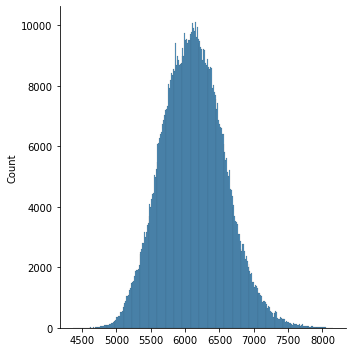

166.08447665385822
Fold 4 end


<Figure size 432x288 with 0 Axes>

In [23]:
count = 0
oof = np.zeros(training_data_df.shape[0])

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=target_cols)
    y_train = train_data['log_transformed']
    
    print(x_train.shape)
    
    x_val = val_data.drop(columns=target_cols)
    y_val = val_data['log_transformed']
    
    print('y dist plot')
    y_val.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'huber',
        'alpha': 1.35,
        'learning_rate': 1,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'rmse',
        'num_threads': 6
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 500000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=100, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_subway_huber_log_lowerlr_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.displot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    print(np.sqrt(mean_squared_error(y_val, preds)))
    
    print('Fold {} end'.format(count))
    count += 1
    

In [24]:
np.sqrt(mean_squared_error(training_data_df['log_transformed'], oof))

171.10537705918858